Projet IBI : fonte des glaciers et emissions de Gaz a effet de serre

Notre Projet IBI vise à explorer la corrélation entre la fonte des glaciers et l’augmentation des gaz a effet de serre (GES). Cette inspiration découle de l’envie de comprendre les dynamiques qui régissent les changements climatiques actuels et leurs impacts sur notre environnement. L’étude de l’impact des émissions de GES sur la fonte des glaciers est importante dans le contexte actuel du réchauffement planétaire. 
La fonte accélérée des glaciers est devenue une préoccupation majeure avec de lourdes conséquences sur les écosystèmes. Cette fonte, actionne une boucle de rétroaction qui va l’accélérer et menacer les ressources en eau douces et la biodiversité. L’objectif de ce Projet est d’analyser de manière approfondie les liens entre l’accélération de cette fonte des glaciers et l’augmentation des émissions de GES.
La motivation derrière ce projet réside dans l’envie de comprendre certains phénomènes de manière scientifiques, et se rendre compte de l’impact de l’humain sur notre environnement. En tant qu’alpiniste, cette fonte vient aussi rendre plus dangereuse la pratique de ce sport et d’autres, ainsi que la qualité de l’eau provenant de ceux-ci. 
L’inspiration pour cette étude découle également de travaux de recherches qui ont mis en évidence des liens entre les émissions de GES et la fonte des glaciers. Par exemple, l’étude Laurent, L., Buoncristiani, JF., Pohl, B. et al. The impact of climate change and glacier mass loss on the hydrology in the Mont-Blanc massif. Sci Rep 10, 10420 (2020). https://doi.org/10.1038/s41598-020-67379-7 a démontré que le changement climatique et la hausse des températures va mener a de changements environnementaux majeurs dans les Alpes, nous allons donc aussi vérifier que ce phénomène est observable globalement. Ces changements qui vont impacter la production hydroélectrique, l’agriculture, la foresterie, le tourisme et les écosystèmes aquatiques montrent qu’il est important d’investiguer ces phénomènes. 
En somme, notre Projet IBI cherche à explorer les liens entre la fonte des glaciers et les émissions de GES. Nous espérons ainsi retrouver des résultats similaires aux recherches liant ces deux phénomènes en élargissant ce problème à l’échelle de la planète. Ainsi, nous pouvons observer les risques des émissions de GES sur notre environnement et plus spécifiquement les glaciers. 



In [1]:

import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from urllib.request import urlretrieve
import urllib.parse
from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress
from datetime import datetime
import matplotlib.dates as mdates
from sklearn.decomposition import PCA

In [2]:


df_glacier = pd.read_csv('mass_balance_point.csv')

df_glacier = df_glacier[['NAME','YEAR','FROM_DATE','TO_DATE','POINT_ELEVATION','POINT_BALANCE']]
df_glacier = df_glacier.dropna()
df_glacier



NAME  YEAR  FROM_DATE   TO_DATE  \
0                         PIR YAKH  2018   20170707  20180831   
1                         PIR YAKH  2018   20170707  20180831   
2                 BAHIA DEL DIABLO  2010   20090301  20100228   
3                 BAHIA DEL DIABLO  2010   20090301  20100228   
4                 BAHIA DEL DIABLO  2010   20090301  20100228   
...                            ...   ...        ...       ...   
57504  BARKRAK SREDNIY EAST BRANCH  2023   20220814  20230814   
57505  BARKRAK SREDNIY EAST BRANCH  2023   20220814  20230814   
57506  BARKRAK SREDNIY EAST BRANCH  2023   20220814  20230814   
57507  BARKRAK SREDNIY EAST BRANCH  2023   20220814  20230814   
57508  BARKRAK SREDNIY EAST BRANCH  2023   20220814  20230814   

       POINT_ELEVATION  POINT_BALANCE  
0               4541.0        -3413.0  
1               4737.0        -1684.0  
2                100.0          100.0  
3                398.0          500.0  
4                442.0          600.0  
...                ...            ...  
57504           3520.0        -2862.0  
57505           3640.0        -2888.0  
57506           3690.0        -2115.0  
57507           3570.0        -2421.0  
57508           3745.0          292.0  

[49975 rows x 6 columns]

In [3]:
df_glacierww = pd.read_csv('Glacier_ww.csv',skiprows = 8, encoding='latin-1')
df_glacierww = df_glacierww[['NAME','GEOREG1','REFERENCE_YEAR','SURVEY_YEAR','WINTER_BALANCE','SUMMER_BALANCE','ANNUAL_BALANCE','ELA']]
df_glacierww


NAME        GEOREG1  REFERENCE_YEAR  SURVEY_YEAR  \
0     RABOTS GLACIAER    Scandinavia            1945         1946   
1     RABOTS GLACIAER    Scandinavia            1949         1950   
2     RABOTS GLACIAER    Scandinavia            1981         1982   
3     RABOTS GLACIAER    Scandinavia            1982         1983   
4     RABOTS GLACIAER    Scandinavia            1983         1984   
...               ...            ...             ...          ...   
1962          GOLUBIN  Asia, Central            2018         2019   
1963          GOLUBIN  Asia, Central            2019         2020   
1964          GOLUBIN  Asia, Central            2020         2021   
1965          GOLUBIN  Asia, Central            2021         2022   
1966          GOLUBIN  Asia, Central            2022         2023   

      WINTER_BALANCE  SUMMER_BALANCE  ANNUAL_BALANCE   ELA  
0                NaN             NaN          -580.0   NaN  
1                NaN             NaN         -1350.0   NaN  
2             1066.0         -1132.0           -70.0  1325  
3             1300.0         -1410.0          -110.0  1342  
4              940.0         -1470.0          -530.0  1483  
...              ...             ...             ...   ...  
1962          1035.0         -1113.0           -78.0  3795  
1963          1013.0          -800.0           213.0  3755  
1964           328.0          -523.0          -194.0  3840  
1965           872.0         -1921.0         -1050.0  3940  
1966           592.0         -2004.0         -1412.0  4210  

[1967 rows x 8 columns]

In [4]:
df_GHG_Energy = pd.read_csv('GHGWW.csv')
df_GHG_Energy = df_GHG_Energy.transpose()
df_GHG_Energy = df_GHG_Energy.reset_index(drop = False)
df_GHG_Energy = df_GHG_Energy.iloc[1:]
df_GHG_Energy.columns = df_GHG_Energy.iloc[0]
df_GHG_Energy = df_GHG_Energy[1:].rename_axis('Country')
df_GHG_Energy = df_GHG_Energy.reset_index(drop = True)
df_GHG_Energy = df_GHG_Energy.rename(columns = {'Country' : 'YEAR'})


df_GHG_Energy

1   YEAR     Aruba Afghanistan     Angola  Anguilla International Aviation  \
0   1970  0.045176   17.336192  20.138364  0.004256             171.160455   
1   1971  0.050063   17.292793  20.018416  0.004258             171.147982   
2   1972  0.060857   15.342251  22.721001  0.004358             181.492019   
3   1973  0.065847    15.96606  24.375911  0.004201             189.261213   
4   1974  0.065108   17.278443  25.083208  0.004451             182.123246   
5   1975  0.079128   17.984253  23.889924  0.004692             176.107638   
6   1976  0.078179   17.989107  19.960419  0.004526             176.412012   
7   1977  0.088896   18.153414  24.620945  0.004627             192.354128   
8   1978  0.093715   17.700459  26.753413  0.004995              199.24575   
9   1979  0.097666   17.494763  27.347333    0.0053             206.078131   
10  1980  0.101652    17.52178  27.854704  0.006531             204.847301   
11  1981  0.104907   17.614388  26.407854  0.008829             204.216777   
12  1982  0.104414   17.557566  26.690607  0.009285             211.499412   
13  1983  0.106994   17.492823  28.580065  0.008319             213.381439   
14  1984  0.121652   16.435936  29.537986  0.008022             221.380127   
15  1985  0.127341   16.369497  31.315768  0.005828             227.557224   
16  1986  0.137034   14.647391   32.91526  0.005377              250.05422   
17  1987  0.151834   14.235157  35.071079  0.008531             264.234049   
18  1988  0.165911   14.399587  37.650472  0.008311             279.148129   
19  1989  0.221021   13.670698  38.060279  0.008777             293.288212   
20  1990  0.214379   13.775604  34.957036  0.008846             261.804485   
21  1991  0.241865   13.854654  34.825942  0.010463             254.589121   
22  1992   0.26676   12.903649  33.948669  0.010895             262.947694   
23  1993  0.270406    13.07113  37.776232  0.013085             268.013454   
24  1994  0.297539   13.228593  48.925968  0.016453             281.559275   
25  1995  0.327189   13.624677  56.341505  0.019952             292.186258   
26  1996  0.225761   14.969408  67.368212   0.01986             304.043499   
27  1997  0.353293   16.060679  70.213915   0.01721             318.875273   
28  1998   0.36187   16.910714  75.471422  0.016132             329.383803   
29  1999  0.352332   17.939448  76.240465  0.015511             343.380526   
30  2000  0.335765    16.04542  71.461338  0.019388             355.892839   
31  2001  0.344135   14.387895  69.302389  0.019961             350.005592   
32  2002  0.363222    17.04471  68.052257  0.014845             370.728921   
33  2003  0.412246   17.732318   68.30399  0.018272             368.674399   
34  2004  0.430187   17.789451  74.427107  0.017723             398.164594   
35  2005  0.462648   18.191324    73.5339  0.018017               423.3091   
36  2006  0.460574   18.461036  66.560643  0.017229             438.977993   
37  2007  0.500896   19.617555  65.717698  0.016801             452.807025   
38  2008  0.493071   23.089808  70.042772  0.020272             460.486427   
39  2009  0.526923   26.313461  71.173426   0.02496             439.013516   
40  2010  0.507507   30.190939  78.130869  0.028984             464.914179   
41  2011  0.337125   34.470277   76.69171  0.031087             479.831305   
42  2012  0.409986   32.464602  78.413033  0.031155             479.996324   
43  2013  0.463848   30.899954  82.985493  0.033171             488.025465   
44  2014  0.475081   31.214446  85.186645  0.033174             503.952576   
45  2015  0.476461   31.208495  90.110604  0.033318             532.878284   
46  2016  0.494114    30.56723  87.096037  0.033731              555.78522   
47  2017  0.467189   31.773007  81.888045  0.034494             591.079314   
48  2018  0.502077    31.43984  78.215749  0.033631             617.430356   
49  2019  0.575822   30.322851  77.435411     0.033             627.478301   
50  2020  0.494731   2

In [5]:

df_glacier["NAME"].nunique()


160

In [6]:

cpt = 1

#name = df_glacier.iloc[cpt]["NAME"]
#name
cptt = 0
list = []
for i in range(df_glacier["NAME"].nunique() - 1):
    name = df_glacier.iloc[cpt]["NAME"]
    true = 0
    while (df_glacier.iloc[cpt]["NAME"] == name):
        
        if( df_glacier.iloc[cpt]["YEAR"] < 1990):
            true = 1
        if(df_glacier.iloc[cpt]["YEAR"] > 2015 and true == 1):
            true = 2 
        cpt = cpt + 1
    if (true == 2):
        print(df_glacier.iloc[cpt-1]["NAME"])
        list.append(df_glacier.iloc[cpt-1]["NAME"])
        cptt =  cptt + 1
        
print(cptt)


WHITE
ALLALIN
CLARIDENFIRN
GIETRO
GRIES
GROSSER ALETSCH
HOHLAUB
RHONE
SCHWARZBERG
SILVRETTA
FREYA
HOFSJOEKULL E
HOFSJOEKULL N
HOFSJOEKULL SW
BLACK RAPIDS
GULKANA
LEMON CREEK
SOUTH CASCADE
TAKU
WOLVERINE
20


In [7]:

df_glacier.loc[df_glacier['NAME'].isin(list)]


NAME  YEAR  FROM_DATE   TO_DATE  POINT_ELEVATION  POINT_BALANCE
8160       WHITE  1960   19599999  19600820            375.0        -1820.0
8161       WHITE  1960   19599999  19600820           1185.0         -150.0
8162       WHITE  1960   19599999  19600820            830.0         -780.0
8163       WHITE  1960   19599999  19600820           1238.0          350.0
8164       WHITE  1960   19599999  19600820           1250.0           20.0
...          ...   ...        ...       ...              ...            ...
57328  WOLVERINE  2023   20220917  20230907           1235.0            0.0
57329  WOLVERINE  2023   20220918  20230505           1371.0         1690.0
57330  WOLVERINE  2023   20220918  20230906           1371.0          -60.0
57331  WOLVERINE  2023   20220916  20230505           1369.0         2020.0
57332  WOLVERINE  2023   20220916  20230905           1369.0          570.0

[16665 rows x 6 columns]

In [8]:
df_alpes = df_glacier[(df_glacier['NAME'] == 'SILVRETTA') | (df_glacier['NAME'] == 'ALLALIN' ) | (df_glacier['NAME'] == 'CLARIDENFIRN' ) | (df_glacier['NAME'] == 'GIETRO' ) | (df_glacier['NAME'] == 'GRIES' ) | (df_glacier['NAME'] == 'GROSSER ALETSCH' ) | (df_glacier['NAME'] == 'HOHLAUB' ) | (df_glacier['NAME'] == 'RHONE' ) | (df_glacier['NAME'] == 'SCHWARZBERG' ) | (df_glacier['NAME'] == 'SILVRETTA' ) | (df_glacier['NAME'] == 'CORBASSIERE' ) ]
#df_alpes
df_alpesww = df_glacierww[(df_glacierww['GEOREG1'] == 'Central Europe')]
#df_alpesww

In [9]:
df_alpesww = df_alpesww.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_alpesww = df_alpesww.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_alpes = pd.concat([df_alpes,df_alpesww])
df_glacier_alpes

NAME  YEAR   FROM_DATE     TO_DATE  POINT_ELEVATION  \
10449    ALLALIN  1956  19550915.0  19560501.0           2848.0   
10450    ALLALIN  1956  19550915.0  19560915.0           2848.0   
10451    ALLALIN  1956  19560501.0  19560915.0           2848.0   
10452    ALLALIN  1956  19550915.0  19560501.0           3242.0   
10453    ALLALIN  1956  19550915.0  19560915.0           2869.0   
...          ...   ...         ...         ...              ...   
1660   CIARDONEY  2019         NaN         NaN              NaN   
1661   CIARDONEY  2020         NaN         NaN              NaN   
1662   CIARDONEY  2021         NaN         NaN              NaN   
1663   CIARDONEY  2022         NaN         NaN              NaN   
1664   CIARDONEY  2023         NaN         NaN              NaN   

       POINT_BALANCE         GEOREG1  REFERENCE_YEAR  WINTER_BALANCE  \
10449         1156.0             NaN             NaN             NaN   
10450        -1242.0             NaN             NaN             NaN   
10451        -2398.0             NaN             NaN             NaN   
10452         1020.0             NaN             NaN             NaN   
10453        -2160.0             NaN             NaN             NaN   
...              ...             ...             ...             ...   
1660         -1650.0  Central Europe          2018.0          1780.0   
1661          -780.0  Central Europe          2019.0          1510.0   
1662         -1330.0  Central Europe          2020.0          1180.0   
1663         -4000.0  Central Europe          2021.0           390.0   
1664         -2170.0  Central Europe          2022.0          1390.0   

       SUMMER_BALANCE      ELA  
10449             NaN      NaN  
10450             NaN      NaN  
10451             NaN      NaN  
10452             NaN      NaN  
10453             NaN      NaN  
...               ...      ...  
1660          -3430.0  >3150.0  
1661          -2290.0     3100  
1662          -2510.0  >3120.0  
1663          -4390.0  >3120.0  
1664          -3560.0  >3120.0  

[9466 rows x 11 columns]

In [10]:
df_amerique = df_glacier[(df_glacier['NAME'] == 'BLACK RAPIDS') | (df_glacier['NAME'] == 'COLUMBIA' ) | (df_glacier['NAME'] == 'GULKANA' ) | (df_glacier['NAME'] == 'LEMON CREEK' ) | (df_glacier['NAME'] == 'SOUTH CASCADE' ) | (df_glacier['NAME'] == 'TAKU' ) | (df_glacier['NAME'] == 'WOLVERINE' )|(df_glacier['NAME'] == 'WHITE') ]
#df_amerique
df_ameriqueww = df_glacierww[df_glacierww['GEOREG1'] == 'Western Canada and USA' ]
#df_ameriqueww

In [11]:
df_ameriqueww = df_ameriqueww.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_ameriqueww = df_ameriqueww.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_amerique = pd.concat([df_amerique,df_ameriqueww])
df_glacier_amerique

NAME  YEAR   FROM_DATE     TO_DATE  POINT_ELEVATION  POINT_BALANCE  \
8160  WHITE  1960  19599999.0  19600820.0            375.0   -1820.000000   
8161  WHITE  1960  19599999.0  19600820.0           1185.0    -150.000000   
8162  WHITE  1960  19599999.0  19600820.0            830.0    -780.000000   
8163  WHITE  1960  19599999.0  19600820.0           1238.0     350.000000   
8164  WHITE  1960  19599999.0  19600820.0           1250.0      20.000000   
...     ...   ...         ...         ...              ...            ...   
1046   HELM  2019         NaN         NaN              NaN   -1990.000000   
1047   HELM  2020         NaN         NaN              NaN   -1470.000000   
1048   HELM  2021         NaN         NaN              NaN   -3070.000000   
1049   HELM  2022         NaN         NaN              NaN   -1002.000000   
1050   HELM  2023         NaN         NaN              NaN   -4358.879159   

                     GEOREG1  REFERENCE_YEAR  WINTER_BALANCE  SUMMER_BALANCE  \
8160                     NaN             NaN             NaN             NaN   
8161                     NaN             NaN             NaN             NaN   
8162                     NaN             NaN             NaN             NaN   
8163                     NaN             NaN             NaN             NaN   
8164                     NaN             NaN             NaN             NaN   
...                      ...             ...             ...             ...   
1046  Western Canada and USA          2018.0     1670.000000    -3660.000000   
1047  Western Canada and USA          2019.0             NaN             NaN   
1048  Western Canada and USA          2020.0     1975.000000    -5046.000000   
1049  Western Canada and USA          2021.0     2075.000000    -3077.000000   
1050  Western Canada and USA          2022.0     1592.469352    -5951.348511   

          ELA  
8160      NaN  
8161      NaN  
8162      NaN  
8163      NaN  
8164      NaN  
...       ...  
1046  >2090.0  
1047  >2080.0  
1048     2115  
1049     2000  
1050  >2148.0  

[5076 rows x 11 columns]

In [12]:
df_groenisland = df_glacier[(df_glacier['NAME'] == 'FREYA') | (df_glacier['NAME'] == 'MITTIVAKKAT' ) | (df_glacier['NAME'] == 'HOFSJOESKULL E' ) | (df_glacier['NAME'] == 'HOFSJOESKULL SW' ) | (df_glacier['NAME'] == 'HOFSJOESKULL N' ) ]
df_groenisland

NAME  YEAR  FROM_DATE   TO_DATE  POINT_ELEVATION  POINT_BALANCE
26574        FREYA  1939   19380910  19390803            650.0          500.0
26575        FREYA  1939   19390803  19390904            650.0         -117.0
26576        FREYA  1939   19380910  19390803            715.0          550.0
26577        FREYA  1939   19390803  19390904            715.0          -82.0
26578        FREYA  1939   19380910  19390803            775.0          750.0
...            ...   ...        ...       ...              ...            ...
27590  MITTIVAKKAT  2014   20130824  20140824            390.0        -1490.0
27591  MITTIVAKKAT  2014   20130824  20140824            372.0        -2650.0
27592  MITTIVAKKAT  2014   20130824  20140824            380.0        -2070.0
27593  MITTIVAKKAT  2014   20130824  20140824            480.0        -1410.0
27594  MITTIVAKKAT  2014   20130824  20140824            485.0        -1010.0

[738 rows x 6 columns]

In [13]:
df_asie_centrale = df_glacier[(df_glacier['NAME'] == 'ABRAMOV' )]
#df_asie_centrale
df_asie_centraleww = df_glacierww[df_glacierww['GEOREG1'] == 'Asia, Central']
#df_asie_centraleww

In [14]:
df_asie_centraleww = df_asie_centraleww.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_asie_centraleww = df_asie_centraleww.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_asiec = pd.concat([df_asie_centrale,df_asie_centraleww])
df_glacier_asiec

NAME  YEAR   FROM_DATE     TO_DATE  POINT_ELEVATION  POINT_BALANCE  \
40825  ABRAMOV  2012  20110826.0  20120822.0           3719.0        -4824.0   
40826  ABRAMOV  2012  20110826.0  20120822.0           3793.0        -4275.0   
40827  ABRAMOV  2012  20110826.0  20120822.0           3803.0        -3897.0   
40828  ABRAMOV  2012  20110826.0  20120822.0           3802.0        -3726.0   
40829  ABRAMOV  2012  20110826.0  20120822.0           3745.0        -4950.0   
...        ...   ...         ...         ...              ...            ...   
1962   GOLUBIN  2019         NaN         NaN              NaN          -78.0   
1963   GOLUBIN  2020         NaN         NaN              NaN          213.0   
1964   GOLUBIN  2021         NaN         NaN              NaN         -194.0   
1965   GOLUBIN  2022         NaN         NaN              NaN        -1050.0   
1966   GOLUBIN  2023         NaN         NaN              NaN        -1412.0   

             GEOREG1  REFERENCE_YEAR  WINTER_BALANCE  SUMMER_BALANCE   ELA  
40825            NaN             NaN             NaN             NaN   NaN  
40826            NaN             NaN             NaN             NaN   NaN  
40827            NaN             NaN             NaN             NaN   NaN  
40828            NaN             NaN             NaN             NaN   NaN  
40829            NaN             NaN             NaN             NaN   NaN  
...              ...             ...             ...             ...   ...  
1962   Asia, Central          2018.0          1035.0         -1113.0  3795  
1963   Asia, Central          2019.0          1013.0          -800.0  3755  
1964   Asia, Central          2020.0           328.0          -523.0  3840  
1965   Asia, Central          2021.0           872.0         -1921.0  3940  
1966   Asia, Central          2022.0           592.0         -2004.0  4210  

[313 rows x 11 columns]

In [15]:

df_glacier_scandinavie = df_glacierww[(df_glacierww['GEOREG1'] == 'Scandinavia' )]
df_glacier_scandinavie = df_glacier_scandinavie.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_glacier_scandinavie = df_glacier_scandinavie.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_scandinavie

NAME      GEOREG1  REFERENCE_YEAR  YEAR  WINTER_BALANCE  \
0    RABOTS GLACIAER  Scandinavia            1945  1946             NaN   
1    RABOTS GLACIAER  Scandinavia            1949  1950             NaN   
2    RABOTS GLACIAER  Scandinavia            1981  1982          1066.0   
3    RABOTS GLACIAER  Scandinavia            1982  1983          1300.0   
4    RABOTS GLACIAER  Scandinavia            1983  1984           940.0   
..               ...          ...             ...   ...             ...   
583      AALFOTBREEN  Scandinavia            2018  2019          2463.0   
584      AALFOTBREEN  Scandinavia            2019  2020          4991.0   
585      AALFOTBREEN  Scandinavia            2020  2021          3162.0   
586      AALFOTBREEN  Scandinavia            2021  2022          3378.0   
587      AALFOTBREEN  Scandinavia            2022  2023          2300.0   

     SUMMER_BALANCE  POINT_BALANCE      ELA  
0               NaN         -580.0      NaN  
1               NaN        -1350.0      NaN  
2           -1132.0          -70.0     1325  
3           -1410.0         -110.0     1342  
4           -1470.0         -530.0     1483  
..              ...            ...      ...  
583         -4784.0        -2321.0  >1360.0  
584         -3988.0         1003.0  <1000.0  
585         -4869.0        -1707.0  >1360.0  
586         -3937.0         -559.0     1340  
587         -4800.0        -2500.0  >1360.0  

[588 rows x 8 columns]

In [16]:
df_glacier_artique = df_glacierww[(df_glacierww['GEOREG1'] == 'Svalbard and Jan Mayen' ) | (df_glacierww['GEOREG1'] == 'Arctic Canada, North' )]
df_glacier_artique = df_glacier_artique.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_glacier_artique = df_glacier_artique.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_artique

NAME                 GEOREG1  REFERENCE_YEAR  YEAR  \
588  AUSTRE BROEGGERBREEN  Svalbard and Jan Mayen            1966  1967   
589  AUSTRE BROEGGERBREEN  Svalbard and Jan Mayen            1967  1968   
590  AUSTRE BROEGGERBREEN  Svalbard and Jan Mayen            1968  1969   
591  AUSTRE BROEGGERBREEN  Svalbard and Jan Mayen            1969  1970   
592  AUSTRE BROEGGERBREEN  Svalbard and Jan Mayen            1970  1971   
..                    ...                     ...             ...   ...   
884      DEVON ICE CAP NW    Arctic Canada, North            2018  2019   
885      DEVON ICE CAP NW    Arctic Canada, North            2019  2020   
886      DEVON ICE CAP NW    Arctic Canada, North            2020  2021   
887      DEVON ICE CAP NW    Arctic Canada, North            2021  2022   
888      DEVON ICE CAP NW    Arctic Canada, North            2022  2023   

     WINTER_BALANCE  SUMMER_BALANCE  POINT_BALANCE     ELA  
588           770.0         -1420.0         -650.0     450  
589           570.0          -670.0         -100.0     295  
590           400.0         -1330.0         -930.0  >650.0  
591           370.0          -910.0         -540.0     490  
592           650.0         -1230.0         -580.0     400  
..              ...             ...            ...     ...  
884           157.0          -641.0         -484.0    1600  
885             NaN             NaN         -647.0    1600  
886           114.0          -120.0           -5.0    1030  
887             NaN             NaN         -508.0     NaN  
888             NaN             NaN         -388.0     NaN  

[301 rows x 8 columns]

In [17]:
df_glacier_chili = df_glacierww[(df_glacierww['GEOREG1'] == 'Southern Andes' )]
df_glacier_chili = df_glacier_chili.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_glacier_chili = df_glacier_chili.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_chili

NAME         GEOREG1  REFERENCE_YEAR  YEAR  WINTER_BALANCE  \
1761  ECHAURREN NORTE  Southern Andes            1975  1976          1390.0   
1762  ECHAURREN NORTE  Southern Andes            1976  1977          1890.0   
1763  ECHAURREN NORTE  Southern Andes            1977  1978          3230.0   
1764  ECHAURREN NORTE  Southern Andes            1978  1979          2370.0   
1765  ECHAURREN NORTE  Southern Andes            1979  1980          2900.0   
1766  ECHAURREN NORTE  Southern Andes            1980  1981          3110.0   
1767  ECHAURREN NORTE  Southern Andes            1981  1982          1560.0   
1768  ECHAURREN NORTE  Southern Andes            1982  1983          5810.0   
1769  ECHAURREN NORTE  Southern Andes            1983  1984          1890.0   
1770  ECHAURREN NORTE  Southern Andes            1984  1985          2240.0   
1771  ECHAURREN NORTE  Southern Andes            1985  1986          1870.0   
1772  ECHAURREN NORTE  Southern Andes            1986  1987          3030.0   
1773  ECHAURREN NORTE  Southern Andes            1987  1988          4910.0   
1774  ECHAURREN NORTE  Southern Andes            1988  1989          1830.0   
1775  ECHAURREN NORTE  Southern Andes            1989  1990          1610.0   
1776  ECHAURREN NORTE  Southern Andes            1990  1991          2010.0   
1777  ECHAURREN NORTE  Southern Andes            1991  1992          3450.0   
1778  ECHAURREN NORTE  Southern Andes            1992  1993          2050.0   
1779  ECHAURREN NORTE  Southern Andes            1993  1994          2570.0   
1780  ECHAURREN NORTE  Southern Andes            1994  1995          2640.0   
1781  ECHAURREN NORTE  Southern Andes            1995  1996          1760.0   
1782  ECHAURREN NORTE  Southern Andes            1996  1997           480.0   
1783  ECHAURREN NORTE  Southern Andes            1997  1998          5030.0   
1784  ECHAURREN NORTE  Southern Andes            1998  1999           720.0   
1785  ECHAURREN NORTE  Southern Andes            1999  2000          2100.0   
1786  ECHAURREN NORTE  Southern Andes            2000  2001          4660.0   
1787  ECHAURREN NORTE  Southern Andes            2001  2002          3070.0   
1788  ECHAURREN NORTE  Southern Andes            2002  2003          4650.0   
1789  ECHAURREN NORTE  Southern Andes            2003  2004          2020.0   
1790  ECHAURREN NORTE  Southern Andes            2004  2005          3320.0   
1791  ECHAURREN NORTE  Southern Andes            2005  2006          3590.0   
1792  ECHAURREN NORTE  Southern Andes            2006  2007          2590.0   
1793  ECHAURREN NORTE  Southern Andes            2007  2008          1970.0   
1794  ECHAURREN NORTE  Southern Andes            2008  2009          3200.0   
1795  ECHAURREN NORTE  Southern Andes            2009  2010          1900.0   
1796  ECHAURREN NORTE  Southern Andes            2010  2011          1090.0   
1797  ECHAURREN NORTE  Southern Andes            2011  2012           950.0   
1798  ECHAURREN NORTE  Southern Andes            2012  2013          1180.0   
1799  ECHAURREN NORTE  Southern Andes            2013  2014          1960.0   
1800  ECHAURREN NORTE  Southern Andes            2014  2015          1180.0   
1801  ECHAURREN NORTE  Southern Andes            2015  2016          1969.0   
1802  ECHAURREN NORTE  Southern Andes            2016  2017          2130.0   
1803  ECHAURREN NORTE  Southern Andes            2017  2018          1378.0   
1804  ECHAURREN NORTE  Southern Andes            2018  2019          1047.0   
1805  ECHAURREN NORTE  Southern Andes            2019  2020           551.0   
1806  ECHAURREN NORTE  Southern Andes            2020  2021          1010.0   
1807  ECHAURREN NORTE  Southern Andes            2021  2022          1106.0   
1808  ECHAURREN NORTE  Southern Andes            2022  2023          1596.0   

      SUMMER_BALANCE  POINT_BALANCE      ELA  
1761         -2310.0         -920.0      NaN  
1762         -3190.0        -1300.0      NaN  
1763

In [18]:
df_glacier_caucase = df_glacierww[(df_glacierww['GEOREG1'] == 'Caucasus and Middle East' )]
df_glacier_caucase = df_glacier_caucase.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_glacier_caucase = df_glacier_caucase.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_caucase

NAME                   GEOREG1  REFERENCE_YEAR  YEAR  \
1665  GARABASHI  Caucasus and Middle East            1983  1984   
1666  GARABASHI  Caucasus and Middle East            1984  1985   
1667  GARABASHI  Caucasus and Middle East            1985  1986   
1668  GARABASHI  Caucasus and Middle East            1986  1987   
1669  GARABASHI  Caucasus and Middle East            1987  1988   
...         ...                       ...             ...   ...   
1756   DJANKUAT  Caucasus and Middle East            2018  2019   
1757   DJANKUAT  Caucasus and Middle East            2019  2020   
1758   DJANKUAT  Caucasus and Middle East            2020  2021   
1759   DJANKUAT  Caucasus and Middle East            2021  2022   
1760   DJANKUAT  Caucasus and Middle East            2022  2023   

      WINTER_BALANCE  SUMMER_BALANCE  POINT_BALANCE   ELA  
1665          1080.0          -740.0          340.0  3700  
1666           840.0          -940.0         -100.0  3860  
1667           820.0         -1460.0         -640.0  3950  
1668          1470.0         -1060.0          410.0  3550  
1669          1190.0          -920.0          270.0  3660  
...              ...             ...            ...   ...  
1756          2520.0         -3150.0         -630.0  3300  
1757          2990.0         -4360.0        -1370.0  3470  
1758          3290.0         -3460.0         -170.0  3180  
1759          2960.0         -3550.0         -590.0  3360  
1760          3060.0         -3130.0          -70.0   NaN  

[96 rows x 8 columns]

In [19]:
df_GHG_amerique = df_GHG_Energy[['YEAR','United States', 'Canada']]
df_GHG_amerique

1   YEAR United States      Canada
0   1970   5750.029633  464.159048
1   1971   5624.320655  473.784949
2   1972    5894.31589  497.316948
3   1973   6093.637117   524.75178
4   1974   5915.957818  533.764233
5   1975   5699.331436  518.825289
6   1976   6014.557728  530.498409
7   1977   6170.764571  551.586198
8   1978   6163.384588  558.476094
9   1979    6230.31431  573.037869
10  1980   5997.688955  578.444677
11  1981   5917.983071  558.499283
12  1982    5649.11198   539.47049
13  1983   5618.754033  540.933727
14  1984   5845.645879  562.128472
15  1985   5854.256613   557.59759
16  1986   5807.734393  544.098588
17  1987   5967.301421  560.156326
18  1988   6204.137294  594.265083
19  1989   6270.475123  616.418453
20  1990   6163.741598  582.165354
21  1991   6115.600587  577.077925
22  1992   6215.020469  593.156319
23  1993   6341.283283  597.065083
24  1994    6448.60354  622.580495
25  1995   6517.886171  637.491667
26  1996   6687.967131  654.113325
27  1997   6971.156595  666.633041
28  1998   7020.480586  675.035633
29  1999   7023.791489  686.001707
30  2000   7188.178567  710.254944
31  2001     7105.9394  700.289195
32  2002    6941.58964  723.208729
33  2003   7007.774015  741.693118
34  2004   7097.041408  737.785098
35  2005   7101.881218  745.212111
36  2006   6990.806198  742.804791
37  2007   7087.000577  776.971763
38  2008    6907.59416  750.026704
39  2009   6439.869849  708.891776
40  2010    6686.47466  726.134884
41  2011   6485.321483  742.214528
42  2012   6241.549906  744.557705
43  2013   6382.441981  755.625534
44  2014   6409.952019  768.758716
45  2015   6288.541066  764.534966
46  2016    6167.14111  758.575666
47  2017   6110.706444  772.896887
48  2018   6287.703095  787.651304
49  2019    6153.23479  775.376441
50  2020   5615.567418  711.468639
51  2021   5923.303104  733.081724
52  2022   6017.442983  756.810111

In [20]:
# Assuming df_GHG_Energy is your DataFrame
df_GHG_alpes = df_GHG_Energy[['YEAR','France and Monaco', 'Germany', 'Italy, San Marino and the Holy See', 'Austria', 'Switzerland and Liechtenstein']]
df_GHG_alpes

1   YEAR France and Monaco      Germany Italy, San Marino and the Holy See  \
0   1970        637.749427  1322.146944                         395.944813   
1   1971         648.78656  1315.853125                         412.384585   
2   1972        665.635909  1340.156849                         429.733748   
3   1973        702.654926  1392.970244                         453.850554   
4   1974        683.706612  1359.983286                         454.314644   
5   1975        643.097523  1298.075714                         436.315811   
6   1976        686.998443  1362.581784                         467.118825   
7   1977        670.196071  1338.595314                         456.505204   
8   1978        687.621825  1380.930193                         466.895987   
9   1979        696.656399  1432.638726                         483.598609   
10  1980        674.068618  1378.414296                         484.775726   
11  1981        623.169206  1341.713497                         472.281099   
12  1982        602.075157  1291.520487                         463.452765   
13  1983        587.638404  1305.788045                         456.360294   
14  1984        575.383635  1321.041413                         465.107497   
15  1985        559.634925  1322.466214                         465.696691   
16  1986        547.009387  1311.230222                         468.741379   
17  1987        537.087832  1300.091075                         495.108993   
18  1988        533.688734  1290.378632                         495.850416   
19  1989        541.976271  1277.856366                         512.514862   
20  1990        535.186772  1235.234519                           513.7379   
21  1991        565.935174  1209.511891                         511.248645   
22  1992        551.544553  1145.911138                         505.968949   
23  1993        529.265592  1132.656363                          499.56016   
24  1994        523.971742  1118.348126                         495.647126   
25  1995        534.503887   1110.34334                         522.306542   
26  1996         552.90469  1137.914248                         518.311393   
27  1997        539.350231  1099.019569                         522.355315   
28  1998        551.411163  1079.015116                         531.949275   
29  1999        543.801874  1038.796542                         539.323959   
30  2000        544.030426   1032.28571                         545.779648   
31  2001        548.386084   1043.58425                         542.318397   
32  2002        541.894707  1025.209428                         551.734008   
33  2003        545.083008   1023.85324                         570.496868   
34  2004        546.064411  1007.114208                         579.587569   
35  2005        546.469634    983.71292                         580.426505   
36  2006        532.627729   989.832154                         568.234608   
37  2007        526.904573   958.434171                         560.897819   
38  2008         519.76468   960.192839                         545.406615   
39  2009        504.832377   896.257395                         493.355962   
40  2010        514.622005   940.995946                         503.634649   
41  2011        497.368215   912.983495                         492.288896   
42  2012        499.576973   925.559553                         473.343066   
43  2013        493.963932    942.98114                         440.130206   
44  2014        460.202623   902.898854                         420.083726   
45  2015        464.525041   908.132357                         430.297118   
46  2016        466.612487   910.204741                         424.979781   
47  2017        469.611897   893.939566                         422.796105   
48  2018        456.092716   864.584742                         417.571854   
49  2019        446.238861   810.270738                         405.329521   
50  2020        405.71

In [21]:
df_GHG_groenisland = df_GHG_Energy[['YEAR','Greenland', 'Iceland', 'Norway', 'Finland', 'Sweden']]

df_GHG_groenisland

1   YEAR Greenland   Iceland     Norway     Finland      Sweden
0   1970  0.052089  3.228731  55.200632   66.615548  116.237393
1   1971  0.053156  3.369721   53.62092   66.421627   109.02392
2   1972  0.054076  3.676074  57.223716   70.541927  109.597129
3   1973  0.054944  4.373394  58.896692   74.982701   113.06393
4   1974  0.055777  4.301426  57.909346   71.127125  105.992269
5   1975  0.056578  4.037661  56.609403    70.22782   106.88758
6   1976  0.056869  4.132747  59.641298   76.177012  113.632777
7   1977  0.057099  4.282018  60.899973   75.510533  109.657586
8   1978  0.057324  4.409212  60.646645   82.784516  104.895787
9   1979  0.057565  4.456513  64.617297   83.326048  108.325055
10  1980   0.05784  4.242291   63.32752   84.285036  100.834948
11  1981  0.058551  4.169319  59.669408   74.691208   93.313441
12  1982  0.059369  3.865777  55.526516   72.439813   86.761923
13  1983  0.060203   3.92264   56.09497   71.641943   81.752628
14  1984     0.061  4.214129  59.270376   72.372624   81.738668
15  1985  0.061903  4.025021  60.081276    76.42801   85.477517
16  1986  0.062559  4.074343  61.963702   76.615929   86.527232
17  1987  0.063229  4.211805  61.146691   81.417353   84.531013
18  1988  0.063975  4.327646   63.13833   80.103578   82.497443
19  1989  0.064613  4.436208  62.922617   80.459673   79.753687
20  1990  0.065228  4.427561  62.914097   85.557783    79.21474
21  1991  0.065519  4.395187  60.225601    86.17387    79.23699
22  1992  0.065686  3.304846  60.930512   82.207354   82.052484
23  1993  0.065829  3.427045  64.105368    83.70717   82.462889
24  1994  0.065886  3.561315  67.627362   90.947658   85.072686
25  1995  0.066029   3.38142  68.061854   86.907009   84.479117
26  1996  0.066235  3.680176  70.184973   91.962296   89.864791
27  1997  0.066288  3.614225  73.297363   90.883896   85.188742
28  1998  0.066488  3.767931  74.238273   86.737922   85.330841
29  1999   0.06658  3.827048  76.006427   87.709943   84.162961
30  2000  0.066494  3.935336   72.38091   86.137426   80.797278
31  2001  0.066752  4.045275  73.182164   92.871711   80.576458
32  2002  0.067015  4.242259  72.696822   94.423504   82.435919
33  2003  0.067287  4.211178  76.712769  103.868654   83.257317
34  2004  0.687501  4.294484  77.548252   102.42466   82.090974
35  2005   0.69401  4.266438  74.508991   87.451903   81.440056
36  2006  0.709943  4.413037  74.857336   101.72442   84.195321
37  2007  0.700053  4.742115  75.548596   95.074541   81.466179
38  2008  0.719213  5.053411   76.04152   86.239892    78.27666
39  2009  0.632752  5.051068  73.272007   82.901391   72.558422
40  2010  0.725166   4.98904   76.16419   92.972024   78.578455
41  2011  0.766685  4.849578  73.810921   84.646601   73.637624
42  2012  0.619887   4.85301  72.390871   80.599003   70.327713
43  2013  0.611607  4.902805  72.572625   80.691448   68.063588
44  2014  0.559642  4.727426  72.538174   75.811848   66.407027
45  2015  0.598538  4.889964  74.295567   71.106436   66.670409
46  2016   0.59396    4.4576  73.377794   70.973108   66.383527
47  2017  0.582845  4.590671  73.862427   66.912488   66.114353
48  2018  0.584499  4.536685   72.70166   68.008766   63.355547
49  2019  0.584517  4.416539  70.395715   63.948058   62.683998
50  2020  0.525882  4.265571  70.082848   58.141925   62.775179
51  2021  0.512554  4.281491  71.679112   57.395199   61.412081
52  2022  0.539507  4.768241  69.965484   54.805048   60.636813

In [22]:
df_asiec = df_GHG_Energy[['YEAR','Kyrgyzstan', 'Uzbekistan', 'Tajikistan', 'China', 'Mongolia','Kazakhstan']]

df_asiec

1   YEAR Kyrgyzstan  Uzbekistan Tajikistan         China   Mongolia  \
0   1970  20.060828  109.995212   13.29277   2142.614158  15.872569   
1   1971  20.898323  111.358782   13.64204   2196.116515  16.255928   
2   1972  21.856895  116.472195  14.213366   2275.714615  15.890168   
3   1973  22.768533  122.088908  14.817104   2320.113044  16.408424   
4   1974  23.780896  128.226454  15.441719   2343.853035  17.165822   
5   1975  24.920854  136.589809  16.329857   2537.685652   17.83507   
6   1976  25.474738   140.09985  16.604632   2601.085674  18.171307   
7   1977  25.949419  143.907984  16.936253   2780.142389   18.95574   
8   1978  26.777166  148.663657  17.365562   2973.803391  19.366405   
9   1979  27.340077  152.671981  17.785215   3018.083372  20.232506   
10  1980  28.278635  158.798558   19.14349   2989.443276  21.076302   
11  1981    27.9865  159.637015  19.269048   2957.977414  20.205385   
12  1982  27.847914   162.12673  19.101862   3043.902639  21.139899   
13  1983  27.682191  165.401745  19.584458   3159.286564  21.582968   
14  1984  27.797014  169.307783  19.814988   3350.337416  21.970042   
15  1985   27.81436  173.682264  20.575173   3359.331374  23.553474   
16  1986  28.278533  178.244186   21.29519   3498.575859  24.786866   
17  1987  29.086607  182.908389  21.845762   3685.864643  25.853234   
18  1988  29.340092  185.253982  22.086009   3879.221341  26.872451   
19  1989  29.341546  185.402213  22.192003   3999.953779  26.249144   
20  1990  33.702703  177.173024  22.325112   4073.563006  25.924371   
21  1991  30.965107  176.798588  22.912429   4208.607726   28.90794   
22  1992   22.97506   167.35095  18.841967   4321.276275  26.638977   
23  1993  18.581486  168.568904  14.456262   4525.359289  25.343417   
24  1994  14.067638  166.077006  11.909135   4706.607186  23.369358   
25  1995  10.868745  154.752439  11.338231   5134.076033  24.210622   
26  1996  11.676202  157.468477  10.190165   5130.246368  22.917565   
27  1997  12.105935  157.533567  10.347065   5168.317249  23.203254   
28  1998  12.469834  173.796994  10.467187   5252.206156  23.930498   
29  1999  11.319847  172.461942  10.316958   5199.820834  24.616345   
30  2000  11.292107  181.939439  10.779761   5425.512569  25.377276   
31  2001  10.471948  187.789078  10.287754   5624.567725  23.169605   
32  2002   11.56242  199.164228  11.137269   5959.542982  21.080553   
33  2003  12.246882  187.600257  10.472078    6677.89067  20.424291   
34  2004  12.191563  190.125605  12.607103   7556.106084  20.362458   
35  2005  12.045132  191.579319   12.08083   8431.922006  25.063551   
36  2006  11.930681  204.292168  12.766026   9232.261373   28.17625   
37  2007  13.278462  198.468254  14.253968   9845.302236  31.077166   
38  2008     14.654  210.810955  13.046149  10069.845691  31.989008   
39  2009  14.617242  192.602772  12.289414  10696.090417  35.637837   
40  2010  14.370912  207.964559  12.170991  11565.470008  38.508679   
41  2011  16.472832  212.856451  12.140377  12572.884149  43.927643   
42  2012  18.509327  202.099391  13.117737   12928.22914  45.013513   
43  2013  18.475037  200.447171  13.338223  13485.440505   47.26085   
44  2014  19.457636  191.796436  14.807377  13650.133434  49.796959   
45  2015  19.953948  187.886473  15.590211  13479.880369  48.375649   
46  2016  19.761835  197.959601  16.624214  13447.136417  56.152175   
47  2017  20.101588  203.018814  18.351319  13710.100289  62.660429   
48  2018  22.206539  213.167964  19.742052  14296.571168   65.93126   
49  2019  21.276678  219.006521  20.697031  14606.127586    70.1709   
50  2020  20.331201  211.861638  21.191059  14879.556512  64.732111   
51  2021  21.473967  221.598176  22.430521  15632.894608  62.161284   
52  2022  21.939593  227.206746  22.833624  15684.626765  62.790307   

1   Kazakhstan  
0   259.460986  
1   264.193382  
2    271.77706  
3   281.156014  
4   287.122268  
5   293.923153  
6   299.363137  
7   299.825285  
8   304.7249

In [23]:
df_scandinavie = df_GHG_Energy[['YEAR','Sweden', 'Norway']]

df_scandinavie

1   YEAR      Sweden     Norway
0   1970  116.237393  55.200632
1   1971   109.02392   53.62092
2   1972  109.597129  57.223716
3   1973   113.06393  58.896692
4   1974  105.992269  57.909346
5   1975   106.88758  56.609403
6   1976  113.632777  59.641298
7   1977  109.657586  60.899973
8   1978  104.895787  60.646645
9   1979  108.325055  64.617297
10  1980  100.834948   63.32752
11  1981   93.313441  59.669408
12  1982   86.761923  55.526516
13  1983   81.752628   56.09497
14  1984   81.738668  59.270376
15  1985   85.477517  60.081276
16  1986   86.527232  61.963702
17  1987   84.531013  61.146691
18  1988   82.497443   63.13833
19  1989   79.753687  62.922617
20  1990    79.21474  62.914097
21  1991    79.23699  60.225601
22  1992   82.052484  60.930512
23  1993   82.462889  64.105368
24  1994   85.072686  67.627362
25  1995   84.479117  68.061854
26  1996   89.864791  70.184973
27  1997   85.188742  73.297363
28  1998   85.330841  74.238273
29  1999   84.162961  76.006427
30  2000   80.797278   72.38091
31  2001   80.576458  73.182164
32  2002   82.435919  72.696822
33  2003   83.257317  76.712769
34  2004   82.090974  77.548252
35  2005   81.440056  74.508991
36  2006   84.195321  74.857336
37  2007   81.466179  75.548596
38  2008    78.27666   76.04152
39  2009   72.558422  73.272007
40  2010   78.578455   76.16419
41  2011   73.637624  73.810921
42  2012   70.327713  72.390871
43  2013   68.063588  72.572625
44  2014   66.407027  72.538174
45  2015   66.670409  74.295567
46  2016   66.383527  73.377794
47  2017   66.114353  73.862427
48  2018   63.355547   72.70166
49  2019   62.683998  70.395715
50  2020   62.775179  70.082848
51  2021   61.412081  71.679112
52  2022   60.636813  69.965484

In [24]:
df_caucase = df_GHG_Energy[['YEAR','Russia', 'Georgia']]

ncolo = df_caucase.columns[2:]
df_caucase.loc[:, 'Russia'] /= 5.6
df_caucase

1   YEAR      Russia    Georgia
0   1970  341.234972  29.319176
1   1971  346.590393  29.963899
2   1972  361.570665  31.517309
3   1973  380.406259   32.68982
4   1974  397.204579   33.65997
5   1975  419.450448   35.55974
6   1976  433.185867  36.089745
7   1977   442.01034   36.26272
8   1978  453.585559  37.422485
9   1979  459.508034   38.49314
10  1980  470.609935  39.298218
11  1981  469.242829  38.979587
12  1982   475.05939  38.683258
13  1983  481.211328  38.488294
14  1984  487.859823  38.999471
15  1985  494.898341  39.163058
16  1986  506.943536  39.820158
17  1987  519.427878   41.01472
18  1988   528.37716  41.457495
19  1989   530.03718  41.472593
20  1990  545.205389  42.124285
21  1991  535.765153  33.745125
22  1992   495.32162  27.546065
23  1993  454.780077    22.9596
24  1994  412.264878  16.550569
25  1995  400.370495  14.074566
26  1996  389.021144  12.650128
27  1997  365.678017  11.944638
28  1998  363.868841  11.293524
29  1999  372.973668  11.008039
30  2000  381.133967  11.536963
31  2001  383.406228   9.775898
32  2002  381.756891   9.628887
33  2003  393.933951  10.131248
34  2004  396.252071  10.401358
35  2005  396.745147  11.260491
36  2006  403.710649   11.69062
37  2007  405.950633  12.643344
38  2008  404.855809  11.597077
39  2009  383.519873   12.63324
40  2010  400.949116  12.026642
41  2011  418.408548  13.467492
42  2012  419.190326  14.627794
43  2013  410.603132  15.486209
44  2014  407.289573  16.294193
45  2015  409.781678  16.472348
46  2016  407.341046  16.877259
47  2017  417.722848  17.047802
48  2018  436.425211  16.897317
49  2019  451.820583  17.659118
50  2020  434.377137  17.309272
51  2021  465.470025  17.944413
52  2022  460.678226  18.045755

In [25]:
#df_artique_2 = df_GHG_Energy[(df_GHG_Energy['Country']== 'Norway') | (df_GHG_Energy['Country']== 'Canada') ]
df_artique_2 = df_GHG_Energy[['YEAR','Norway', 'Canada']]

df_artique_2

1   YEAR     Norway      Canada
0   1970  55.200632  464.159048
1   1971   53.62092  473.784949
2   1972  57.223716  497.316948
3   1973  58.896692   524.75178
4   1974  57.909346  533.764233
5   1975  56.609403  518.825289
6   1976  59.641298  530.498409
7   1977  60.899973  551.586198
8   1978  60.646645  558.476094
9   1979  64.617297  573.037869
10  1980   63.32752  578.444677
11  1981  59.669408  558.499283
12  1982  55.526516   539.47049
13  1983   56.09497  540.933727
14  1984  59.270376  562.128472
15  1985  60.081276   557.59759
16  1986  61.963702  544.098588
17  1987  61.146691  560.156326
18  1988   63.13833  594.265083
19  1989  62.922617  616.418453
20  1990  62.914097  582.165354
21  1991  60.225601  577.077925
22  1992  60.930512  593.156319
23  1993  64.105368  597.065083
24  1994  67.627362  622.580495
25  1995  68.061854  637.491667
26  1996  70.184973  654.113325
27  1997  73.297363  666.633041
28  1998  74.238273  675.035633
29  1999  76.006427  686.001707
30  2000   72.38091  710.254944
31  2001  73.182164  700.289195
32  2002  72.696822  723.208729
33  2003  76.712769  741.693118
34  2004  77.548252  737.785098
35  2005  74.508991  745.212111
36  2006  74.857336  742.804791
37  2007  75.548596  776.971763
38  2008   76.04152  750.026704
39  2009  73.272007  708.891776
40  2010   76.16419  726.134884
41  2011  73.810921  742.214528
42  2012  72.390871  744.557705
43  2013  72.572625  755.625534
44  2014  72.538174  768.758716
45  2015  74.295567  764.534966
46  2016  73.377794  758.575666
47  2017  73.862427  772.896887
48  2018   72.70166  787.651304
49  2019  70.395715  775.376441
50  2020  70.082848  711.468639
51  2021  71.679112  733.081724
52  2022  69.965484  756.810111

In [26]:
df_chili_2 = df_GHG_Energy[['YEAR','Chile']]

df_chili_2

1   YEAR       Chile
0   1970   51.533061
1   1971   53.809476
2   1972   56.271602
3   1973    55.47172
4   1974   53.796497
5   1975   50.863147
6   1976   51.136836
7   1977   49.297888
8   1978   49.803221
9   1979   52.427937
10  1980   55.022202
11  1981   54.662162
12  1982   51.146136
13  1983   51.112824
14  1984   52.275137
15  1985   50.233948
16  1986   50.064213
17  1987   50.637467
18  1988   55.079582
19  1989     60.6671
20  1990    60.74334
21  1991   59.334941
22  1992   61.741798
23  1993   64.260736
24  1994   68.071398
25  1995   73.304991
26  1996   80.595571
27  1997   87.427177
28  1998   87.995203
29  1999   91.612361
30  2000   88.194201
31  2001   86.623931
32  2002   87.062559
33  2003   89.166978
34  2004   94.795239
35  2005   95.547492
36  2006   96.891135
37  2007  105.248389
38  2008  110.326988
39  2009   105.90619
40  2010  107.445967
41  2011  117.839748
42  2012  121.672494
43  2013  123.432397
44  2014  115.908081
45  2015  121.124475
46  2016  126.408024
47  2017  128.447283
48  2018  130.463558
49  2019  136.531265
50  2020  128.964921
51  2021  140.655971
52  2022  137.011248

Maintenant que les tableaux et données sont ordonnées, nous allons maintenant passer aux analyses

In [27]:
df_glacier_amclean = df_glacier_amerique.groupby(df_glacier_amerique["YEAR"])["POINT_BALANCE"].mean()
df_glacier_amclean = pd.DataFrame(df_glacier_amclean)
df_glacier_amclean = df_glacier_amclean.reset_index(drop = False)
df_glacier_amclean

YEAR  POINT_BALANCE
0   1949    2480.000000
1   1950    1050.000000
2   1951    1870.000000
3   1952    1152.500000
4   1953    1903.333333
..   ...            ...
65  2019     -71.252427
66  2020     250.340909
67  2021     317.703390
68  2022     901.392405
69  2023     339.828834

[70 rows x 2 columns]

<Axes: title={'center': 'bilan de la masse glacière sur un an au cours du temps dans les Glaciers en Amérique du Nord'}, xlabel='années', ylabel='bilan de la masse (mm equivalent eau)'>

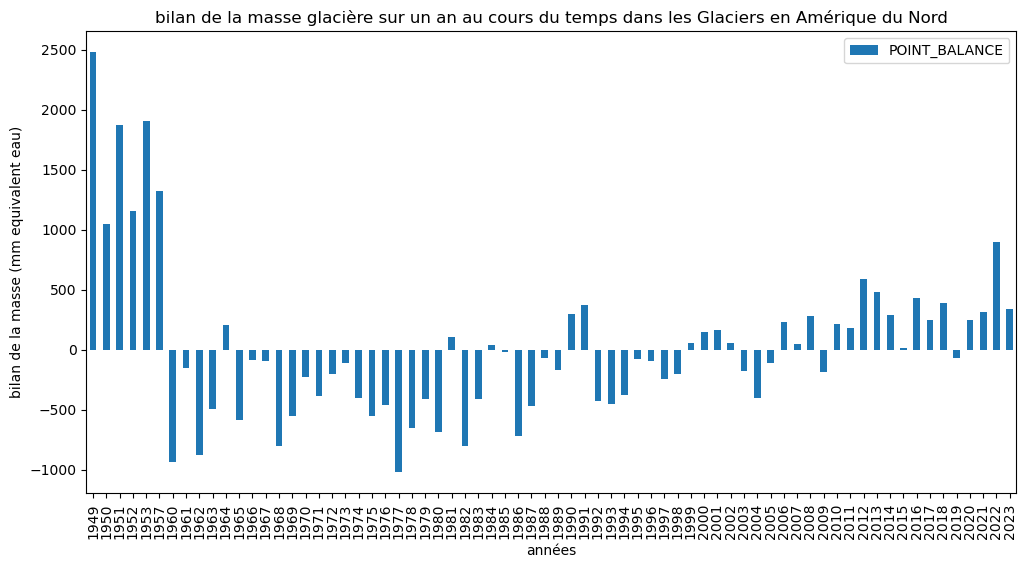

In [28]:
df_glacier_amclean.plot(x= 'YEAR', y='POINT_BALANCE',kind = 'bar',xlabel = 'années', ylabel= 'bilan de la masse (mm equivalent eau)', title = 'bilan de la masse glacière sur un an au cours du temps dans les Glaciers en Amérique du Nord', figsize = (12,6))


Pente de tendance: -1.91
Valeur p de la pente: 0.61
La tendance n’est pas statistiquement significative.
Volatilité moyenne sur toutes les années : 331.05


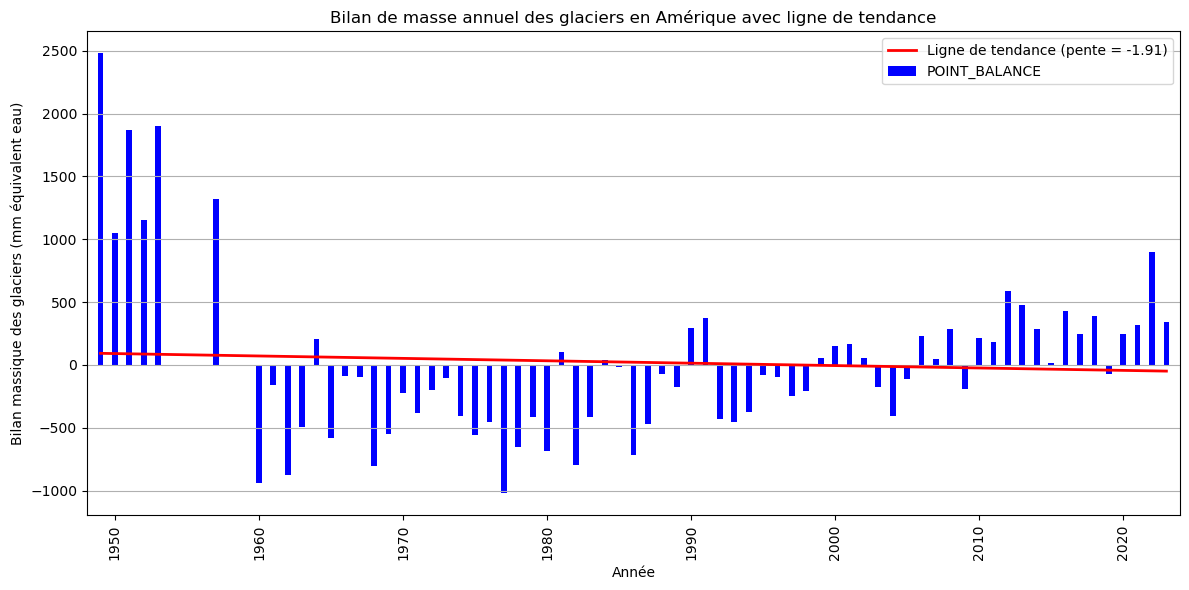

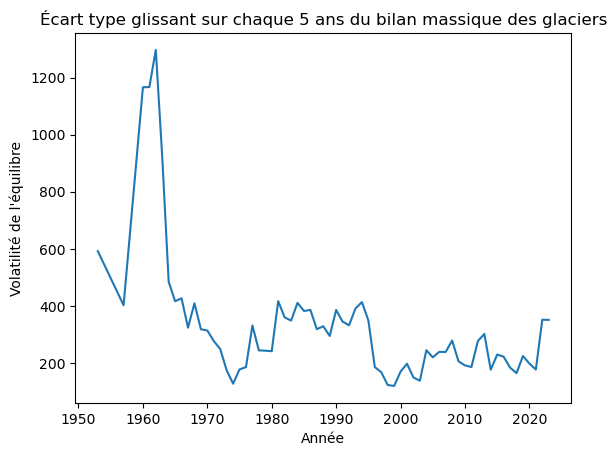

In [29]:
# Analyse de tendance
slope, intercept, r_value, p_value, std_err = linregress(df_glacier_amclean['YEAR'], df_glacier_amclean['POINT_BALANCE'])
trend_line = slope * df_glacier_amclean['YEAR'] + intercept

# Résumer l'analyse des tendances
print(f"Pente de tendance: {slope:.2f}")
print(f"Valeur p de la pente: {p_value:.2g}")
if p_value < 0.05:
    print("La tendance est statistiquement significative.")
else:
    print("La tendance n’est pas statistiquement significative.")

# Analyse de volatilité

df_glacier_amclean['Volatilité'] = df_glacier_amclean['POINT_BALANCE'].rolling(window=5).std()

# Résumer l'analyse de volatilité
print(f"Volatilité moyenne sur toutes les années : {df_glacier_amclean['Volatilité'].mean():.2f}")

plt.figure(figsize=(12,6))
plt.bar(df_glacier_amclean['YEAR'], df_glacier_amclean['POINT_BALANCE'], color='blue', label='POINT_BALANCE', width=0.4)
plt.plot(df_glacier_amclean['YEAR'], trend_line, color='red', label=f'Ligne de tendance (pente = {slope:.2f})', linewidth=2)
plt.legend()
plt.xlabel('Année')
plt.ylabel('Bilan massique des glaciers (mm équivalent eau)')
plt.title('Bilan de masse annuel des glaciers en Amérique avec ligne de tendance')
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Analyse de volatilité
df_glacier_amclean['Volatilité'] = df_glacier_amclean['POINT_BALANCE'].rolling(window=5).std()
sns.lineplot(x='YEAR', y='Volatilité', data=df_glacier_amclean)
plt.xlabel('Année')
plt.ylabel('Volatilité de l\'équilibre')
plt.title('Écart type glissant sur chaque 5 ans du bilan massique des glaciers')
plt.show()

# L'analyse de corrélation et la détection des anomalies peuvent être effectuées de la même manière, je pense
# nécessite des ensembles de données supplémentaires pour corréler ou utiliser des méthodes statistiques pour trouver des anomalies, donc je n'en ai pas encore


<span style="color:green">
______________________________________________________________________________________________________

In [30]:
df_glacier_groenisland = df_groenisland.groupby(df_groenisland["YEAR"])["POINT_BALANCE"].mean()
df_glacier_groenisland = pd.DataFrame(df_glacier_groenisland)
df_glacier_groenisland = df_glacier_groenisland.reset_index(drop = False)
df_glacier_groenisland

YEAR  POINT_BALANCE
0   1939      39.500000
1   1940     -78.277778
2   1997   -1084.285714
3   1998   -1618.529412
4   1999   -1481.111111
5   2000    -774.666667
6   2001   -1712.424242
7   2002   -2353.333333
8   2003     185.714286
9   2004   -1665.833333
10  2005   -3153.125000
11  2006   -1729.200000
12  2007   -2625.909091
13  2008   -1224.656250
14  2009   -1287.071429
15  2010   -1867.233333
16  2011   -1144.979592
17  2012   -1182.111111
18  2013   -1463.971429
19  2014      67.027027
20  2015     553.500000
21  2016     534.333333
22  2022    -830.892857
23  2023     480.838095

<Axes: title={'center': 'bilan de la masse glacière sur un an au cours du temps dans les Glaciers au Groenland et en Islande'}, xlabel='années', ylabel='bilan de la masse (mm equivalent eau)'>

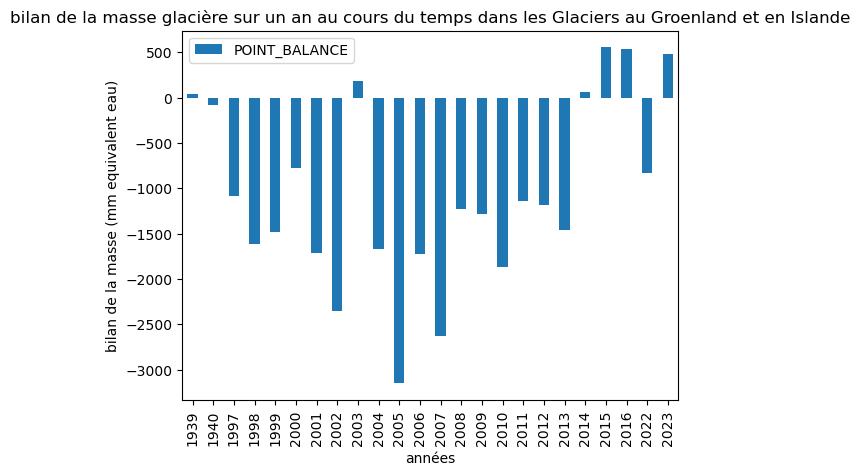

In [31]:
df_glacier_groenisland.plot(x= 'YEAR', y='POINT_BALANCE',kind = 'bar',xlabel = 'années', ylabel= 'bilan de la masse (mm equivalent eau)', title = 'bilan de la masse glacière sur un an au cours du temps dans les Glaciers au Groenland et en Islande' )



Pente de tendance: -6.67
Valeur p de la pente: 0.53
La tendance n’est pas statistiquement significative.
Volatilité moyenne sur toutes les années : 331.05


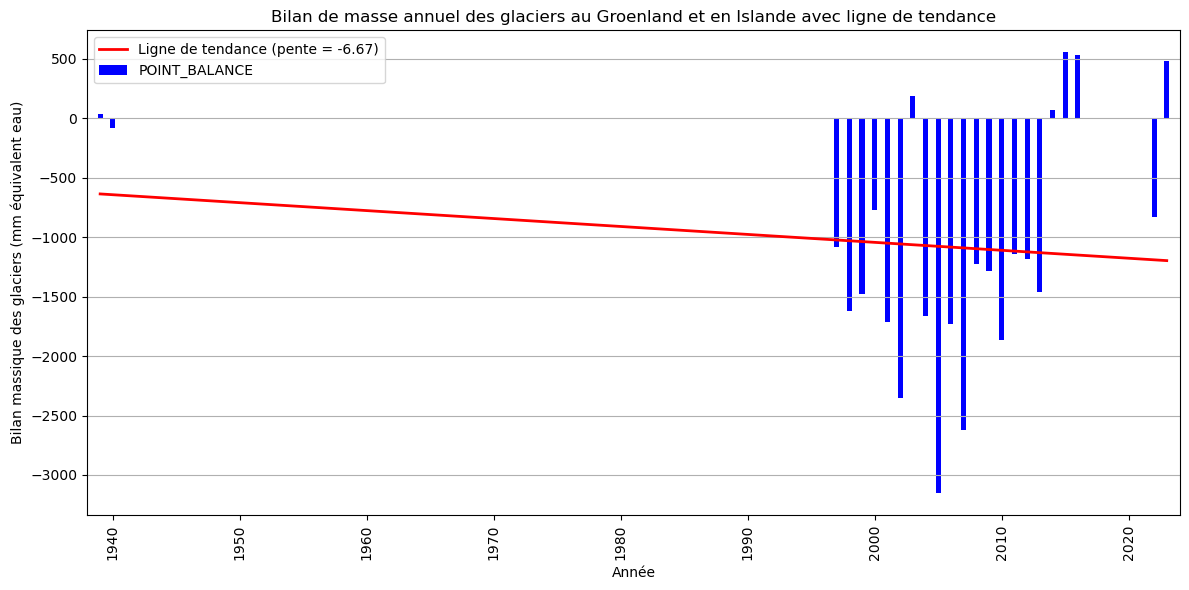

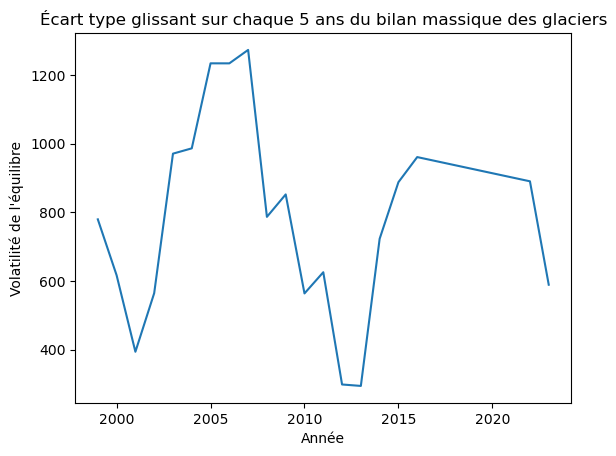

In [32]:
# Analyse de tendance
slope, intercept, r_value, p_value, std_err = linregress(df_glacier_groenisland['YEAR'], df_glacier_groenisland['POINT_BALANCE'])
trend_line = slope * df_glacier_groenisland['YEAR'] + intercept

# Résumer l'analyse des tendances
print(f"Pente de tendance: {slope:.2f}")
print(f"Valeur p de la pente: {p_value:.2g}")
if p_value < 0.05:
    print("La tendance est statistiquement significative.")
else:
    print("La tendance n’est pas statistiquement significative.")

# Analyse de volatilité
df_glacier_groenisland['Volatilité'] = df_glacier_groenisland['POINT_BALANCE'].rolling(window=5).std()

# Résumer l'analyse de volatilité 
print(f"Volatilité moyenne sur toutes les années : {df_glacier_amclean['Volatilité'].mean():.2f}")

plt.figure(figsize=(12,6))
plt.bar(df_glacier_groenisland['YEAR'], df_glacier_groenisland['POINT_BALANCE'], color='blue', label='POINT_BALANCE', width=0.4)
plt.plot(df_glacier_groenisland['YEAR'], trend_line, color='red', label=f'Ligne de tendance (pente = {slope:.2f})', linewidth=2)
plt.legend()
plt.xlabel('Année')
plt.ylabel('Bilan massique des glaciers (mm équivalent eau)')
plt.title('Bilan de masse annuel des glaciers au Groenland et en Islande avec ligne de tendance')
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Analyse de volatilité
df_glacier_groenisland['Volatilité'] = df_glacier_groenisland['POINT_BALANCE'].rolling(window=5).std()
sns.lineplot(x='YEAR', y='Volatilité', data=df_glacier_groenisland)
plt.xlabel('Année')
plt.ylabel('Volatilité de l\'équilibre')
plt.title('Écart type glissant sur chaque 5 ans du bilan massique des glaciers')
plt.show()

<span style="color:green">
______________________________________________________________________________________________________

In [33]:

df_glacier_alclean = df_glacier_alpes.groupby(df_glacier_alpes["YEAR"])["POINT_BALANCE"].mean()
df_glacier_alclean = pd.DataFrame(df_glacier_alclean)
df_glacier_alclean = df_glacier_alclean.reset_index(drop = False)
df_glacier_alclean

YEAR  POINT_BALANCE
0    1885    -381.250000
1    1886   -3124.375000
2    1887   -3015.625000
3    1888   -3547.500000
4    1889   -3859.230769
..    ...            ...
129  2019    -309.354930
130  2020    -248.417683
131  2021    -551.645833
132  2022   -2376.448980
133  2023   -2220.428571

[134 rows x 2 columns]

Pente de tendance: 10.43
Valeur p de la pente: 0.0016
La tendance est statistiquement significative.
Volatilité moyenne sur toutes les années : 611.94


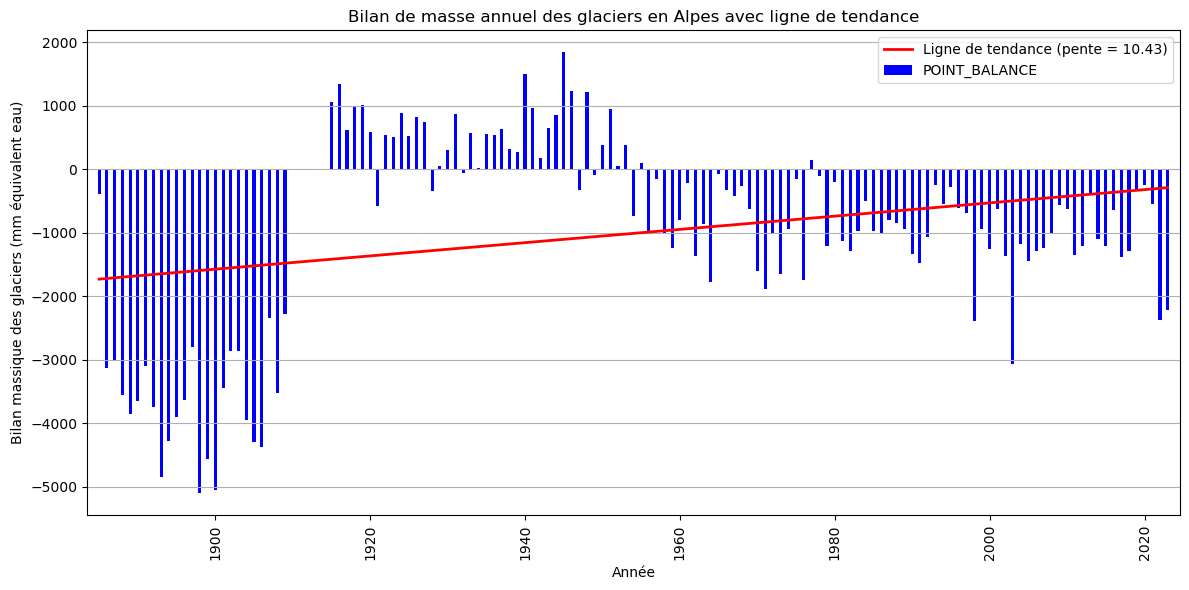

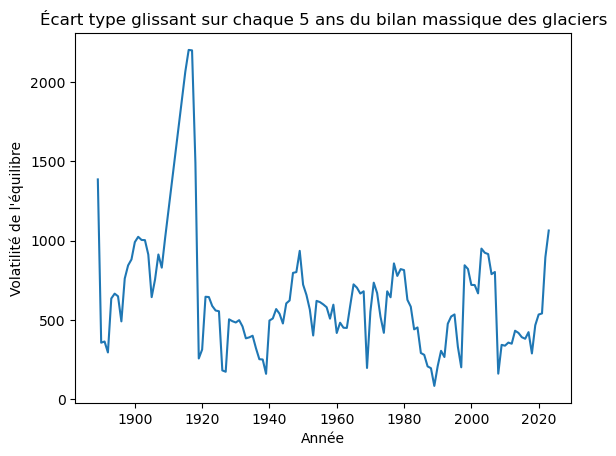

In [34]:
# Analyse de tendance
slope, intercept, r_value, p_value, std_err = linregress(df_glacier_alclean['YEAR'], df_glacier_alclean['POINT_BALANCE'])
trend_line = slope * df_glacier_alclean['YEAR'] + intercept

# Résumer l'analyse des tendances
print(f"Pente de tendance: {slope:.2f}")
print(f"Valeur p de la pente: {p_value:.2g}")
if p_value < 0.05:
    print("La tendance est statistiquement significative.")
else:
    print("La tendance n’est pas statistiquement significative.")

# Analyse de volatilité
df_glacier_alclean['Volatilité'] = df_glacier_alclean['POINT_BALANCE'].rolling(window=5).std()

# Résumer l'analyse de volatilité
print(f"Volatilité moyenne sur toutes les années : {df_glacier_alclean['Volatilité'].mean():.2f}")

plt.figure(figsize=(12,6))
plt.bar(df_glacier_alclean['YEAR'], df_glacier_alclean['POINT_BALANCE'], color='blue', label='POINT_BALANCE', width=0.4)
plt.plot(df_glacier_alclean['YEAR'], trend_line, color='red', label=f'Ligne de tendance (pente = {slope:.2f})', linewidth=2)
plt.legend()
plt.xlabel('Année')
plt.ylabel('Bilan massique des glaciers (mm équivalent eau)')
plt.title('Bilan de masse annuel des glaciers en Alpes avec ligne de tendance')
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Analyse de volatilité
df_glacier_alclean['Volatilité'] = df_glacier_alclean['POINT_BALANCE'].rolling(window=5).std()
sns.lineplot(x='YEAR', y='Volatilité', data=df_glacier_alclean)
plt.xlabel('Année')
plt.ylabel('Volatilité de l\'équilibre')
plt.title('Écart type glissant sur chaque 5 ans du bilan massique des glaciers')
plt.show()

<span style="color:green">
______________________________________________________________________________________________________

In [35]:
df_glacier_artique_clean = df_glacier_artique.groupby(df_glacier_artique["YEAR"])["POINT_BALANCE"].mean()
df_glacier_artique_clean = pd.DataFrame(df_glacier_artique_clean)
df_glacier_artique_clean = df_glacier_artique_clean.reset_index(drop = False)
df_glacier_artique_clean

YEAR  POINT_BALANCE
0   1960    -750.000000
1   1961    -153.500000
2   1962    -664.500000
3   1963     -93.333333
4   1964     257.666667
..   ...            ...
59  2019    -633.200000
60  2020   -1099.600000
61  2021    -260.800000
62  2022    -993.600000
63  2023    -778.600000

[64 rows x 2 columns]

In [36]:
# Analyse de tendance
slope, intercept, r_value, p_value, std_err = linregress(df_glacier_artique_clean['YEAR'], df_glacier_artique_clean['POINT_BALANCE'])
trend_line = slope * df_glacier_artique_clean['YEAR'] + intercept

# Résumer l'analyse des tendances
print(f"Pente de tendance: {slope:.2f}")
print(f"Valeur p de la pente: {p_value:.2g}")
if p_value < 0.05:
    print("La tendance est statistiquement significative.")
else:
    print("La tendance n’est pas statistiquement significative.")

# Analyse de volatilité
df_glacier_artique_clean['Volatilité'] = df_glacier_artique_clean['POINT_BALANCE'].rolling(window=5).std()

# Résumer l'analyse de volatilité
print(f"Volatilité moyenne sur toutes les années : {df_glacier_artique_clean['Volatilité'].mean():.2f}")

plt.figure(figsize=(12,6))
plt.bar(df_glacier_artique_clean['YEAR'], df_glacier_artique_clean['POINT_BALANCE'], color='blue', label='POINT_BALANCE', width=0.4)
plt.plot(df_glacier_artique_clean['YEAR'], trend_line, color='red', label=f'Ligne de tendance (pente = {slope:.2f})', linewidth=2)
plt.legend()
plt.xlabel('Année')
plt.ylabel('Bilan massique des glaciers (mm équivalent eau)')
plt.title('Bilan de masse annuel des glaciers en Artique avec ligne de tendance')
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Analyse de volatilité

df_glacier_artique_clean['Volatilité'] = df_glacier_artique_clean['POINT_BALANCE'].rolling(window=5).std()
sns.lineplot(x='YEAR', y='Volatilité', data=df_glacier_artique_clean)
plt.xlabel('Année')
plt.ylabel('Volatilité de l\'équilibre')
plt.title('Écart type glissant sur chaque 5 ans du bilan massique des glaciers')
plt.show()

Pente de tendance: -7.85
Valeur p de la pente: 1e-05
La tendance est statistiquement significative.
Volatilité moyenne sur toutes les années : 201.11


<span style="color:green">
______________________________________________________________________________________________________

In [37]:
df_glacier_chili_clean = df_glacier_chili.groupby(df_glacier_chili["YEAR"])["POINT_BALANCE"].mean()
df_glacier_chili_clean = pd.DataFrame(df_glacier_chili_clean)
df_glacier_chili_clean = df_glacier_chili_clean.reset_index(drop = False)
df_glacier_artique_clean

YEAR  POINT_BALANCE  Volatilité
0   1960    -750.000000         NaN
1   1961    -153.500000         NaN
2   1962    -664.500000         NaN
3   1963     -93.333333         NaN
4   1964     257.666667  420.912610
..   ...            ...         ...
59  2019    -633.200000  296.758724
60  2020   -1099.600000  384.920449
61  2021    -260.800000  370.963405
62  2022    -993.600000  400.798902
63  2023    -778.600000  329.881809

[64 rows x 3 columns]

Pente de tendance: -37.57
Valeur p de la pente: 0.019
La tendance est statistiquement significative.
Volatilité moyenne sur toutes les années : 201.11


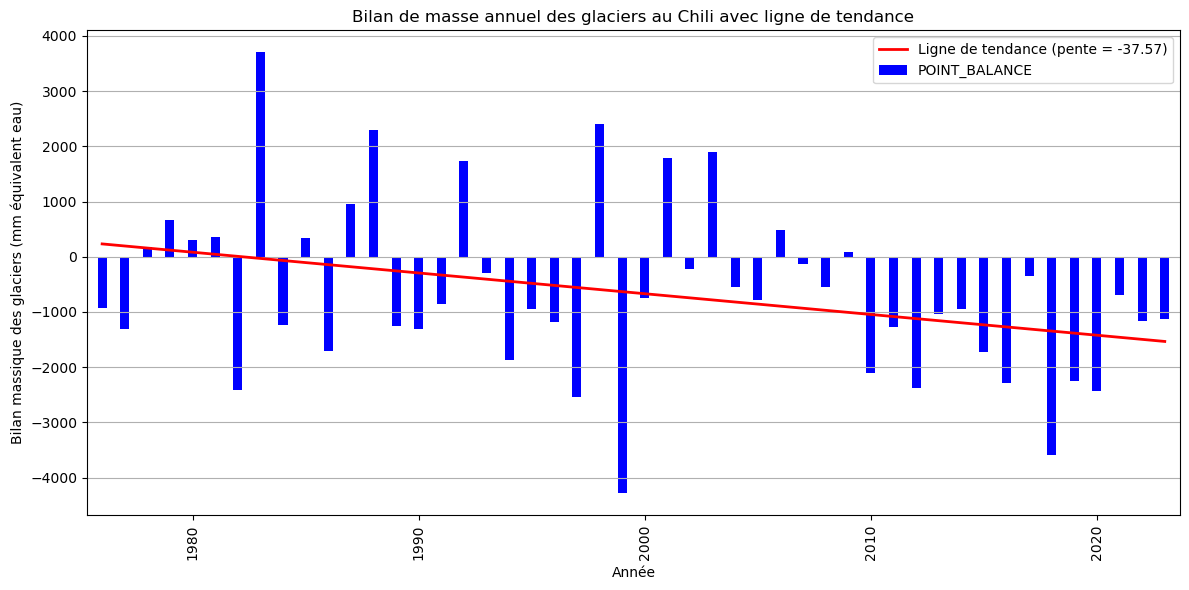

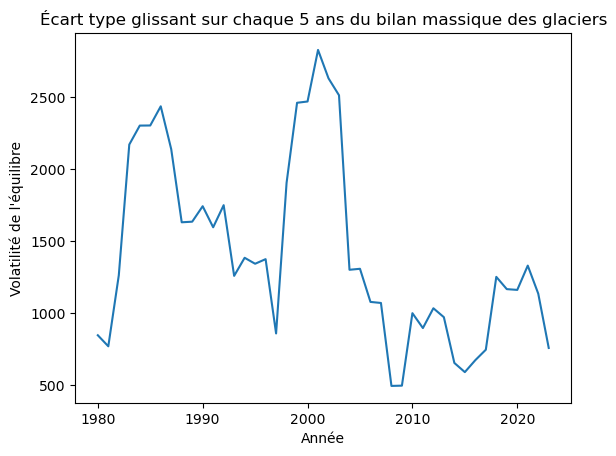

In [38]:
# Analyse de tendance
slope, intercept, r_value, p_value, std_err = linregress(df_glacier_chili_clean['YEAR'], df_glacier_chili_clean['POINT_BALANCE'])
trend_line = slope * df_glacier_chili_clean['YEAR'] + intercept

# Résumer l'analyse des tendances
print(f"Pente de tendance: {slope:.2f}")
print(f"Valeur p de la pente: {p_value:.2g}")
if p_value < 0.05:
    print("La tendance est statistiquement significative.")
else:
    print("La tendance n’est pas statistiquement significative.")

# Analyse de volatilité
df_glacier_chili_clean['Volatilité'] = df_glacier_chili_clean['POINT_BALANCE'].rolling(window=5).std()

# Résumer l'analyse de volatilité 
print(f"Volatilité moyenne sur toutes les années : {df_glacier_artique_clean['Volatilité'].mean():.2f}")

plt.figure(figsize=(12,6))
plt.bar(df_glacier_chili_clean['YEAR'], df_glacier_chili_clean['POINT_BALANCE'], color='blue', label='POINT_BALANCE', width=0.4)
plt.plot(df_glacier_chili_clean['YEAR'], trend_line, color='red', label=f'Ligne de tendance (pente = {slope:.2f})', linewidth=2)
plt.legend()
plt.xlabel('Année')
plt.ylabel('Bilan massique des glaciers (mm équivalent eau)')
plt.title('Bilan de masse annuel des glaciers au Chili avec ligne de tendance')
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Analyse de volatilité

df_glacier_chili_clean['Volatilité'] = df_glacier_chili_clean['POINT_BALANCE'].rolling(window=5).std()
sns.lineplot(x='YEAR', y='Volatilité', data=df_glacier_chili_clean)
plt.xlabel('Année')
plt.ylabel('Volatilité de l\'équilibre')
plt.title('Écart type glissant sur chaque 5 ans du bilan massique des glaciers')
plt.show()

<span style="color:green">
______________________________________________________________________________________________________

In [39]:
df_glacier_ascl = df_glacier_asiec.groupby(df_glacier_asiec["YEAR"])["POINT_BALANCE"].mean()
df_glacier_ascl = pd.DataFrame(df_glacier_ascl)
df_glacier_ascl = df_glacier_ascl.reset_index(drop = False)
df_glacier_ascl

YEAR  POINT_BALANCE
0   1957    -150.000000
1   1958     330.000000
2   1959    -166.500000
3   1960    -144.000000
4   1961    -296.500000
..   ...            ...
62  2019   -1895.000000
63  2020   -1708.470588
64  2021   -4174.083333
65  2022   -2227.859307
66  2023   -3052.353059

[67 rows x 2 columns]

Pente de tendance: -26.28
Valeur p de la pente: 1.5e-08
La tendance est statistiquement significative.
Volatilité moyenne sur toutes les années : 432.27


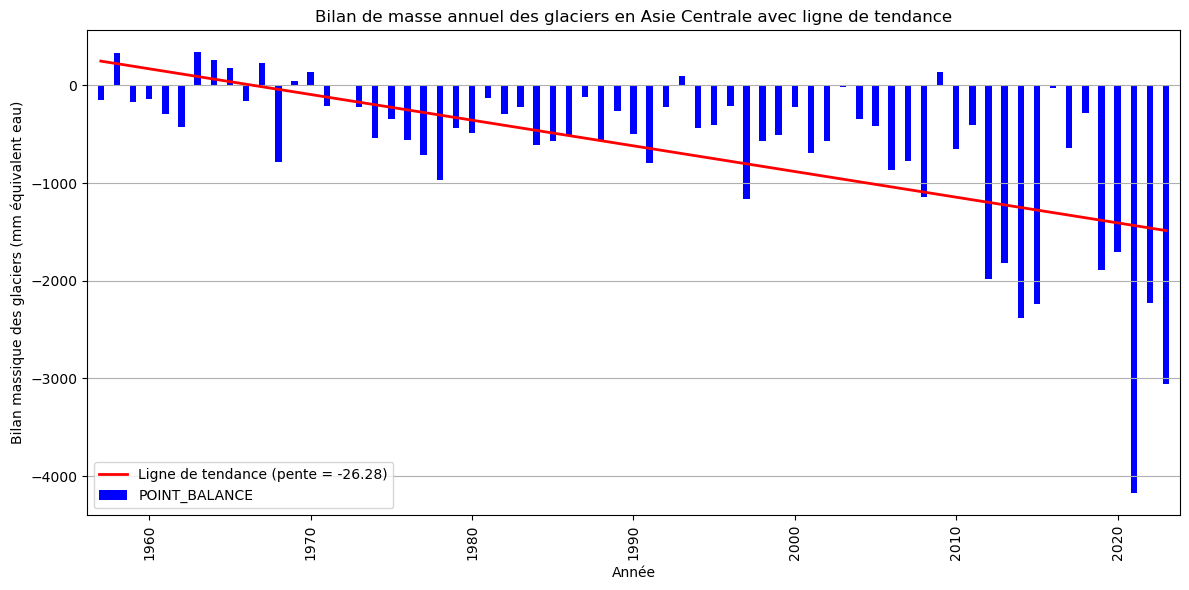

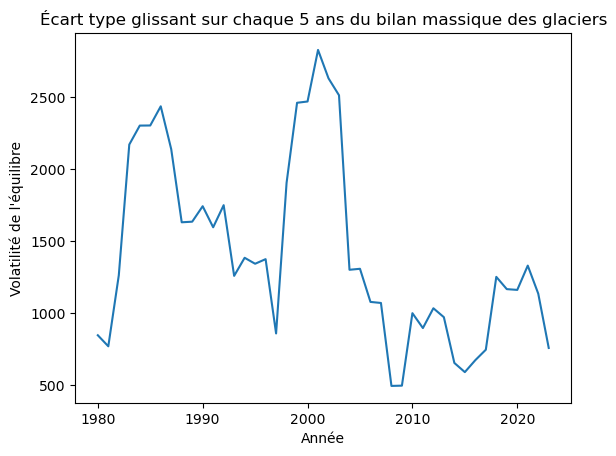

In [40]:
# Analyse de tendance
slope, intercept, r_value, p_value, std_err = linregress(df_glacier_ascl['YEAR'], df_glacier_ascl['POINT_BALANCE'])
trend_line = slope * df_glacier_ascl['YEAR'] + intercept

# Résumer l'analyse des tendances
print(f"Pente de tendance: {slope:.2f}")
print(f"Valeur p de la pente: {p_value:.2g}")
if p_value < 0.05:
    print("La tendance est statistiquement significative.")
else:
    print("La tendance n’est pas statistiquement significative.")

# Analyse de volatilité
df_glacier_ascl['Volatilité'] = df_glacier_ascl['POINT_BALANCE'].rolling(window=5).std()

# Résumer l'analyse de volatilité 
print(f"Volatilité moyenne sur toutes les années : {df_glacier_ascl['Volatilité'].mean():.2f}")

plt.figure(figsize=(12,6))
plt.bar(df_glacier_ascl['YEAR'], df_glacier_ascl['POINT_BALANCE'], color='blue', label='POINT_BALANCE', width=0.4)
plt.plot(df_glacier_ascl['YEAR'], trend_line, color='red', label=f'Ligne de tendance (pente = {slope:.2f})', linewidth=2)
plt.legend()
plt.xlabel('Année')
plt.ylabel('Bilan massique des glaciers (mm équivalent eau)')
plt.title('Bilan de masse annuel des glaciers en Asie Centrale avec ligne de tendance')
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Analyse de volatilité
df_glacier_ascl['Volatilité'] = df_glacier_ascl['POINT_BALANCE'].rolling(window=5).std()
sns.lineplot(x='YEAR', y='Volatilité', data=df_glacier_chili_clean)
plt.xlabel('Année')
plt.ylabel('Volatilité de l\'équilibre')
plt.title('Écart type glissant sur chaque 5 ans du bilan massique des glaciers')
plt.show()

<span style="color:green">
______________________________________________________________________________________________________

In [41]:
df_glacier_scancl = df_glacier_scandinavie.groupby(df_glacier_scandinavie["YEAR"])["POINT_BALANCE"].mean()
df_glacier_scancl = pd.DataFrame(df_glacier_scancl)
df_glacier_scancl = df_glacier_scancl.reset_index(drop = False)
df_glacier_scancl

YEAR  POINT_BALANCE
0   1946    -560.000000
1   1947   -1880.000000
2   1948    -290.000000
3   1949     395.000000
4   1950    -796.666667
..   ...            ...
73  2019    -935.100000
74  2020     294.300000
75  2021   -1031.200000
76  2022    -608.400000
77  2023   -1198.700000

[78 rows x 2 columns]

Pente de tendance: -3.68
Valeur p de la pente: 0.33
La tendance n’est pas statistiquement significative.
Volatilité moyenne sur toutes les années : 432.27


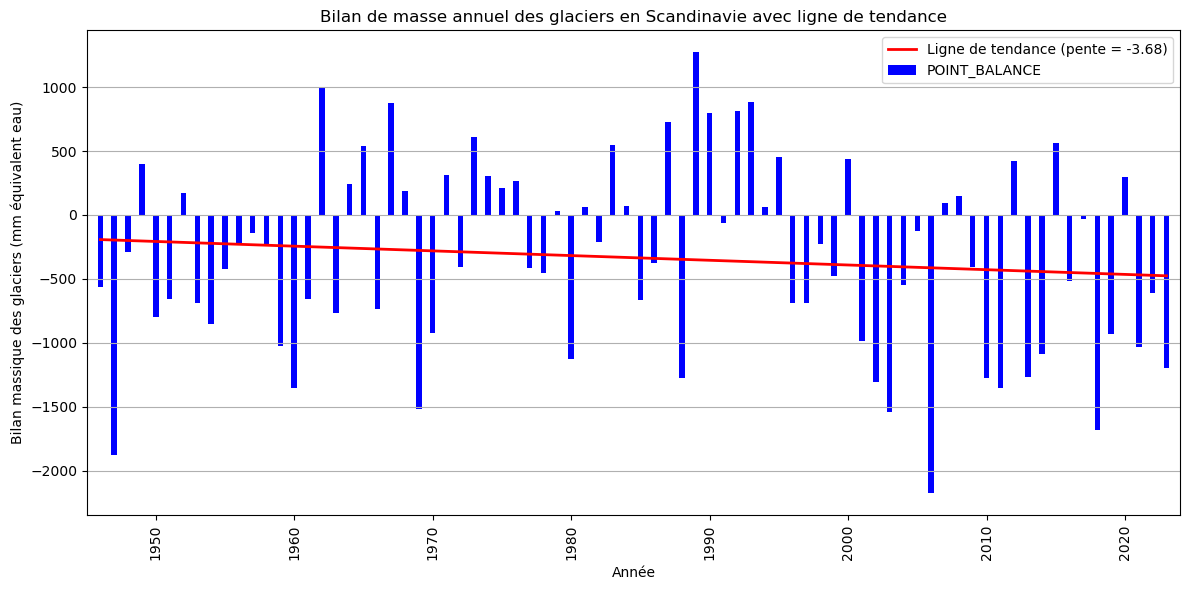

In [42]:
# Analyse de tendance
slope, intercept, r_value, p_value, std_err = linregress(df_glacier_scancl['YEAR'], df_glacier_scancl['POINT_BALANCE'])
trend_line = slope * df_glacier_scancl['YEAR'] + intercept

# Résumer l'analyse des tendances
print(f"Pente de tendance: {slope:.2f}")
print(f"Valeur p de la pente: {p_value:.2g}")
if p_value < 0.05:
    print("La tendance est statistiquement significative.")
else:
    print("La tendance n’est pas statistiquement significative.")

# Analyse de volatilité
df_glacier_scancl['Volatilité'] = df_glacier_scancl['POINT_BALANCE'].rolling(window=5).std()

# Résumer l'analyse de volatilité 
print(f"Volatilité moyenne sur toutes les années : {df_glacier_ascl['Volatilité'].mean():.2f}")

plt.figure(figsize=(12,6))
plt.bar(df_glacier_scancl['YEAR'], df_glacier_scancl['POINT_BALANCE'], color='blue', label='POINT_BALANCE', width=0.4)
plt.plot(df_glacier_scancl['YEAR'], trend_line, color='red', label=f'Ligne de tendance (pente = {slope:.2f})', linewidth=2)
plt.legend()
plt.xlabel('Année')
plt.ylabel('Bilan massique des glaciers (mm équivalent eau)')
plt.title('Bilan de masse annuel des glaciers en Scandinavie avec ligne de tendance')
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Analyse de volatilité
df_glacier_scancl['Volatilité'] = df_glacier_scancl['POINT_BALANCE'].rolling(window=5).std()
sns.lineplot(x='YEAR', y='Volatilité', data=df_glacier_scancl)
plt.xlabel('Année')
plt.ylabel('Volatilité de l\'équilibre')
plt.title('Écart type glissant sur chaque 5 ans du bilan massique des glaciers')
plt.show()

<span style="color:green">
______________________________________________________________________________________________________

In [43]:
df_glacier_caucasecl = df_glacier_caucase.groupby(df_glacier_caucase["YEAR"])["POINT_BALANCE"].mean()
df_glacier_caucasecl = pd.DataFrame(df_glacier_caucasecl)
df_glacier_caucasecl = df_glacier_caucasecl.reset_index(drop = False)
df_glacier_caucasecl

YEAR  POINT_BALANCE
0   1968          100.0
1   1969        -1090.0
2   1970          410.0
3   1971         -230.0
4   1972        -1140.0
5   1973         -280.0
6   1974          240.0
7   1975         -910.0
8   1976          290.0
9   1977         -370.0
10  1978          440.0
11  1979         -310.0
12  1980          380.0
13  1981         -910.0
14  1982          420.0
15  1983         -970.0
16  1984          275.0
17  1985         -240.0
18  1986         -570.0
19  1987          975.0
20  1988          395.0
21  1989           35.0
22  1990          215.0
23  1991         -170.0
24  1992            5.0
25  1993          705.0
26  1994         -635.0
27  1995           15.0
28  1996          -90.0
29  1997          230.0
30  1998        -1255.0
31  1999         -690.0
32  2000        -1100.0
33  2001         -685.0
34  2002          345.0
35  2003          220.0
36  2004          490.0
37  2005          295.0
38  2006         -730.0
39  2007        -1320.0
40  2008         -415.0
41  2009         -300.0
42  2010         -920.5
43  2011         -769.0
44  2012        -1309.5
45  2013         -363.0
46  2014        -1145.0
47  2015        -1020.0
48  2016         -855.0
49  2017         -835.0
50  2018         -464.0
51  2019         -732.0
52  2020        -1398.5
53  2021         -336.0
54  2022         -871.5
55  2023         -532.0

Pente de tendance: -13.73
Valeur p de la pente: 0.0046
La tendance est statistiquement significative.
Volatilité moyenne sur toutes les années : 432.27


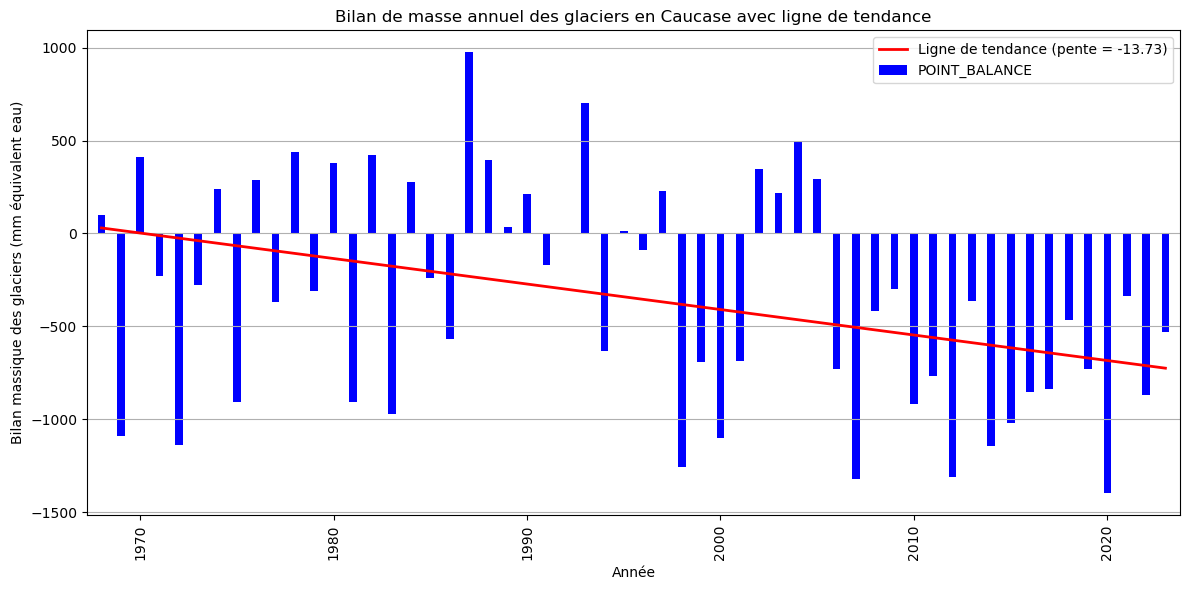

In [44]:
# Analyse de tendance
slope, intercept, r_value, p_value, std_err = linregress(df_glacier_caucasecl['YEAR'], df_glacier_caucasecl['POINT_BALANCE'])
trend_line = slope * df_glacier_caucasecl['YEAR'] + intercept

# Résumer l'analyse des tendances
print(f"Pente de tendance: {slope:.2f}")
print(f"Valeur p de la pente: {p_value:.2g}")
if p_value < 0.05:
    print("La tendance est statistiquement significative.")
else:
    print("La tendance n’est pas statistiquement significative.")

# Analyse de volatilité

df_glacier_caucasecl['Volatilité'] = df_glacier_caucasecl['POINT_BALANCE'].rolling(window=5).std()

# Résumer l'analyse de volatilité 
print(f"Volatilité moyenne sur toutes les années : {df_glacier_ascl['Volatilité'].mean():.2f}")

plt.figure(figsize=(12,6))
plt.bar(df_glacier_caucasecl['YEAR'], df_glacier_caucasecl['POINT_BALANCE'], color='blue', label='POINT_BALANCE', width=0.4)
plt.plot(df_glacier_caucasecl['YEAR'], trend_line, color='red', label=f'Ligne de tendance (pente = {slope:.2f})', linewidth=2)
plt.legend()
plt.xlabel('Année')
plt.ylabel('Bilan massique des glaciers (mm équivalent eau)')
plt.title('Bilan de masse annuel des glaciers en Caucase avec ligne de tendance')
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Analyse de volatilité

df_glacier_caucasecl['Volatilité'] = df_glacier_caucasecl['POINT_BALANCE'].rolling(window=5).std()
sns.lineplot(x='YEAR', y='Volatilité', data=df_glacier_caucasecl)
plt.xlabel('Année')
plt.ylabel('Volatilité de l\'équilibre')
plt.title('Écart type glissant sur chaque 5 ans du bilan massique des glaciers')
plt.show()

<span style="color:green">
______________________________________________________________________________________________________

In [45]:
df_glacier_groenisland['YEAR'] = df_glacier_groenisland['YEAR'].astype(int)
df_GHG_groenisland['YEAR'] = df_GHG_groenisland['YEAR'].astype(int)

df_glacier_groenisland = df_glacier_groenisland.set_index('YEAR')
df_GHG_groenisland = df_GHG_groenisland.set_index('YEAR')

df_tempy = pd.concat([df_glacier_groenisland, df_GHG_groenisland], axis=1)
df_tempy = df_tempy.reset_index()

df_tempy = df_tempy.dropna()
df_tempy['Total GHG']= df_tempy.iloc[:, -6:-1].sum(axis=1)
df_tempy['Total GHG']= df_tempy.iloc[:, -6:-1].sum(axis=1)
df_tempy

/tmp/ipykernel_553/585723044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GHG_groenisland['YEAR'] = df_GHG_groenisland['YEAR'].astype(int)


YEAR  POINT_BALANCE   Volatilité Greenland   Iceland     Norway  \
4   1999   -1481.111111   779.494213   0.06658  3.827048  76.006427   
5   2000    -774.666667   616.689892  0.066494  3.935336   72.38091   
6   2001   -1712.424242   394.022324  0.066752  4.045275  73.182164   
7   2002   -2353.333333   564.598285  0.067015  4.242259  72.696822   
8   2003     185.714286   970.721754  0.067287  4.211178  76.712769   
9   2004   -1665.833333   986.194707  0.687501  4.294484  77.548252   
10  2005   -3153.125000  1233.666940   0.69401  4.266438  74.508991   
11  2006   -1729.200000  1233.596683  0.709943  4.413037  74.857336   
12  2007   -2625.909091  1272.705830  0.700053  4.742115  75.548596   
13  2008   -1224.656250   786.737134  0.719213  5.053411   76.04152   
14  2009   -1287.071429   852.076505  0.632752  5.051068  73.272007   
15  2010   -1867.233333   563.833130  0.725166   4.98904   76.16419   
16  2011   -1144.979592   625.552341  0.766685  4.849578  73.810921   
17  2012   -1182.111111   298.762087  0.619887   4.85301  72.390871   
18  2013   -1463.971429   294.561630  0.611607  4.902805  72.572625   
19  2014      67.027027   722.871649  0.559642  4.727426  72.538174   
20  2015     553.500000   887.689922  0.598538  4.889964  74.295567   
21  2016     534.333333   960.757161   0.59396    4.4576  73.377794   
22  2022    -830.892857   890.230374  0.539507  4.768241  69.965484   

       Finland     Sweden   Total GHG  
4    87.709943  84.162961  251.772959  
5    86.137426  80.797278  243.317443  
6    92.871711  80.576458  250.742361  
7    94.423504  82.435919  253.865519  
8   103.868654  83.257317  268.117205  
9    102.42466  82.090974   267.04587  
10   87.451903  81.440056  248.361398  
11   101.72442  84.195321  265.900057  
12   95.074541  81.466179  257.531484  
13   86.239892   78.27666  246.330695  
14   82.901391  72.558422   234.41564  
15   92.972024  78.578455  253.428876  
16   84.646601  73.637624  237.711409  
17   80.599003  70.327713  228.790484  
18   80.691448  68.063588  226.842073  
19   75.811848  66.407027  220.044116  
20   71.106436  66.670409  217.560914  
21   70.973108  66.383527   215.78599  
22   54.805048  60.636813  190.715094

In [46]:
# Convertissez la colonne 'Total GHG' en numérique, utilisez error='coerce' pour définir une valeur non valide sur NaN
df_tempy['Total GHG'] = pd.to_numeric(df_tempy['Total GHG'], errors='coerce')

# Supprimez les lignes contenant NaN le cas échéant après la conversion
df_tempy = df_tempy.dropna(subset=['Total GHG'])

# Vérifiez à nouveau le type de données de la colonne 'Total GES' après la conversion
print(df_tempy['Total GHG'].dtype)

float64


In [47]:
# Si les deux colonnes sont désormais des nombres, calculer le coefficient de corrélation
correlation = df_tempy['POINT_BALANCE'].corr(df_tempy['Total GHG'])
print(f'The correlation coefficient between POINT_BALANCE and Total GHG is: {correlation}')

The correlation coefficient between POINT_BALANCE and Total GHG is: -0.4897461095927481


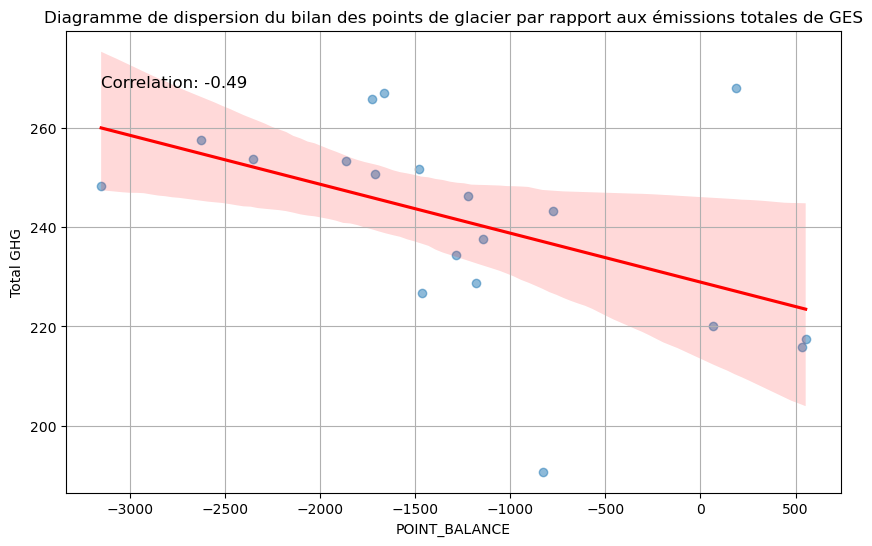

In [48]:
# Créer scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_tempy['POINT_BALANCE'], df_tempy['Total GHG'], alpha=0.5)

# calculer le coefficient de corrélation et l'afficher
correlation = df_tempy['POINT_BALANCE'].corr(df_tempy['Total GHG'])
plt.text(min(df_tempy['POINT_BALANCE']), max(df_tempy['Total GHG']), f'Correlation: {correlation:.2f}', fontsize=12)

# Mettre le titre pour le graphique
plt.title('Diagramme de dispersion du bilan des points de glacier par rapport aux émissions totales de GES')
#plt.xlabel('Glacier Point Balance')
#plt.ylabel('Total GHG Emissions')

# Calculer la droite de régression et sa région de confiance
sns.regplot(x=df_tempy['POINT_BALANCE'], y=df_tempy['Total GHG'], scatter=False, color='red')

# Afficher
plt.grid(True)
plt.show()


In [49]:
df_glacier_alclean['YEAR'] = df_glacier_alclean['YEAR'].astype(int)
df_GHG_alpes['YEAR'] = df_GHG_alpes['YEAR'].astype(int)

df_glacier_alclean = df_glacier_alclean.set_index('YEAR')
df_GHG_alpes = df_GHG_alpes.set_index('YEAR')

df_tempal = pd.concat([df_glacier_alclean, df_GHG_alpes], axis=1)
df_tempal = df_tempal.reset_index()

df_tempal = df_tempal.dropna()
df_tempal['Total GHG']= df_tempal.iloc[:, -6:-1].sum(axis=1)
df_tempal['Total GHG']= df_tempal.iloc[:, -6:-1].sum(axis=1)

df_tempal

/tmp/ipykernel_553/2099174369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GHG_alpes['YEAR'] = df_GHG_alpes['YEAR'].astype(int)


YEAR  POINT_BALANCE  Volatilité France and Monaco      Germany  \
80   1970   -1606.099548  552.889698        637.749427  1322.146944   
81   1971   -1886.406863  735.346390         648.78656  1315.853125   
82   1972   -1021.807107  670.022385        665.635909  1340.156849   
83   1973   -1655.383420  520.890569        702.654926  1392.970244   
84   1974    -932.962366  419.325524        683.706612  1359.983286   
85   1975    -152.715054  680.770588        643.097523  1298.075714   
86   1976   -1744.381443  643.240263        686.998443  1362.581784   
87   1977     148.071823  856.777438        670.196071  1338.595314   
88   1978    -100.978378  777.777262        687.621825  1380.930193   
89   1979   -1213.827381  820.712485        696.656399  1432.638726   
90   1980    -199.138889  814.445425        674.068618  1378.414296   
91   1981   -1127.699422  627.152410        623.169206  1341.713497   
92   1982   -1286.986755  584.046809        602.075157  1291.520487   
93   1983    -974.027586  441.185225        587.638404  1305.788045   
94   1984    -505.048951  453.081854        575.383635  1321.041413   
95   1985    -974.344262  292.189455        559.634925  1322.466214   
96   1986    -995.307692  280.501093        547.009387  1311.230222   
97   1987    -805.553571  207.919279        537.087832  1300.091075   
98   1988    -838.491228  196.360285        533.688734  1290.378632   
99   1989    -946.262295   84.757396        541.976271  1277.856366   
100  1990   -1331.575758  209.389146        535.186772  1235.234519   
101  1991   -1479.353846  305.903029        565.935174  1209.511891   
102  1992   -1069.704918  266.929739        551.544553  1145.911138   
103  1993    -250.657895  476.387383        529.265592  1132.656363   
104  1994    -547.538462  522.059978        523.971742  1118.348126   
105  1995    -276.566038  535.130119        534.503887   1110.34334   
106  1996    -616.173077  331.220214         552.90469  1137.914248   
107  1997    -695.146341  202.074822        539.350231  1099.019569   
108  1998   -2389.940299  844.869104        551.411163  1079.015116   
109  1999    -942.111111  821.221452        543.801874  1038.796542   
110  2000   -1256.830508  721.012038        544.030426   1032.28571   
111  2001    -619.365079  720.389106        548.386084   1043.58425   
112  2002   -1363.000000  667.857691        541.894707  1025.209428   
113  2003   -3067.571429  949.911315        545.083008   1023.85324   
114  2004   -1179.962963  923.727088        546.064411  1007.114208   
115  2005   -1442.878049  915.325523        546.469634    983.71292   
116  2006   -1281.950000  788.941621        532.627729   989.832154   
117  2007   -1240.752381  802.498503        526.904573   958.434171   
118  2008    -996.731481  162.047409         519.76468   960.192839   
119  2009    -561.016667  343.344203        504.832377   896.257395   
120  2010    -618.245763  338.287627        514.622005   940.995946   
121  2011   -1355.045872  357.790743        497.368215   912.983495   
122  2012   -1203.973913  350.739479        499.576973   925.559553   
123  2013    -365.648649  432.411624        493.963932    942.98114   
124  2014   -1104.348485  418.868937        460.202623   902.898854   
125  2015   -1210.639706  391.738177        464.525041   908.132357   
126  2016    -640.579710  381.889648        466.612487   910.204741   
127  2017   -1384.634328  423.521280        469.611897   893.939566   
128  2018   -1283.745902  289.410472        456.092716   864.584742   
129  2019    -309.354930  467.211579        446.238861   810.270738   
130  2020    -248.417683  534.473063        405.715278   751.338964   
131  2021    -551.645833  541.430545        442.587008   792.453356   
132  2022   -2376.448980  895.460214        430.363338   784.004646   

    Italy, San Marino and the Holy See    Austria  \
80                          395.944813  72.486025   
81                          412.384585  75.347232   
82         

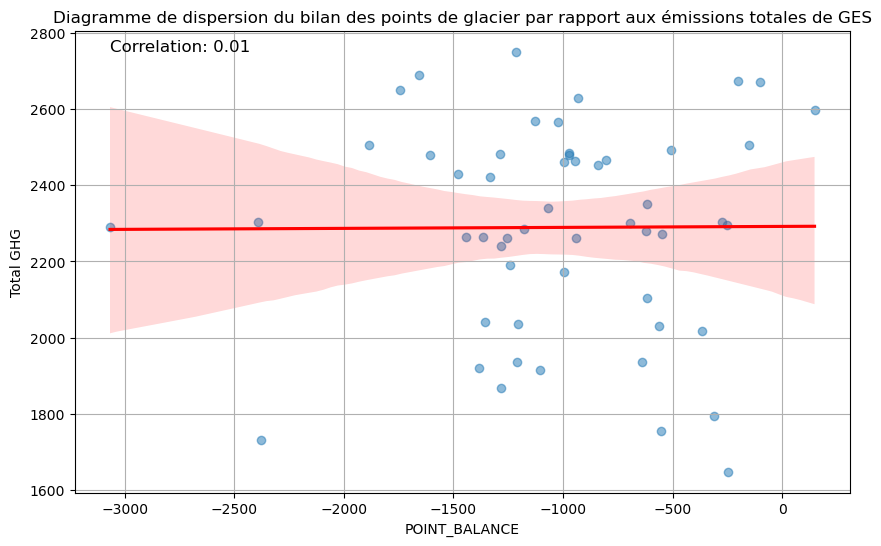

In [50]:
# Convertissez la colonne 'Total GHG' en numérique, utilisez error='coerce' pour définir une valeur non valide sur NaN
df_tempal['Total GHG'] = pd.to_numeric(df_tempal['Total GHG'], errors='coerce')

# Supprimez les lignes contenant NaN le cas échéant après la conversion
df_tempal= df_tempal.dropna(subset=['Total GHG'])

# Créer scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_tempal['POINT_BALANCE'], df_tempal['Total GHG'], alpha=0.5)

# calculer le coefficient de corrélation et l'afficher
correlation = df_tempal['POINT_BALANCE'].corr(df_tempal['Total GHG'])
plt.text(min(df_tempal['POINT_BALANCE']), max(df_tempal['Total GHG']), f'Correlation: {correlation:.2f}', fontsize=12)

# Mettre le titre pour le graphique
plt.title('Diagramme de dispersion du bilan des points de glacier par rapport aux émissions totales de GES')
#plt.xlabel('Glacier Point Balance')
#plt.ylabel('Total GHG Emissions')

# Calculer la droite de régression et sa région de confiance
sns.regplot(x=df_tempal['POINT_BALANCE'], y=df_tempal['Total GHG'], scatter=False, color='red')

# Afficher
plt.grid(True)
plt.show()

jpense qu'il n’existe pratiquement aucune relation linéaire entre les deux variables parce que la correlation est trop petite.

In [51]:
df_glacier_amclean['YEAR'] = df_glacier_amclean['YEAR'].astype(int)
df_GHG_amerique['YEAR'] = df_GHG_amerique['YEAR'].astype(int)

df_glacier_amclean = df_glacier_amclean.set_index('YEAR')
df_GHG_amerique = df_GHG_amerique.set_index('YEAR')

df_tempam = pd.concat([df_glacier_amclean, df_GHG_amerique], axis=1)
df_tempam = df_tempam.reset_index()

df_tempam = df_tempam.dropna()
df_tempam['Total GHG']= df_tempam.iloc[:, -3:-1].sum(axis=1)
df_tempam['Total GHG']= df_tempam.iloc[:, -3:-1].sum(axis=1)

df_tempam

/tmp/ipykernel_553/106762979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GHG_amerique['YEAR'] = df_GHG_amerique['YEAR'].astype(int)


YEAR  POINT_BALANCE  Volatilité United States      Canada    Total GHG
16  1970    -225.714286  313.480754   5750.029633  464.159048  6214.188681
17  1971    -385.813559  276.670770   5624.320655  473.784949  6098.105604
18  1972    -202.666667  248.727479    5894.31589  497.316948  6391.632839
19  1973    -107.044118  174.198907   6093.637117   524.75178  6618.388897
20  1974    -405.661538  127.239670   5915.957818  533.764233  6449.722051
21  1975    -555.670732  177.257441   5699.331436  518.825289  6218.156724
22  1976    -456.948052  185.387659   6014.557728  530.498409  6545.056137
23  1977   -1020.648936  331.254953   6170.764571  551.586198  6722.350769
24  1978    -652.634921  244.046893   6163.384588  558.476094  6721.860682
25  1979    -411.144444  242.861946    6230.31431  573.037869  6803.352179
26  1980    -685.194444  241.266176   5997.688955  578.444677  6576.133632
27  1981     102.600000  416.567061   5917.983071  558.499283  6476.482354
28  1982    -799.181818  359.698969    5649.11198   539.47049   6188.58247
29  1983    -411.666667  348.273551   5618.754033  540.933727   6159.68776
30  1984      38.787500  410.463319   5845.645879  562.128472  6407.774351
31  1985     -18.676471  382.011924   5854.256613   557.59759  6411.854202
32  1986    -715.287671  385.702087   5807.734393  544.098588  6351.832981
33  1987    -466.270588  318.366916   5967.301421  560.156326  6527.457747
34  1988     -72.186441  328.534043   6204.137294  594.265083  6798.402377
35  1989    -171.746032  294.523906   6270.475123  616.418453  6886.893575
36  1990     294.763158  385.658089   6163.741598  582.165354  6745.906952
37  1991     370.105263  344.807201   6115.600587  577.077925  6692.678513
38  1992    -426.693878  331.900528   6215.020469  593.156319  6808.176788
39  1993    -453.120690  390.781199   6341.283283  597.065083  6938.348366
40  1994    -376.130435  413.173404    6448.60354  622.580495  7071.184035
41  1995     -76.327869  348.751587   6517.886171  637.491667  7155.377838
42  1996     -92.108108  185.336006   6687.967131  654.113325  7342.080456
43  1997    -246.141026  167.530619   6971.156595  666.633041  7637.789636
44  1998    -203.954545  122.572754   7020.480586  675.035633  7695.516219
45  1999      57.988889  119.387819   7023.791489  686.001707  7709.793196
46  2000     151.772727  169.529416   7188.178567  710.254944  7898.433511
47  2001     167.117647  197.127316     7105.9394  700.289195  7806.228594
48  2002      54.042553  148.779372    6941.58964  723.208729  7664.798369
49  2003    -177.181818  137.625558   7007.774015  741.693118  7749.467132
50  2004    -403.201681  244.561705   7097.041408  737.785098  7834.826506
51  2005    -111.274725  219.614596   7101.881218  745.212111  7847.093329
52  2006     228.443299  238.730805   6990.806198  742.804791  7733.610989
53  2007      51.489362  238.369967   7087.000577  776.971763   7863.97234
54  2008     283.715909  278.299430    6907.59416  750.026704  7657.620864
55  2009    -187.446809  205.434488   6439.869849  708.891776  7148.761625
56  2010     212.733333  191.281913    6686.47466  726.134884  7412.609544
57  2011     181.382022  185.547595   6485.321483  742.214528  7227.536011
58  2012     587.188679  276.741624   6241.549906  744.557705  6986.107611
59  2013     479.200000  301.487753   6382.441981  755.625534  7138.067515
60  2014     287.228188  176.184947   6409.952019  768.758716  7178.710736
61  2015      13.220588  229.456275   6288.541066  764.534966  7053.076032
62  2016     432.198529  221.690931    6167.14111  758.575666  6925.716775
63  2017     245.083333  183.466269   6110.706444  772.896887  6883.603331
64  2018     391.650794  164.229616   6287.703095  787.651304  7075.354399
65  2019     -71.252427  224.231662    6153.23479  775.376441   6928.61123
66  2020     250.340909  197.792745   5615.567418  711.468639  6327.036057
67  2021     317.703390  176.891824   5923.303104  733.081724  6656.384827
68  2022     901.392405  351.

In [52]:
# Convertissez la colonne 'Total GHG' en numérique, utilisez error='coerce' pour définir une valeur non valide sur NaN
df_tempam['Total GHG'] = pd.to_numeric(df_tempam['Total GHG'], errors='coerce')

# Supprimez les lignes contenant NaN le cas échéant après la conversion
df_tempam= df_tempam.dropna(subset=['Total GHG'])

# Créer scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_tempam['POINT_BALANCE'], df_tempam['Total GHG'], alpha=0.5)

# calculer le coefficient de corrélation et l'afficher
correlation = df_tempam['POINT_BALANCE'].corr(df_tempam['Total GHG'])
plt.text(min(df_tempam['POINT_BALANCE']), max(df_tempam['Total GHG']), f'Correlation: {correlation:.2f}', fontsize=12)

# Mettre le titre pour le graphique
plt.title('Diagramme de dispersion du bilan des points de glacier par rapport aux émissions totales de GES')
#plt.xlabel('Glacier Point Balance')
#plt.ylabel('Total GHG Emissions')

# Calculer la droite de régression et sa région de confiance
sns.regplot(x=df_tempam['POINT_BALANCE'], y=df_tempam['Total GHG'], scatter=False, color='red')

# Afficher
plt.grid(True)
plt.show()

In [53]:
df_glacier_artique_clean['YEAR'] = df_glacier_artique_clean['YEAR'].astype(int)
df_artique_2['YEAR'] = df_artique_2['YEAR'].astype(int)

df_glacier_artique_clean = df_glacier_artique_clean.set_index('YEAR')
df_artique_2 = df_artique_2.set_index('YEAR')

df_tempar = pd.concat([df_glacier_artique_clean, df_artique_2], axis=1)
df_tempar = df_tempar.reset_index()

df_tempar = df_tempar.dropna()
df_tempar['Total GHG']= df_tempar.iloc[:, -3:-1].sum(axis=1)
df_tempar['Total GHG']= df_tempar.iloc[:, -3:-1].sum(axis=1)

df_tempar

/tmp/ipykernel_553/3593138123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artique_2['YEAR'] = df_artique_2['YEAR'].astype(int)


YEAR  POINT_BALANCE  Volatilité     Norway      Canada   Total GHG
10  1970         -263.0  124.781448  55.200632  464.159048   519.35968
11  1971         -404.0  148.377011   53.62092  473.784949  527.405869
12  1972         -157.6  147.073288  57.223716  497.316948  554.540665
13  1973         -111.0  126.327558  58.896692   524.75178  583.648472
14  1974         -435.0  144.100562  57.909346  533.764233  591.673579
15  1975         -116.4  160.867585  56.609403  518.825289  575.434691
16  1976         -123.4  138.888056  59.641298  530.498409  590.139707
17  1977         -112.4  142.831747  60.899973  551.586198  612.486171
18  1978         -235.2  138.648808  60.646645  558.476094  619.122739
19  1979         -281.8   79.118316  64.617297  573.037869  637.655167
20  1980         -217.0   73.447587   63.32752  578.444677  641.772197
21  1981         -302.8   74.176735  59.669408  558.499283  618.168691
22  1982          -54.8   97.713929  55.526516   539.47049  594.997006
23  1983         -131.8  103.988596   56.09497  540.933727  597.028698
24  1984         -234.6   96.296521  59.270376  562.128472  621.398848
25  1985         -255.6  100.632261  60.081276   557.59759  617.678866
26  1986           22.4  117.894750  61.963702  544.098588   606.06229
27  1987           68.0  146.923286  61.146691  560.156326  621.303017
28  1988         -429.0  207.456858   63.13833  594.265083  657.403414
29  1989         -162.2  203.947768  62.922617  616.418453   679.34107
30  1990         -361.6  222.195527  62.914097  582.165354  645.079451
31  1991           -4.2  216.611311  60.225601  577.077925  637.303526
32  1992          -90.8  180.131696  60.930512  593.156319  654.086831
33  1993         -662.8  262.740275  64.105368  597.065083  661.170451
34  1994         -124.4  266.640372  67.627362  622.580495  690.207857
35  1995         -425.4  274.792234  68.061854  637.491667  705.553521
36  1996          -50.0  264.646315  70.184973  654.113325  724.298298
37  1997         -240.6  247.088381  73.297363  666.633041  739.930404
38  1998         -521.2  198.549369  74.238273  675.035633  749.273906
39  1999         -343.4  181.154111  76.006427  686.001707  762.008133
40  2000         -320.0  171.112793   72.38091  710.254944  782.635854
41  2001         -323.2  103.608745  73.182164  700.289195  773.471359
42  2002         -203.8  114.073187  72.696822  723.208729   795.90555
43  2003         -466.2   93.265706  76.712769  741.693118  818.405887
44  2004         -300.2   93.865926  77.548252  737.785098   815.33335
45  2005         -510.4  125.722345  74.508991  745.212111  819.721102
46  2006         -364.2  123.985193  74.857336  742.804791  817.662127
47  2007         -540.4  101.172190  75.548596  776.971763  852.520359
48  2008         -464.6  101.056361   76.04152  750.026704  826.068224
49  2009         -388.0   76.120247  73.272007  708.891776  782.163783
50  2010         -476.6   71.144276   76.16419  726.134884  802.299075
51  2011        -1051.2  266.638234  73.810921  742.214528  816.025449
52  2012         -722.2  271.529763  72.390871  744.557705  816.948577
53  2013         -395.6  282.948497  72.572625  755.625534  828.198159
54  2014          -61.6  370.219324  72.538174  768.758716   841.29689
55  2015         -699.0  373.824146  74.295567  764.534966  838.830533
56  2016         -943.2  341.982707  73.377794  758.575666   831.95346
57  2017         -283.8  347.539621  73.862427  772.896887  846.759315
58  2018         -236.8  363.678226   72.70166  787.651304  860.352963
59  2019         -633.2  296.758724  70.395715  775.376441  845.772156
60  2020        -1099.6  384.920449  70.082848  711.468639  781.551487
61  2021         -260.8  370.963405  71.679112  733.081724  804.760836
62  2022         -993.6  400.798902  69.965484  756.810111  826.775595

In [54]:
# Convertissez la colonne 'Total GHG' en numérique, utilisez error='coerce' pour définir une valeur non valide sur NaN
df_tempar['Total GHG'] = pd.to_numeric(df_tempar['Total GHG'], errors='coerce')

# Supprimez les lignes contenant NaN le cas échéant après la conversion
df_tempar= df_tempar.dropna(subset=['Total GHG'])

# Créer scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_tempar['POINT_BALANCE'], df_tempar['Total GHG'], alpha=0.5)

# calculer le coefficient de corrélation et l'afficher
correlation = df_tempar['POINT_BALANCE'].corr(df_tempar['Total GHG'])
plt.text(min(df_tempar['POINT_BALANCE']), max(df_tempar['Total GHG']), f'Correlation: {correlation:.2f}', fontsize=12)

# Mettre le titre pour le graphique
plt.title('Diagramme de dispersion du bilan des points de glacier par rapport aux émissions totales de GES')
#plt.xlabel('Glacier Point Balance')
#plt.ylabel('Total GHG Emissions')

# Calculer la droite de régression et sa région de confiance
sns.regplot(x=df_tempar['POINT_BALANCE'], y=df_tempar['Total GHG'], scatter=False, color='red')

# Afficher
plt.grid(True)
plt.show()

In [55]:
df_glacier_chili_clean['YEAR'] = df_glacier_chili_clean['YEAR'].astype(int)
df_chili_2['YEAR'] = df_chili_2['YEAR'].astype(int)

df_glacier_chili_clean = df_glacier_chili_clean.set_index('YEAR')
df_chili_2 = df_chili_2.set_index('YEAR')

df_tempcl = pd.concat([df_glacier_chili_clean, df_chili_2], axis=1)
df_tempcl = df_tempcl.reset_index()

df_tempcl = df_tempcl.dropna()
df_tempcl['Total GHG']= df_tempcl.iloc[:, -2:-1].sum(axis=1)
df_tempcl['Total GHG']= df_tempcl.iloc[:, -2:-1].sum(axis=1)

df_tempcl

/tmp/ipykernel_553/111739001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chili_2['YEAR'] = df_chili_2['YEAR'].astype(int)


YEAR  POINT_BALANCE   Volatilité       Chile   Total GHG
4   1980          300.0   848.339555   55.022202   55.022202
5   1981          360.0   771.699423   54.662162   54.662162
6   1982        -2420.0  1264.088604   51.146136   51.146136
7   1983         3700.0  2170.972132   51.112824   51.112824
8   1984        -1240.0  2302.476927   52.275137   52.275137
9   1985          340.0  2303.241194   50.233948   50.233948
10  1986        -1700.0  2436.243009   50.064213   50.064213
11  1987          950.0  2138.644430   50.637467   50.637467
12  1988         2300.0  1631.808812   55.079582   55.079582
13  1989        -1260.0  1636.025672     60.6671     60.6671
14  1990        -1300.0  1743.278520    60.74334    60.74334
15  1991         -860.0  1597.178763   59.334941   59.334941
16  1992         1740.0  1750.565623   61.741798   61.741798
17  1993         -290.0  1260.230138   64.260736   64.260736
18  1994        -1860.0  1385.633429   68.071398   68.071398
19  1995         -950.0  1344.220964   73.304991   73.304991
20  1996        -1180.0  1376.215826   80.595571   80.595571
21  1997        -2530.0   860.854227   87.427177   87.427177
22  1998         2400.0  1905.290004   87.995203   87.995203
23  1999        -4280.0  2460.684864   91.612361   91.612361
24  2000         -750.0  2469.568788   88.194201   88.194201
25  2001         1790.0  2827.300833   86.623931   86.623931
26  2002         -220.0  2630.051330   87.062559   87.062559
27  2003         1900.0  2512.801226   89.166978   89.166978
28  2004         -550.0  1302.470729   94.795239   94.795239
29  2005         -780.0  1309.339528   95.547492   95.547492
30  2006          480.0  1079.573990   96.891135   96.891135
31  2007         -130.0  1072.254634  105.248389  105.248389
32  2008         -540.0   496.920517  110.326988  110.326988
33  2009           80.0   498.818604   105.90619   105.90619
34  2010        -2110.0  1001.463928  107.445967  107.445967
35  2011        -1270.0   898.292825  117.839748  117.839748
36  2012        -2380.0  1035.581962  121.672494  121.672494
37  2013        -1030.0   973.637510  123.432397  123.432397
38  2014         -940.0   656.376416  115.908081  115.908081
39  2015        -1720.0   592.680352  121.124475  121.124475
40  2016        -2284.0   675.665006  126.408024  126.408024
41  2017         -353.0   747.993850  128.447283  128.447283
42  2018        -3592.0  1253.282171  130.463558  130.463558
43  2019        -2246.0  1168.229430  136.531265  136.531265
44  2020        -2430.0  1162.899394  128.964921  128.964921
45  2021         -700.0  1331.379059  140.655971  140.655971
46  2022        -1161.0  1136.933683  137.011248  137.011248

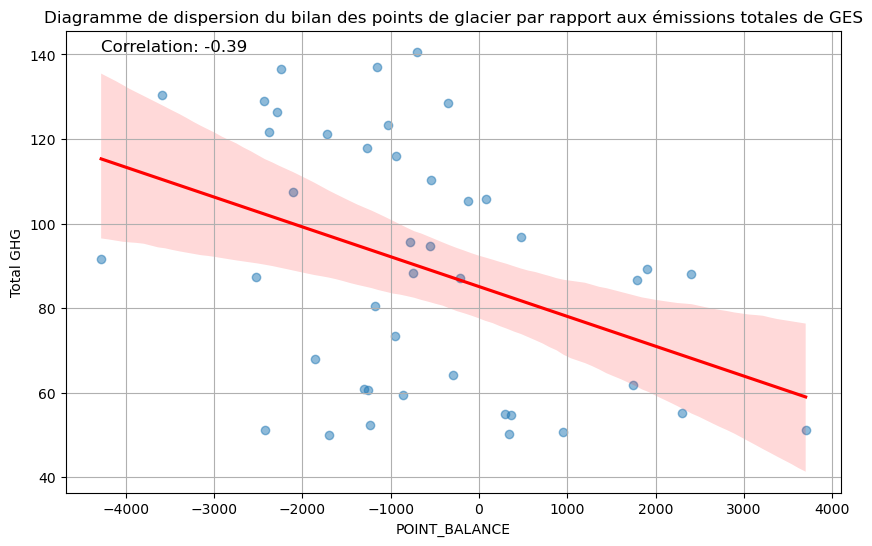

In [56]:
# Convertissez la colonne 'Total GHG' en numérique, utilisez error='coerce' pour définir une valeur non valide sur NaN
df_tempcl['Total GHG'] = pd.to_numeric(df_tempcl['Total GHG'], errors='coerce')

# Supprimez les lignes contenant NaN le cas échéant après la conversion
df_tempcl= df_tempcl.dropna(subset=['Total GHG'])

# Créer scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_tempcl['POINT_BALANCE'], df_tempcl['Total GHG'], alpha=0.5)

# calculer le coefficient de corrélation et l'afficher
correlation = df_tempcl['POINT_BALANCE'].corr(df_tempcl['Total GHG'])
plt.text(min(df_tempcl['POINT_BALANCE']), max(df_tempcl['Total GHG']), f'Correlation: {correlation:.2f}', fontsize=12)

# Mettre le titre pour le graphique
plt.title('Diagramme de dispersion du bilan des points de glacier par rapport aux émissions totales de GES')
#plt.xlabel('Glacier Point Balance')
#plt.ylabel('Total GHG Emissions')

# Calculer la droite de régression et sa région de confiance
sns.regplot(x=df_tempcl['POINT_BALANCE'], y=df_tempcl['Total GHG'], scatter=False, color='red')

# Afficher
plt.grid(True)
plt.show()

In [57]:
df_glacier_ascl['YEAR'] = df_glacier_ascl['YEAR'].astype(int)
df_asiec['YEAR'] = df_asiec['YEAR'].astype(int)

df_glacier_ascl = df_glacier_ascl.set_index('YEAR')
df_asiec = df_asiec.set_index('YEAR')

df_tempac = pd.concat([df_glacier_ascl, df_asiec], axis=1)
df_tempac = df_tempac.reset_index()

df_tempac = df_tempac.dropna()
df_tempac['Total GHG']= df_tempac.iloc[:, -7:-1].sum(axis=1)
df_tempac['Total GHG']= df_tempac.iloc[:, -7:-1].sum(axis=1)

df_tempac

/tmp/ipykernel_553/2028708802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asiec['YEAR'] = df_asiec['YEAR'].astype(int)


YEAR  POINT_BALANCE   Volatilité Kyrgyzstan  Uzbekistan Tajikistan  \
13  1970     135.000000   402.855185  20.060828  109.995212   13.29277   
14  1971    -210.000000   405.209822  20.898323  111.358782   13.64204   
15  1972      -5.000000   366.698105  21.856895  116.472195  14.213366   
16  1973    -220.000000   157.186195  22.768533  122.088908  14.817104   
17  1974    -541.000000   255.917369  23.780896  128.226454  15.441719   
18  1975    -345.000000   196.991624  24.920854  136.589809  16.329857   
19  1976    -560.000000   231.992888  25.474738   140.09985  16.604632   
20  1977    -710.000000   192.828162  25.949419  143.907984  16.936253   
21  1978    -965.000000   230.490130  26.777166  148.663657  17.365562   
22  1979    -440.000000   243.654468  27.340077  152.671981  17.785215   
23  1980    -488.333333   211.930937  28.278635  158.798558   19.14349   
24  1981    -130.666667   312.056494    27.9865  159.637015  19.269048   
25  1982    -295.000000   312.986031  27.847914   162.12673  19.101862   
26  1983    -220.666667   149.119900  27.682191  165.401745  19.584458   
27  1984    -606.000000   195.265147  27.797014  169.307783  19.814988   
28  1985    -573.000000   213.300961   27.81436  173.682264  20.575173   
29  1986    -520.333333   173.771082  28.278533  178.244186   21.29519   
30  1987    -121.333333   221.539487  29.086607  182.908389  21.845762   
31  1988    -561.333333   200.838160  29.340092  185.253982  22.086009   
32  1989    -258.666667   204.833727  29.341546  185.402213  22.192003   
33  1990    -499.333333   192.159887  33.702703  177.173024  22.325112   
34  1991    -793.000000   263.179955  30.965107  176.798588  22.912429   
35  1992    -223.666667   233.898435   22.97506   167.35095  18.841967   
36  1993      99.000000   332.921629  18.581486  168.568904  14.456262   
37  1994    -440.666667   332.420132  14.067638  166.077006  11.909135   
38  1995    -407.500000   326.070033  10.868745  154.752439  11.338231   
39  1996    -207.000000   214.778258  11.676202  157.468477  10.190165   
40  1997   -1160.000000   464.451582  12.105935  157.533567  10.347065   
41  1998    -574.500000   361.349757  12.469834  173.796994  10.467187   
42  1999    -510.500000   357.007598  11.319847  172.461942  10.316958   
43  2000    -221.500000   386.862799  11.292107  181.939439  10.779761   
44  2001    -697.500000   342.655001  10.471948  187.789078  10.287754   
45  2002    -568.000000   177.352897   11.56242  199.164228  11.137269   
46  2003     -12.500000   278.809523  12.246882  187.600257  10.472078   
47  2004    -346.500000   272.427880  12.191563  190.125605  12.607103   
48  2005    -414.000000   259.638354  12.045132  191.579319   12.08083   
49  2006    -871.500000   314.133531  11.930681  204.292168  12.766026   
50  2007    -778.500000   347.492158  13.278462  198.468254  14.253968   
51  2008   -1144.000000   331.238094     14.654  210.810955  13.046149   
52  2009     134.500000   493.587961  14.617242  192.602772  12.289414   
53  2010    -647.500000   480.730486  14.370912  207.964559  12.170991   
54  2011    -410.000000   474.571043  16.472832  212.856451  12.140377   
55  2012   -1987.304348   802.509240  18.509327  202.099391  13.117737   
56  2013   -1817.590909   920.307431  18.475037  200.447171  13.338223   
57  2014   -2383.391304   868.999578  19.457636  191.796436  14.807377   
58  2015   -2233.619048   789.020295  19.953948  187.886473  15.590211   
59  2016     -29.666667   953.636300  19.761835  197.959601  16.624214   
60  2017    -646.333333  1034.376830  20.101588  203.018814  18.351319   
61  2018    -278.666667  1113.235510  22.206539  213.167964  19.742052   
62  2019   -1895.000000   988.483981  21.276678  219.006521  20.697031   
63  2020   -1708.470588   844.223860  20.331201  211.861638  21.191059   
64  2021   -4174.083333  1523.267981  21.473967  221.598176  22.430521   
65  2022   -2227.859307  1398.340156  21.939593  227.206746  22.833624   

       

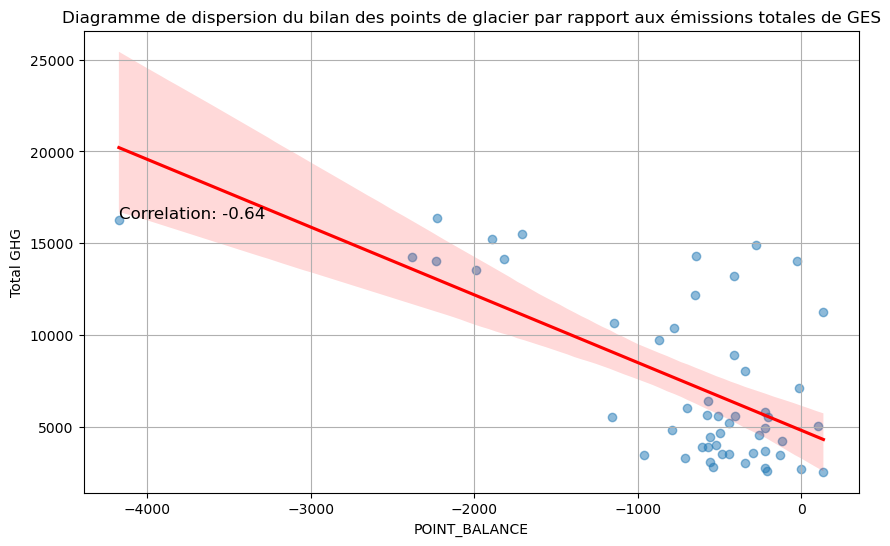

In [58]:
# Convertissez la colonne 'Total GHG' en numérique, utilisez error='coerce' pour définir une valeur non valide sur NaN
df_tempac['Total GHG'] = pd.to_numeric(df_tempac['Total GHG'], errors='coerce')

# Supprimez les lignes contenant NaN le cas échéant après la conversion
df_tempac= df_tempac.dropna(subset=['Total GHG'])

# Créer scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_tempac['POINT_BALANCE'], df_tempac['Total GHG'], alpha=0.5)

# calculer le coefficient de corrélation et l'afficher
correlation = df_tempac['POINT_BALANCE'].corr(df_tempac['Total GHG'])
plt.text(min(df_tempac['POINT_BALANCE']), max(df_tempac['Total GHG']), f'Correlation: {correlation:.2f}', fontsize=12)

# Mettre le titre pour le graphique
plt.title('Diagramme de dispersion du bilan des points de glacier par rapport aux émissions totales de GES')
#plt.xlabel('Glacier Point Balance')
#plt.ylabel('Total GHG Emissions')

# Calculer la droite de régression et sa région de confiance
sns.regplot(x=df_tempac['POINT_BALANCE'], y=df_tempac['Total GHG'], scatter=False, color='red')

# Afficher
plt.grid(True)
plt.show()

In [59]:
df_glacier_scancl['YEAR'] = df_glacier_scancl['YEAR'].astype(int)
df_scandinavie['YEAR'] = df_scandinavie['YEAR'].astype(int)

df_glacier_scancl = df_glacier_scancl.set_index('YEAR')
df_scandinavie = df_scandinavie.set_index('YEAR')

df_tempsc = pd.concat([df_glacier_scancl, df_scandinavie], axis=1)
df_tempsc = df_tempsc.reset_index()

df_tempsc = df_tempsc.dropna()
df_tempsc['Total GHG']= df_tempsc.iloc[:, -3:-1].sum(axis=1)
df_tempsc['Total GHG']= df_tempsc.iloc[:, -3:-1].sum(axis=1)

df_tempsc

/tmp/ipykernel_553/3935698474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scandinavie['YEAR'] = df_scandinavie['YEAR'].astype(int)


YEAR  POINT_BALANCE   Volatilité      Sweden     Norway   Total GHG
24  1970    -920.250000   949.808127  116.237393  55.200632  171.438025
25  1971     314.875000   978.984701   109.02392   53.62092   162.64484
26  1972    -411.000000   766.921694  109.597129  57.223716  166.820845
27  1973     606.375000   873.024346   113.06393  58.896692  171.960622
28  1974     303.875000   627.037774  105.992269  57.909346  163.901614
29  1975     214.000000   374.995240   106.88758  56.609403  163.496982
30  1976     268.625000   372.186561  113.632777  59.641298  173.274075
31  1977    -416.875000   374.584975  109.657586  60.899973  170.557559
32  1978    -454.250000   383.728731  104.895787  60.646645  165.542432
33  1979      29.000000   343.902664  108.325055  64.617297  172.942352
34  1980   -1124.375000   534.039197  100.834948   63.32752  164.162468
35  1981      64.250000   481.041843   93.313441  59.669408  152.982849
36  1982    -209.000000   486.063509   86.761923  55.526516   142.28844
37  1983     546.111111   615.381080   81.752628   56.09497  137.847599
38  1984      73.333333   618.713658   81.738668  59.270376  141.009044
39  1985    -662.111111   442.377189   85.477517  60.081276  145.558793
40  1986    -373.666667   460.191718   86.527232  61.963702  148.490934
41  1987     725.888889   589.360411   84.531013  61.146691  145.677705
42  1988   -1277.777778   755.709157   82.497443   63.13833  145.635773
43  1989    1271.800000  1041.053495   79.753687  62.922617  142.676304
44  1990     797.700000  1035.777034    79.21474  62.914097  142.128836
45  1991     -59.300000   998.951136    79.23699  60.225601   139.46259
46  1992     814.300000  1009.287822   82.052484  60.930512  142.982996
47  1993     883.200000   487.605346   82.462889  64.105368  146.568256
48  1994      60.666667   458.279372   85.072686  67.627362  152.700048
49  1995     454.444444   427.052008   84.479117  68.061854  152.540971
50  1996    -686.600000   644.011744   89.864791  70.184973  160.049764
51  1997    -688.400000   695.601875   85.188742  73.297363  158.486105
52  1998    -223.800000   492.626744   85.330841  74.238273  159.569114
53  1999    -479.400000   475.507164   84.162961  76.006427  160.169388
54  2000     434.500000   467.350305   80.797278   72.38091  153.178187
55  2001    -989.900000   539.521969   80.576458  73.182164  153.758623
56  2002   -1309.500000   679.037147   82.435919  72.696822  155.132741
57  2003   -1541.600000   785.778860   83.257317  76.712769  159.970085
58  2004    -546.666667   779.960284   82.090974  77.548252  159.639226
59  2005    -126.100000   572.527416   81.440056  74.508991  155.949047
60  2006   -2176.700000   813.141637   84.195321  74.857336  159.052657
61  2007      91.777778   967.076170   81.466179  75.548596  157.014775
62  2008     146.200000   964.182465    78.27666   76.04152   154.31818
63  2009    -407.500000   965.311157   72.558422  73.272007  145.830429
64  2010   -1274.200000   991.964083   78.578455   76.16419  154.742646
65  2011   -1356.900000   723.173585   73.637624  73.810921  147.448545
66  2012     419.500000   807.020339   70.327713  72.390871  142.718584
67  2013   -1267.444444   773.332016   68.063588  72.572625  140.636213
68  2014   -1090.444444   751.695129   66.407027  72.538174    138.9452
69  2015     565.500000   954.212128   66.670409  74.295567  140.965976
70  2016    -515.400000   843.173348   66.383527  73.377794  139.761322
71  2017     -33.200000   755.970959   66.114353  73.862427   139.97678
72  2018   -1678.800000   877.338046   63.355547   72.70166  136.057206
73  2019    -935.100000   855.924836   62.683998  70.395715  133.079713
74  2020     294.300000   774.728838   62.775179  70.082848  132.858028
75  2021   -1031.200000   798.995998   61.412081  71.679112  133.091193
76  2022    -608.400000   720.740073   60.636813  69.965484  130.602297

In [60]:
# Convertissez la colonne 'Total GHG' en numérique, utilisez error='coerce' pour définir une valeur non valide sur NaN
df_tempsc['Total GHG'] = pd.to_numeric(df_tempsc['Total GHG'], errors='coerce')

# Supprimez les lignes contenant NaN le cas échéant après la conversion
df_tempsc= df_tempsc.dropna(subset=['Total GHG'])

# Créer scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_tempsc['POINT_BALANCE'], df_tempsc['Total GHG'], alpha=0.5)

# calculer le coefficient de corrélation et l'afficher
correlation = df_tempsc['POINT_BALANCE'].corr(df_tempsc['Total GHG'])
plt.text(min(df_tempsc['POINT_BALANCE']), max(df_tempsc['Total GHG']), f'Correlation: {correlation:.2f}', fontsize=12)

# Mettre le titre pour le graphique
plt.title('Diagramme de dispersion du bilan des points de glacier par rapport aux émissions totales de GES')
#plt.xlabel('Glacier Point Balance')
#plt.ylabel('Total GHG Emissions')

# Calculer la droite de régression et sa région de confiance
sns.regplot(x=df_tempsc['POINT_BALANCE'], y=df_tempsc['Total GHG'], scatter=False, color='red')

# Afficher
plt.grid(True)
plt.show()

In [61]:
df_glacier_caucasecl['YEAR'] = df_glacier_caucasecl['YEAR'].astype(int)
df_caucase['YEAR'] = df_caucase['YEAR'].astype(int)

df_glacier_caucasecl = df_glacier_caucasecl.set_index('YEAR')
df_caucase = df_caucase.set_index('YEAR')

df_tempca = pd.concat([df_glacier_caucasecl, df_caucase], axis=1)
df_tempca = df_tempca.reset_index()

df_tempca = df_tempca.dropna()
df_tempca['Total GHG']= df_tempca.iloc[:, -3:-1].sum(axis=1)
df_tempca['Total GHG']= df_tempca.iloc[:, -3:-1].sum(axis=1)

df_tempca

/tmp/ipykernel_553/569998620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caucase['YEAR'] = df_caucase['YEAR'].astype(int)


YEAR  POINT_BALANCE  Volatilité      Russia    Georgia   Total GHG
4   1972        -1140.0  699.678498  361.570665  31.517309  393.087973
5   1973         -280.0  652.173290  380.406259   32.68982  413.096079
6   1974          240.0  603.448424  397.204579   33.65997  430.864549
7   1975         -910.0  556.803376  419.450448   35.55974  455.010188
8   1976          290.0  651.881891  433.185867  36.089745  469.275612
9   1977         -370.0  493.183536   442.01034   36.26272   478.27306
10  1978          440.0  565.924023  453.585559  37.422485  491.008045
11  1979         -310.0  545.637242  459.508034   38.49314  498.001174
12  1980          380.0  393.103040  470.609935  39.298218  509.908153
13  1981         -910.0  565.800318  469.242829  38.979587  508.222415
14  1982          420.0  599.691587   475.05939  38.683258  513.742648
15  1983         -970.0  670.723490  481.211328  38.488294  519.699623
16  1984          275.0  713.410821  487.859823  38.999471  526.859294
17  1985         -240.0  646.625858  494.898341  39.163058  534.061398
18  1986         -570.0  578.787526  506.943536  39.820158  546.763694
19  1987          975.0  757.210341  519.427878   41.01472  560.442598
20  1988          395.0  596.935926   528.37716  41.457495  569.834655
21  1989           35.0  595.728546   530.03718  41.472593  571.509773
22  1990          215.0  560.914432  545.205389  42.124285  587.329673
23  1991         -170.0  436.606230  535.765153  33.745125  569.510279
24  1992            5.0  215.824002   495.32162  27.546065  522.867685
25  1993          705.0  334.880576  454.780077    22.9596  477.739676
26  1994         -635.0  493.082143  412.264878  16.550569  428.815447
27  1995           15.0  481.694924  400.370495  14.074566   414.44506
28  1996          -90.0  476.602560  389.021144  12.650128  401.671272
29  1997          230.0  487.685862  365.678017  11.944638  377.622655
30  1998        -1255.0  599.464344  363.868841  11.293524  375.162364
31  1999         -690.0  606.533181  372.973668  11.008039  383.981707
32  2000        -1100.0  639.202628  381.133967  11.536963  392.670929
33  2001         -685.0  577.332227  383.406228   9.775898  393.182126
34  2002          345.0  624.045271  381.756891   9.628887  391.385777
35  2003          220.0  631.096268  393.933951  10.131248  404.065199
36  2004          490.0  703.592567  396.252071  10.401358  406.653429
37  2005          295.0  467.795361  396.745147  11.260491  408.005638
38  2006         -730.0  487.485897  403.710649   11.69062  415.401269
39  2007        -1320.0  779.810875  405.950633  12.643344  418.593977
40  2008         -415.0  743.332025  404.855809  11.597077  416.452886
41  2009         -300.0  592.530590  383.519873   12.63324  396.153113
42  2010         -920.5  408.736835  400.949116  12.026642  412.975758
43  2011         -769.0  408.939543  418.408548  13.467492   431.87604
44  2012        -1309.5  405.258344  419.190326  14.627794   433.81812
45  2013         -363.0  416.290674  410.603132  15.486209  426.089341
46  2014        -1145.0  365.258710  407.289573  16.294193  423.583765
47  2015        -1020.0  369.248155  409.781678  16.472348  426.254026
48  2016         -855.0  362.318230  407.341046  16.877259  424.218305
49  2017         -835.0  297.127582  417.722848  17.047802  434.770651
50  2018         -464.0  257.011089  436.425211  16.897317  453.322529
51  2019         -732.0  205.184551  451.820583  17.659118  469.479701
52  2020        -1398.5  340.508517  434.377137  17.309272  451.686409
53  2021         -336.0  412.687897  465.470025  17.944413  483.414438
54  2022         -871.5  414.816134  460.678226  18.045755  478.723981

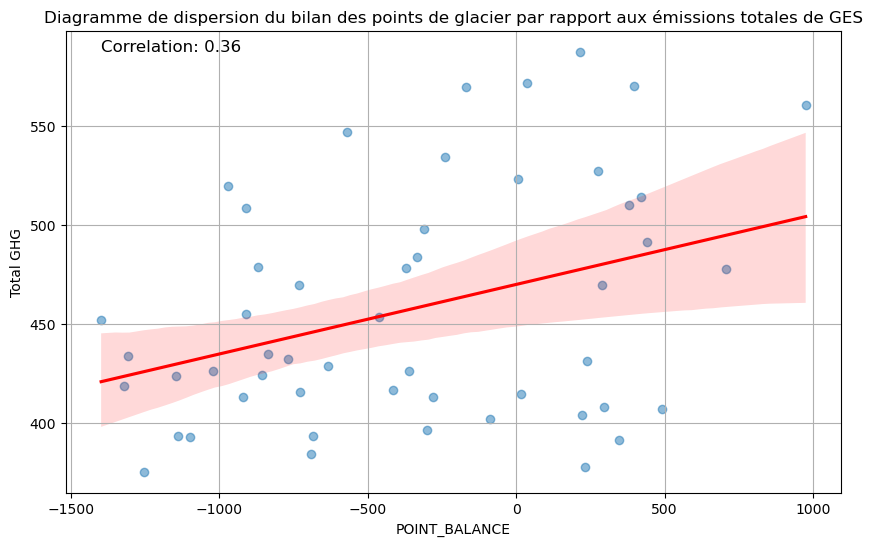

In [62]:
# Convertissez la colonne 'Total GHG' en numérique, utilisez error='coerce' pour définir une valeur non valide sur NaN
df_tempca['Total GHG'] = pd.to_numeric(df_tempca['Total GHG'], errors='coerce')

# Supprimez les lignes contenant NaN le cas échéant après la conversion
df_tempca= df_tempca.dropna(subset=['Total GHG'])

# Créer scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_tempca['POINT_BALANCE'], df_tempca['Total GHG'], alpha=0.5)

# calculer le coefficient de corrélation et l'afficher
correlation = df_tempca['POINT_BALANCE'].corr(df_tempca['Total GHG'])
plt.text(min(df_tempca['POINT_BALANCE']), max(df_tempca['Total GHG']), f'Correlation: {correlation:.2f}', fontsize=12)

# Mettre le titre pour le graphique
plt.title('Diagramme de dispersion du bilan des points de glacier par rapport aux émissions totales de GES')
#plt.xlabel('Glacier Point Balance')
#plt.ylabel('Total GHG Emissions')

# Calculer la droite de régression et sa région de confiance
sns.regplot(x=df_tempca['POINT_BALANCE'], y=df_tempca['Total GHG'], scatter=False, color='red')

# Afficher
plt.grid(True)
plt.show()

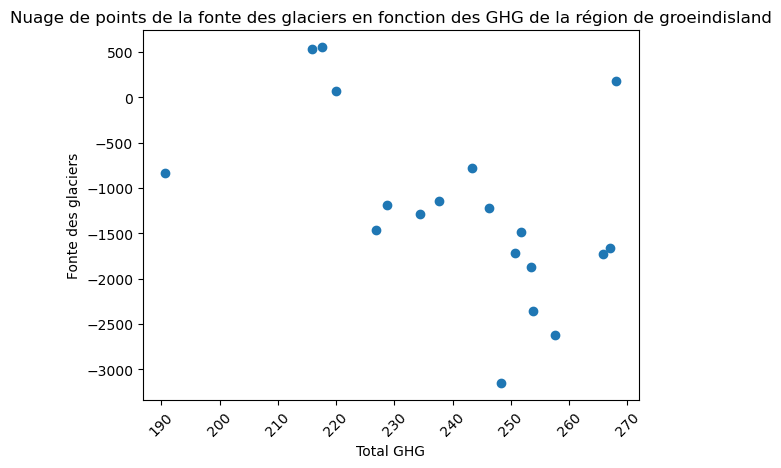

le score de la regression linéaire : 0.28617594472601393
KNeighborsRegressor : 0.5470108108846972
support vecteur machine : 0.29926994764004644
Arbre de décision : 1.0
Score du test de l'arbre de décision:-0.9622588738073663
le score de la cross validation : -1.460767088641806
Ridge regression : 0.2861759387482695
Lasso regression : 0.28617594265001045
Erreur quadratique moyenne : 859211.8988011386


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
#Essaie de prédire la fonte des glaciers en fonction du CO2 dans chaque région.
#commençons par la région du groenisland
X = df_tempy["Total GHG"]  
X = np.array(X).reshape(-1,1)
#print(X)

Y = np.array(df_tempy["POINT_BALANCE"]).reshape(-1,1)
#print(Y)

plt.scatter(X,Y)


# Ajouter des labels et un titre
plt.xlabel('Total GHG')
plt.ylabel('Fonte des glaciers')
plt.title('Nuage de points de la fonte des glaciers en fonction des GHG de la région de groeindisland')

plt.legend

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


model = LinearRegression()
model.fit(X_train,Y_train)
score1_groendisland = model.score(X_train,Y_train)

#essaie un autre modèle
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,Y_train)
score2_groendisland = model2.score(X_train,Y_train)

#Support vecteur machine
model3 = SVR(C=100)
model3.fit(X_train ,Y_train)
score3_groendisland = model3.score(X_train,Y_train)


#Arbre de décision pour la régression
model4 = DecisionTreeRegressor() 
model4.fit(X_train,Y_train)
score4_groendisland = model4.score(X_train,Y_train)


print("le score de la regression linéaire : " + str(score1_groendisland))
print("KNeighborsRegressor : " + str(score2_groendisland))
print("support vecteur machine : " + str(score3_groendisland))
print("Arbre de décision : " + str(score4_groendisland))

print("Score du test de l'arbre de décision:" + str(model4.score(X_test,Y_test)))

#On remarque alors que le modèle d'abre de décision a fait un overfitting car le score de test est très bas sachant que le score
#d'entraiment est égal à 1.Je vais donc éssayer une cross validation avec ce modèle.
scores_cross_validation = cross_val_score(model4, X_train, Y_train, cv=5)
print("le score de la cross validation : " + str(scores_cross_validation.mean()))

#ce modèle n'est pas adapté

#la Régression Ridge
model5 = model = Ridge(alpha=1.0)
model5.fit(X_train,Y_train)
score5_groendisland = model5.score(X_train,Y_train)

print("Ridge regression : " + str(score5_groendisland))

#Regression lasso
model6 = model = Lasso(alpha=1.0)
model6.fit(X_train,Y_train)
score6_groendisland= model6.score(X_train,Y_train)

print("Lasso regression : " + str(score6_groendisland))

#le meilleur modèle pour ce jeu de donnée est les k plus proche voisin 

Y_pred = model2.predict(X_test)
#print(Y_pred)

mse = mean_squared_error(Y_test, Y_pred)
print("Erreur quadratique moyenne :", mse)

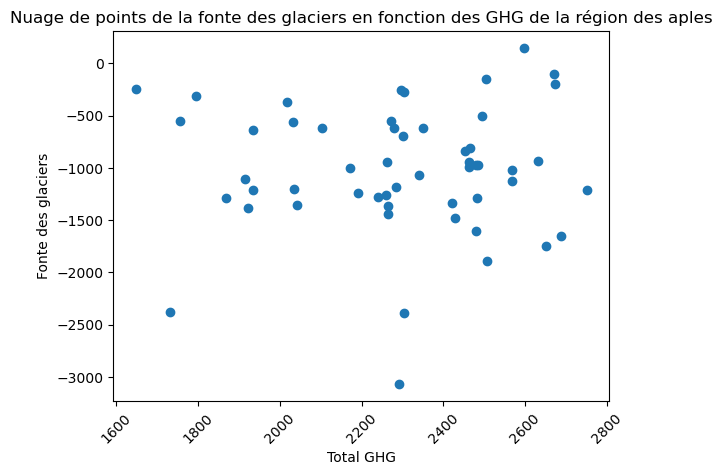

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


le score de la regression linéaire : 0.01799681869776315
KNeighborsRegressor : 0.12390553959905204
support vecteur machine : 0.034039679618052654
Arbre de décision : 1.0
Score du test de l'arbre de décision:-2.2057840404598568
le score de la cross validation : -2.1189466518552194
Ridge regression : 0.017996818697760486
Lasso regression : 0.017996818655782287


In [64]:
#region des alpes
X = df_tempal["Total GHG"]  
X = np.array(X).reshape(-1,1)
#print(X)

Y = np.array(df_tempal["POINT_BALANCE"]).reshape(-1,1)
#print(Y)

plt.scatter(X,Y)


# Ajouter des labels et un titre
plt.xlabel('Total GHG')
plt.ylabel('Fonte des glaciers')
plt.title('Nuage de points de la fonte des glaciers en fonction des GHG de la région des aples')

plt.legend

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


model = LinearRegression()
model.fit(X_train,Y_train)
score1_alpes = model.score(X_train,Y_train)

#essaie un autre modèle
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,Y_train)
score2_alpes = model2.score(X_train,Y_train)

#Support vecteur machine
model3 = SVR(C=100)
model3.fit(X_train ,Y_train)
score3_alpes = model3.score(X_train,Y_train)


#Arbre de décision pour la régression
model4 = DecisionTreeRegressor() 
model4.fit(X_train,Y_train)
score4_alpes = model4.score(X_train,Y_train)


print("le score de la regression linéaire : " + str(score1_alpes))
print("KNeighborsRegressor : " + str(score2_alpes))
print("support vecteur machine : " + str(score3_alpes))
print("Arbre de décision : " + str(score4_alpes))

print("Score du test de l'arbre de décision:" + str(model4.score(X_test,Y_test)))

#On remarque alors que le modèle d'abre de décision a fait un overfitting car le score de test est très bas sachant que le score
#d'entraiment est égal à 1.Je vais donc éssayer une cross validation avec ce modèle.
scores_cross_validation = cross_val_score(model4, X_train, Y_train, cv=5)
print("le score de la cross validation : " + str(scores_cross_validation.mean()))

#ce modèle n'est pas adapté

#la Régression Ridge
model5 = model = Ridge(alpha=1.0)
model5.fit(X_train,Y_train)
score5_alpes = model5.score(X_train,Y_train)

print("Ridge regression : " + str(score5_alpes))

#Regression lasso
model6 = model = Lasso(alpha=1.0)
model6.fit(X_train,Y_train)
score6_alpes= model6.score(X_train,Y_train)

print("Lasso regression : " + str(score6_alpes))

 #Auncun modèle n'est perfommant dans ce jeu de donnée , il faut peut-être penser à faire une ACP ou augmenter la dimenssion du X


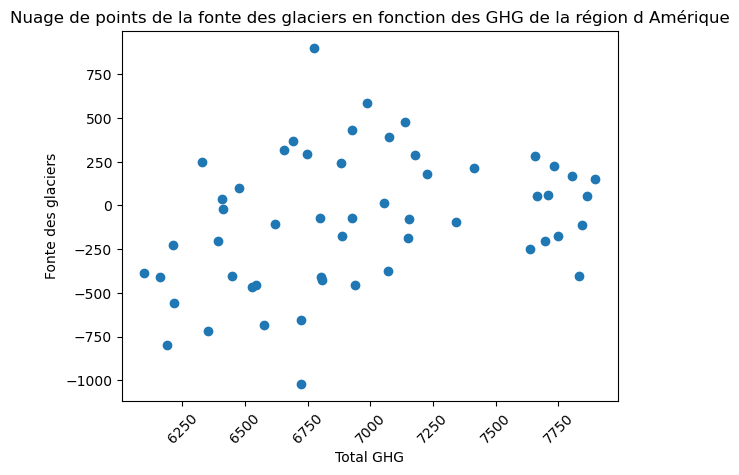

le score de la regression linéaire : 0.06895039637522637
KNeighborsRegressor : 0.09056335867307297
support vecteur machine : 0.10122476980680062
Arbre de décision : 1.0
Score du test de l'arbre de décision:-4.819599566708704
le score de la cross validation : -1.652703496021693
Ridge regression : 0.06895039637522582
Lasso regression : 0.0689503963544219
Erreur quadratique moyenne : 84677.50176483618


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
#Region d'amérique
X = df_tempam["Total GHG"]  
X = np.array(X).reshape(-1,1)
#print(X)

Y = np.array(df_tempam["POINT_BALANCE"]).reshape(-1,1)
#print(Y)

plt.scatter(X,Y)


# Ajouter des labels et un titre
plt.xlabel('Total GHG')
plt.ylabel('Fonte des glaciers')
plt.title('Nuage de points de la fonte des glaciers en fonction des GHG de la région d Amérique')

plt.legend

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


model = LinearRegression()
model.fit(X_train,Y_train)
score1_amerique = model.score(X_train,Y_train)

#essaie un autre modèle
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,Y_train)
score2_amerique = model2.score(X_train,Y_train)

#Support vecteur machine
model3 = SVR(C=100)
model3.fit(X_train ,Y_train)
score3_amerique = model3.score(X_train,Y_train)


#Arbre de décision pour la régression
model4 = DecisionTreeRegressor() 
model4.fit(X_train,Y_train)
score4_amerique = model4.score(X_train,Y_train)


print("le score de la regression linéaire : " + str(score1_amerique))
print("KNeighborsRegressor : " + str(score2_amerique))
print("support vecteur machine : " + str(score3_amerique))
print("Arbre de décision : " + str(score4_amerique))

print("Score du test de l'arbre de décision:" + str(model4.score(X_test,Y_test)))

#On remarque alors que le modèle d'abre de décision a fait un overfitting car le score de test est très bas sachant que le score
#d'entraiment est égal à 1.Je vais donc éssayer une cross validation avec ce modèle.
scores_cross_validation = cross_val_score(model4, X_train, Y_train, cv=5)
print("le score de la cross validation : " + str(scores_cross_validation.mean()))

#ce modèle n'est pas adapté

#la Régression Ridge
model5 = model = Ridge(alpha=1.0)
model5.fit(X_train,Y_train)
score5_amerique = model5.score(X_train,Y_train)

print("Ridge regression : " + str(score5_amerique))

#Regression lasso
model6 = model = Lasso(alpha=1.0)
model6.fit(X_train,Y_train)
score6_amerique= model6.score(X_train,Y_train)

print("Lasso regression : " + str(score6_amerique))

Y_pred =  model3.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Erreur quadratique moyenne :", mse)


 #le modele qui a un bon score parmis eux tous est le SVR mais ce score n'est pas assez suffisant pour un apprentissage

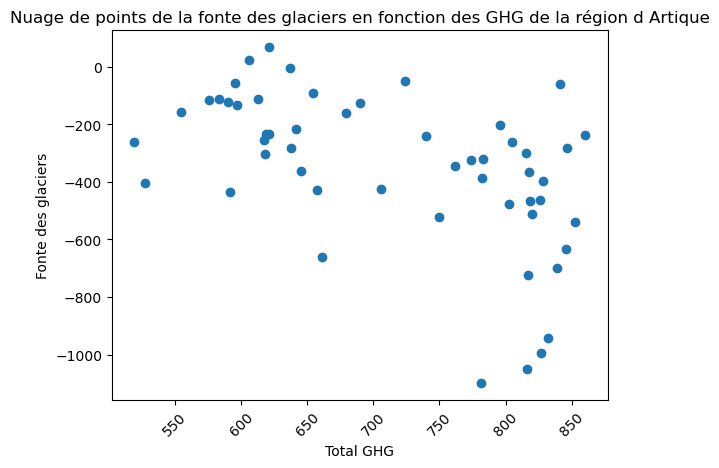

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


le score de la regression linéaire : 0.14422826411389977
KNeighborsRegressor : 0.3627876102908505
support vecteur machine : 0.18567420570558768
Arbre de décision : 1.0
Score du test de l'arbre de décision:-0.3992831353589412
le score de la cross validation : -2.5562610706721536
Ridge regression : 0.14422826411301715
Lasso regression : 0.1442282607394244


In [66]:
#En artique
X = df_tempar["Total GHG"]  
X = np.array(X).reshape(-1,1)
#print(X)

Y = np.array(df_tempar["POINT_BALANCE"]).reshape(-1,1)
#print(Y)

plt.scatter(X,Y)


# Ajouter des labels et un titre
plt.xlabel('Total GHG')
plt.ylabel('Fonte des glaciers')
plt.title('Nuage de points de la fonte des glaciers en fonction des GHG de la région d Artique')

plt.legend

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


model = LinearRegression()
model.fit(X_train,Y_train)
score1_artique = model.score(X_train,Y_train)

#essaie un autre modèle
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,Y_train)
score2_artique = model2.score(X_train,Y_train)

#Support vecteur machine
model3 = SVR(C=100)
model3.fit(X_train ,Y_train)
score3_artique = model3.score(X_train,Y_train)


#Arbre de décision pour la régression
model4 = DecisionTreeRegressor() 
model4.fit(X_train,Y_train)
score4_artique = model4.score(X_train,Y_train)


print("le score de la regression linéaire : " + str(score1_artique))
print("KNeighborsRegressor : " + str(score2_artique))
print("support vecteur machine : " + str(score3_artique))
print("Arbre de décision : " + str(score4_artique))

print("Score du test de l'arbre de décision:" + str(model4.score(X_test,Y_test)))

#On remarque alors que le modèle d'abre de décision a fait un overfitting car le score de test est très bas sachant que le score
#d'entraiment est égal à 1.Je vais donc éssayer une cross validation avec ce modèle.
scores_cross_validation = cross_val_score(model4, X_train, Y_train, cv=5)
print("le score de la cross validation : " + str(scores_cross_validation.mean()))

#ce modèle n'est pas adapté

#la Régression Ridge
model5 = model = Ridge(alpha=1.0)
model5.fit(X_train,Y_train)
score5_artique = model5.score(X_train,Y_train)

print("Ridge regression : " + str(score5_artique))

#Regression lasso
model6 = model = Lasso(alpha=1.0)
model6.fit(X_train,Y_train)
score6_artique= model6.score(X_train,Y_train)

print("Lasso regression : " + str(score6_artique))

 #le modele qui a un bon score parmis eux tous est les 5 plus proche voisin mais ce score n'est pas assez suffisant pour un apprentissage

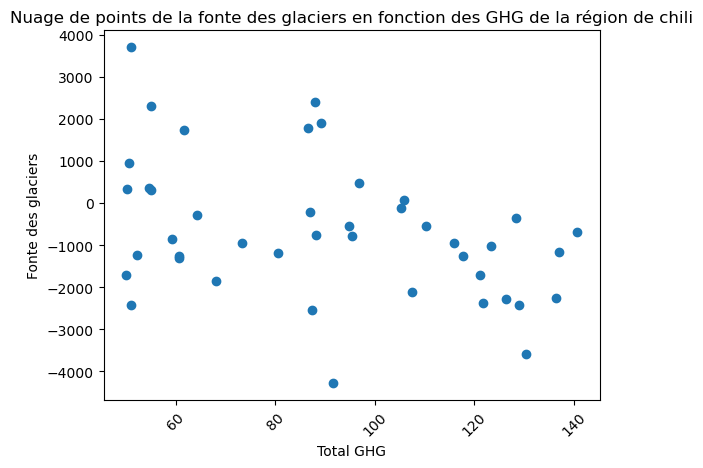

le score de la regression linéaire : 0.07990879710360654
KNeighborsRegressor : 0.09796945932268353
support vecteur machine : 0.035845060580407706
Arbre de décision : 1.0
Score du test de l'arbre de décision:-1.4336617592809509
le score de la cross validation : -1.6494331370265514
Ridge regression : 0.07990879699071252
Lasso regression : 0.07990879664037354
Erreur quadratique moyenne : 2407590.872727273


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
#Chili
X = df_tempcl["Total GHG"]  
X = np.array(X).reshape(-1,1)
#print(X)

Y = np.array(df_tempcl["POINT_BALANCE"]).reshape(-1,1)
#print(Y)

plt.scatter(X,Y)


# Ajouter des labels et un titre
plt.xlabel('Total GHG')
plt.ylabel('Fonte des glaciers')
plt.title('Nuage de points de la fonte des glaciers en fonction des GHG de la région de chili')

plt.legend

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


model = LinearRegression()
model.fit(X_train,Y_train)
score1_chili = model.score(X_train,Y_train)

#essaie un autre modèle
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,Y_train)
score2_chili = model2.score(X_train,Y_train)

#Support vecteur machine
model3 = SVR(C=100)
model3.fit(X_train ,Y_train)
score3_chili = model3.score(X_train,Y_train)


#Arbre de décision pour la régression
model4 = DecisionTreeRegressor() 
model4.fit(X_train,Y_train)
score4_chili = model4.score(X_train,Y_train)


print("le score de la regression linéaire : " + str(score1_chili))
print("KNeighborsRegressor : " + str(score2_chili))
print("support vecteur machine : " + str(score3_chili))
print("Arbre de décision : " + str(score4_chili))

print("Score du test de l'arbre de décision:" + str(model4.score(X_test,Y_test)))

#On remarque alors que le modèle d'abre de décision a fait un overfitting car le score de test est très bas sachant que le score
#d'entraiment est égal à 1.Je vais donc éssayer une cross validation avec ce modèle.
scores_cross_validation = cross_val_score(model4, X_train, Y_train, cv=5)
print("le score de la cross validation : " + str(scores_cross_validation.mean()))

#ce modèle n'est pas adapté

#la Régression Ridge
model5 = model = Ridge(alpha=1.0)
model5.fit(X_train,Y_train)
score5_chili = model5.score(X_train,Y_train)

print("Ridge regression : " + str(score5_chili))

#Regression lasso
model6 = model = Lasso(alpha=1.0)
model6.fit(X_train,Y_train)
score6_chili= model6.score(X_train,Y_train)

print("Lasso regression : " + str(score6_chili))

Y_pred = model2.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Erreur quadratique moyenne :", mse)
 #le modele qui a un bon score parmis eux tous est les 5 plus proche voisin mais ce score n'est pas assez suffisant pour un apprentissage

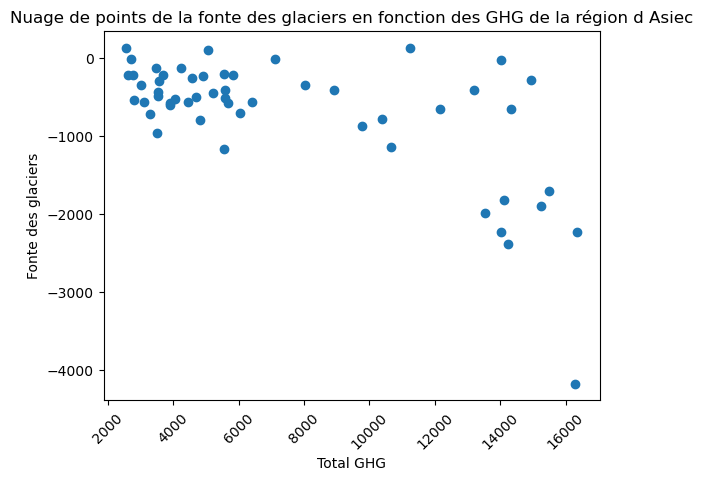

le score de la regression linéaire : 0.5506123835159772
KNeighborsRegressor : 0.6690707132449233
support vecteur machine : 0.3510040600784762
Arbre de décision : 1.0
Score du test de l'arbre de décision:-1.8424864253051418
le score de la cross validation : -0.15039836788930905
Ridge regression : 0.5506123835159772
Lasso regression : 0.5506123835159101
Erreur quadratique moyenne : 527526.3251131469


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
#Asiec
X = df_tempac["Total GHG"]  
X = np.array(X).reshape(-1,1)
#print(X)

Y = np.array(df_tempac["POINT_BALANCE"]).reshape(-1,1)
#print(Y)

plt.scatter(X,Y)


# Ajouter des labels et un titre
plt.xlabel('Total GHG')
plt.ylabel('Fonte des glaciers')
plt.title('Nuage de points de la fonte des glaciers en fonction des GHG de la région d Asiec')

plt.legend

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


model = LinearRegression()
model.fit(X_train,Y_train)
score1_asiec = model.score(X_train,Y_train)

#essaie un autre modèle
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,Y_train)
score2_asiec = model2.score(X_train,Y_train)

#Support vecteur machine
model3 = SVR(C=100)
model3.fit(X_train ,Y_train)
score3_asiec = model3.score(X_train,Y_train)


#Arbre de décision pour la régression
model4 = DecisionTreeRegressor() 
model4.fit(X_train,Y_train)
score4_asiec = model4.score(X_train,Y_train)


print("le score de la regression linéaire : " + str(score1_asiec))
print("KNeighborsRegressor : " + str(score2_asiec))
print("support vecteur machine : " + str(score3_asiec))
print("Arbre de décision : " + str(score4_asiec))

print("Score du test de l'arbre de décision:" + str(model4.score(X_test,Y_test)))

#On remarque alors que le modèle d'abre de décision a fait un overfitting car le score de test est très bas sachant que le score
#d'entraiment est égal à 1.Je vais donc éssayer une cross validation avec ce modèle.
scores_cross_validation = cross_val_score(model4, X_train, Y_train, cv=5)
print("le score de la cross validation : " + str(scores_cross_validation.mean()))

#ce modèle n'est pas adapté

#la Régression Ridge
model5 = model = Ridge(alpha=1.0)
model5.fit(X_train,Y_train)
score5_asiec = model5.score(X_train,Y_train)

print("Ridge regression : " + str(score5_asiec))

#Regression lasso
model6 = model = Lasso(alpha=1.0)
model6.fit(X_train,Y_train)
score6_asiec= model6.score(X_train,Y_train)

print("Lasso regression : " + str(score6_asiec))

Y_pred = model2.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(Y_test, Y_pred)
print("Erreur quadratique moyenne :", mse)

#le modele qui a un bon score parmis eux tous est les 5 plus proche voisin mais ce score n'est pas assez suffisant pour un apprentissage

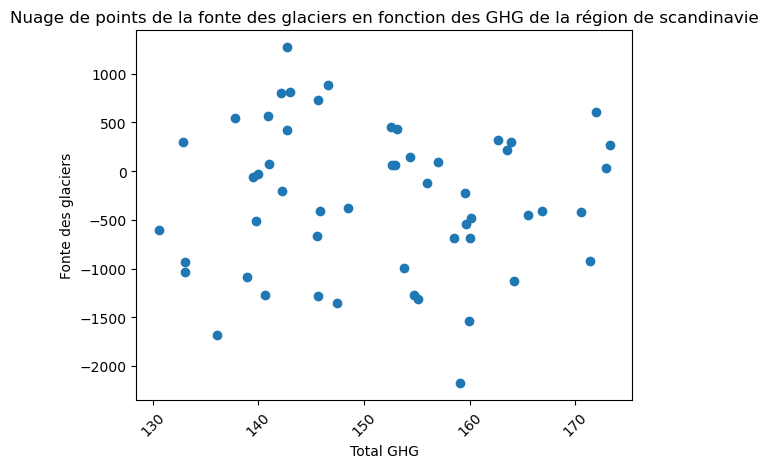

le score de la regression linéaire : 0.0002755590131993113
KNeighborsRegressor : 0.2816328231982511
support vecteur machine : 0.022991973398464594
Arbre de décision : 1.0
Score du test de l'arbre de décision:-0.20899529210866885
le score de la cross validation : -1.3037010881170712
Ridge regression : 0.00027555900352616014
Lasso regression : 0.0002755429555092448
Erreur quadratique moyenne : 754291.4576587742


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
#scandinavie
X = df_tempsc["Total GHG"]  
X = np.array(X).reshape(-1,1)
#print(X)

Y = np.array(df_tempsc["POINT_BALANCE"]).reshape(-1,1)
#print(Y)

plt.scatter(X,Y)


# Ajouter des labels et un titre
plt.xlabel('Total GHG')
plt.ylabel('Fonte des glaciers')
plt.title('Nuage de points de la fonte des glaciers en fonction des GHG de la région de scandinavie')

plt.legend

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


model = LinearRegression()
model.fit(X_train,Y_train)
score1_scand = model.score(X_train,Y_train)

#essaie un autre modèle
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,Y_train)
score2_scand = model2.score(X_train,Y_train)

#Support vecteur machine
model3 = SVR(C=100)
model3.fit(X_train ,Y_train)
score3_scand = model3.score(X_train,Y_train)


#Arbre de décision pour la régression
model4 = DecisionTreeRegressor() 
model4.fit(X_train,Y_train)
score4_scand = model4.score(X_train,Y_train)


print("le score de la regression linéaire : " + str(score1_scand))
print("KNeighborsRegressor : " + str(score2_scand))
print("support vecteur machine : " + str(score3_scand))
print("Arbre de décision : " + str(score4_scand))

print("Score du test de l'arbre de décision:" + str(model4.score(X_test,Y_test)))

#On remarque alors que le modèle d'abre de décision a fait un overfitting car le score de test est très bas sachant que le score
#d'entraiment est égal à 1.Je vais donc éssayer une cross validation avec ce modèle.
scores_cross_validation = cross_val_score(model4, X_train, Y_train, cv=5)
print("le score de la cross validation : " + str(scores_cross_validation.mean()))

#ce modèle n'est pas adapté

#la Régression Ridge
model5 = model = Ridge(alpha=1.0)
model5.fit(X_train,Y_train)
score5_scand = model5.score(X_train,Y_train)

print("Ridge regression : " + str(score5_scand))

#Regression lasso
model6 = model = Lasso(alpha=1.0)
model6.fit(X_train,Y_train)
score6_scand= model6.score(X_train,Y_train)

print("Lasso regression : " + str(score6_scand))

Y_pred = model2.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(Y_test, Y_pred)
print("Erreur quadratique moyenne :", mse)

#le modele qui a un bon score parmis eux tous est les 5 plus proche voisin mais ce score n'est pas assez suffisant pour un apprentissage

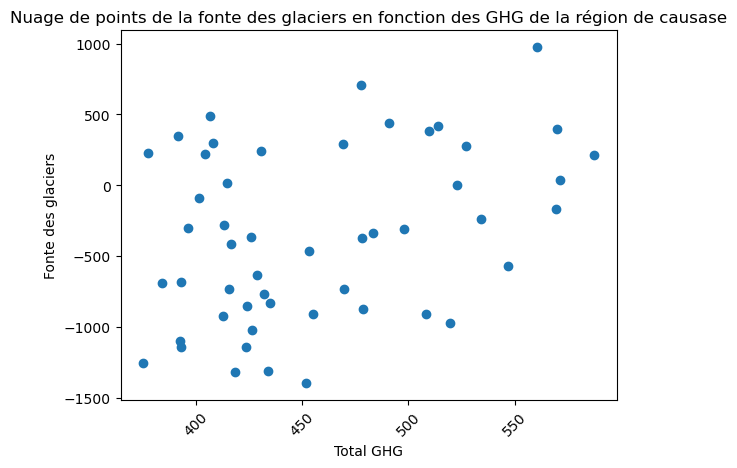

le score de la regression linéaire : 0.055463356937222374
KNeighborsRegressor : 0.334570596991402
support vecteur machine : 0.076576156376157
Arbre de décision : 1.0
Score du test de l'arbre de décision:-0.43206826379808705
le score de la cross validation : -1.6729252328761501
Ridge regression : 0.05546335693340343
Lasso regression : 0.05546335605398378
Erreur quadratique moyenne : 279317.7684615384


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
#causase
X = df_tempca["Total GHG"]  
X = np.array(X).reshape(-1,1)
#print(X)

Y = np.array(df_tempca["POINT_BALANCE"]).reshape(-1,1)
#print(Y)

plt.scatter(X,Y)


# Ajouter des labels et un titre
plt.xlabel('Total GHG')
plt.ylabel('Fonte des glaciers')
plt.title('Nuage de points de la fonte des glaciers en fonction des GHG de la région de causase')

plt.legend

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


model = LinearRegression()
model.fit(X_train,Y_train)
score1_causase = model.score(X_train,Y_train)

#essaie un autre modèle
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,Y_train)
score2_causase = model2.score(X_train,Y_train)

#Support vecteur machine
model3 = SVR(C=100)
model3.fit(X_train ,Y_train)
score3_causase = model3.score(X_train,Y_train)


#Arbre de décision pour la régression
model4 = DecisionTreeRegressor() 
model4.fit(X_train,Y_train)
score4_causase = model4.score(X_train,Y_train)


print("le score de la regression linéaire : " + str(score1_causase))
print("KNeighborsRegressor : " + str(score2_causase))
print("support vecteur machine : " + str(score3_causase))
print("Arbre de décision : " + str(score4_causase))

print("Score du test de l'arbre de décision:" + str(model4.score(X_test,Y_test)))

#On remarque alors que le modèle d'abre de décision a fait un overfitting car le score de test est très bas sachant que le score
#d'entraiment est égal à 1.Je vais donc éssayer une cross validation avec ce modèle.
scores_cross_validation = cross_val_score(model4, X_train, Y_train, cv=5)
print("le score de la cross validation : " + str(scores_cross_validation.mean()))

#ce modèle n'est pas adapté

#la Régression Ridge
model5 = model = Ridge(alpha=1.0)
model5.fit(X_train,Y_train)
score5_causase = model5.score(X_train,Y_train)

print("Ridge regression : " + str(score5_causase))

#Regression lasso
model6 = model = Lasso(alpha=1.0)
model6.fit(X_train,Y_train)
score6_causase= model6.score(X_train,Y_train)

print("Lasso regression : " + str(score6_causase))

Y_pred = model2.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(Y_test, Y_pred)
print("Erreur quadratique moyenne :", mse)

#le modele qui a un bon score parmis eux tous est les 5 plus proche voisin mais ce score n'est pas assez suffisant pour un apprentissage

In [71]:
Region =['Groendisland','Alpes','Amerique','Chili','Asiec','scandinavie','causase','Artique']
Score_Regression = [score1_groendisland,score1_alpes,score1_amerique,score1_chili,score1_asiec,score1_scand,score1_causase,score1_artique]
Score_KNeighborsRegressor = [score2_groendisland,score2_alpes,score2_amerique,score2_chili,score2_asiec,score2_scand,score2_causase,score2_artique]
Score_SVR = [score3_groendisland,score3_alpes,score3_amerique,score3_chili,score3_asiec,score3_scand,score3_causase,score3_artique]
Score_Abre_decision = [score4_groendisland,score4_alpes,score4_amerique,score4_chili,score4_asiec,score4_scand,score4_causase,score4_artique]
Score_Ridge_Regression = [score5_groendisland,score5_alpes,score5_amerique,score5_chili,score5_asiec,score5_scand,score5_causase,score5_artique]
Score_lasso_Regression = [score6_groendisland,score6_alpes,score6_amerique,score6_chili,score6_asiec,score6_scand,score6_causase,score6_artique]
df_result_pred = pd.DataFrame({"Region": Region,
                               "Regression lineaire":Score_Regression,
                               "Les k voisin les plus proches":Score_KNeighborsRegressor,
                               "Support vecteur machine":Score_SVR,
                               "Abre de décision":Score_Abre_decision,
                               "Ridge Regression":Score_Ridge_Regression,
                               "Regression lasso":Score_lasso_Regression
                              })
df_result_pred


Region  Regression lineaire  Les k voisin les plus proches  \
0  Groendisland             0.286176                       0.547011   
1         Alpes             0.017997                       0.123906   
2      Amerique             0.068950                       0.090563   
3         Chili             0.079909                       0.097969   
4         Asiec             0.550612                       0.669071   
5   scandinavie             0.000276                       0.281633   
6       causase             0.055463                       0.334571   
7       Artique             0.144228                       0.362788   

   Support vecteur machine  Abre de décision  Ridge Regression  \
0                 0.299270               1.0          0.286176   
1                 0.034040               1.0          0.017997   
2                 0.101225               1.0          0.068950   
3                 0.035845               1.0          0.079909   
4                 0.351004               1.0          0.550612   
5                 0.022992               1.0          0.000276   
6                 0.076576               1.0          0.055463   
7                 0.185674               1.0          0.144228   

   Regression lasso  
0          0.286176  
1          0.017997  
2          0.068950  
3          0.079909  
4          0.550612  
5          0.000276  
6          0.055463  
7          0.144228

<span style="color:green">
 On remarque que dans l'ensemble, nos données n'ont pas un bon score quelque soit le moèle utiliser ce qui veut dire que la corrélation entre la fonte des glaciers et le CO2 est relativement faible. Il faut peut être ajouter d'autre caractéristique tel que la hauteur, la température...

In [72]:
df_glacier_PCA = pd.read_csv('mass_balance_point.csv')
df_glacier_PCA = df_glacier_PCA[['NAME','YEAR','POINT_ELEVATION','POINT_BALANCE','POINT_LAT','POINT_LON']]


In [73]:
df_glacierww_pca = pd.read_csv('Glacier_ww.csv',skiprows = 8, encoding='latin-1')
df_glacierww_pca = df_glacierww_pca[['NAME','GEOREG1','SURVEY_YEAR','ELA','ANNUAL_BALANCE','LATITUDE','LONGITUDE']]


In [74]:
df_alpes_pca = df_glacier_PCA[(df_glacier_PCA['NAME'] == 'SILVRETTA') | (df_glacier_PCA['NAME'] == 'ALLALIN' ) | (df_glacier_PCA['NAME'] == 'CLARIDENFIRN' ) | (df_glacier_PCA['NAME'] == 'GIETRO' ) | (df_glacier_PCA['NAME'] == 'GRIES' ) | (df_glacier_PCA['NAME'] == 'GROSSER ALETSCH' ) | (df_glacier_PCA['NAME'] == 'HOHLAUB' ) | (df_glacier_PCA['NAME'] == 'RHONE' ) | (df_glacier_PCA['NAME'] == 'SCHWARZBERG' ) | (df_glacier_PCA['NAME'] == 'SILVRETTA' ) | (df_glacier_PCA['NAME'] == 'CORBASSIERE' ) ]
df_alpes_pca2 = df_glacierww_pca[(df_glacierww_pca['GEOREG1'] == 'Central Europe')]
df_alpes_pca2 = df_alpes_pca2.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_alpes_pca2 = df_alpes_pca2.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_alpes_pca = df_alpes_pca.rename(columns = {'POINT_LAT' : 'LATITUDE'})
df_alpes_pca = df_alpes_pca.rename(columns = {'POINT_LON' : 'LONGITUDE'})
df_alpes_pca2 = df_alpes_pca2.rename(columns = {'ELA' : 'POINT_ELEVATION'})
df_alpes_pca = pd.concat([df_alpes_pca,df_alpes_pca2])
df_alpes_pca = df_alpes_pca[['YEAR','POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df_alpes_pca = df_alpes_pca.dropna()
df_alpes_pca['POINT_ELEVATION'] = df_alpes_pca['POINT_ELEVATION'].astype(str)
df_alpes_pca['POINT_ELEVATION'] = df_alpes_pca['POINT_ELEVATION'].str.replace('>', '')
df_alpes_pca['POINT_ELEVATION'] = df_alpes_pca['POINT_ELEVATION'].str.replace('<', '')


In [75]:
df_amerique_pca = df_glacier_PCA[(df_glacier_PCA['NAME'] == 'BLACK RAPIDS') | (df_glacier_PCA['NAME'] == 'COLUMBIA' ) | (df_glacier_PCA['NAME'] == 'GULKANA' ) | (df_glacier_PCA['NAME'] == 'LEMON CREEK' ) | (df_glacier_PCA['NAME'] == 'SOUTH CASCADE' ) | (df_glacier_PCA['NAME'] == 'TAKU' ) | (df_glacier_PCA['NAME'] == 'WOLVERINE' )|(df_glacier_PCA['NAME'] == 'WHITE') ]
df_ameriqueww_pca2 = df_glacierww_pca[df_glacierww_pca['GEOREG1'] == 'Western Canada and USA' ]
df_ameriqueww_pca2 = df_ameriqueww_pca2.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_ameriqueww_pca2 = df_ameriqueww_pca2.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_ameriqueww_pca = df_amerique_pca.rename(columns = {'POINT_LAT' : 'LATITUDE'})
df_ameriqueww_pca = df_amerique_pca.rename(columns = {'POINT_LON' : 'LONGITUDE'})
df_ameriqueww_pca2 = df_ameriqueww_pca2.rename(columns = {'ELA' : 'POINT_ELEVATION'})
df_amerique_pca = pd.concat([df_amerique,df_ameriqueww_pca2])
df_amerique_pca = df_amerique_pca[['YEAR','POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df_amerique_pca['LATITUDE'] = df_amerique_pca['LATITUDE'].fillna(method = 'bfill')
df_amerique_pca['LONGITUDE'] = df_amerique_pca['LONGITUDE'].fillna(method = 'bfill')

df_amerique_pca = df_amerique_pca.dropna()
df_amerique_pca['POINT_ELEVATION'] = df_amerique_pca['POINT_ELEVATION'].astype(str)
df_amerique_pca['POINT_ELEVATION'] = df_amerique_pca['POINT_ELEVATION'].str.replace('>', '')
df_amerique_pca['POINT_ELEVATION'] = df_amerique_pca['POINT_ELEVATION'].str.replace('<', '')

In [76]:
df_groenisland_pca = df_glacier_PCA[(df_glacier_PCA['NAME'] == 'FREYA') | (df_glacier_PCA['NAME'] == 'MITTIVAKKAT' ) | (df_glacier_PCA['NAME'] == 'HOFSJOESKULL E' ) | (df_glacier_PCA['NAME'] == 'HOFSJOESKULL SW' ) | (df_glacier_PCA['NAME'] == 'HOFSJOESKULL N' ) ]
df_groenisland_pca = df_groenisland_pca.rename(columns = {'POINT_LAT' : 'LATITUDE'})
df_groenisland_pca = df_groenisland_pca.rename(columns = {'POINT_LON' : 'LONGITUDE'})
df_groenisland_pca = df_groenisland_pca[['YEAR','POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df_groenisland_pca = df_groenisland_pca.dropna()

In [77]:
df_asie_centrale_pca = df_glacier_PCA[(df_glacier_PCA['NAME'] == 'ABRAMOV' )]
df_asie_centraleww_pca = df_glacierww_pca[df_glacierww_pca['GEOREG1'] == 'Asia, Central']
df_asie_centraleww_pca = df_asie_centraleww_pca.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_asie_centraleww_pca = df_asie_centraleww_pca.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_asie_centrale_pca = df_asie_centrale_pca.rename(columns = {'POINT_LAT' : 'LATITUDE'})
df_asie_centrale_pca = df_asie_centrale_pca.rename(columns = {'POINT_LON' : 'LONGITUDE'})
df_asie_centraleww_pca = df_asie_centraleww_pca.rename(columns = {'ELA' : 'POINT_ELEVATION'})
df_asie_centrale_pca = pd.concat([df_asie_centrale_pca,df_asie_centraleww_pca])
df_asie_centrale_pca = df_asie_centrale_pca[['YEAR','POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df_asie_centrale_pca = df_asie_centrale_pca.dropna()
df_asie_centrale_pca['POINT_ELEVATION'] = df_asie_centrale_pca['POINT_ELEVATION'].astype(str)
df_asie_centrale_pca['POINT_ELEVATION'] = df_asie_centrale_pca['POINT_ELEVATION'].str.replace('>', '')
df_asie_centrale_pca['POINT_ELEVATION'] = df_asie_centrale_pca['POINT_ELEVATION'].str.replace('<', '')

In [78]:
df_glacier_scandinavie_pca = df_glacierww_pca[(df_glacierww_pca['GEOREG1'] == 'Scandinavia' )]
df_glacier_scandinavie_pca = df_glacier_scandinavie_pca.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_glacier_scandinavie_pca = df_glacier_scandinavie_pca.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_scandinavie_pca = df_glacier_scandinavie_pca.rename(columns = {'ELA' : 'POINT_ELEVATION'})
df_glacier_scandinavie_pca = df_glacier_scandinavie_pca[['YEAR','POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df_glacier_scandinavie_pca = df_glacier_scandinavie_pca.dropna()
df_glacier_scandinavie_pca['POINT_ELEVATION'] = df_glacier_scandinavie_pca['POINT_ELEVATION'].astype(str)
df_glacier_scandinavie_pca['POINT_ELEVATION'] = df_glacier_scandinavie_pca['POINT_ELEVATION'].str.replace('>', '')
df_glacier_scandinavie_pca['POINT_ELEVATION'] = df_glacier_scandinavie_pca['POINT_ELEVATION'].str.replace('<', '')

In [79]:
df_glacier_artique_pca = df_glacierww_pca[(df_glacierww_pca['GEOREG1'] == 'Svalbard and Jan Mayen' ) | (df_glacierww_pca['GEOREG1'] == 'Arctic Canada, North' )]
df_glacier_artique_pca = df_glacier_artique_pca.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_glacier_artique_pca = df_glacier_artique_pca.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_artique_pca = df_glacier_artique_pca.rename(columns = {'ELA' : 'POINT_ELEVATION'})
df_glacier_artique_pca = df_glacier_artique_pca[['YEAR','POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df_glacier_artique_pca = df_glacier_artique_pca.dropna()
df_glacier_artique_pca['POINT_ELEVATION'] = df_glacier_artique_pca['POINT_ELEVATION'].astype(str)
df_glacier_artique_pca['POINT_ELEVATION'] = df_glacier_artique_pca['POINT_ELEVATION'].str.replace('>', '')
df_glacier_artique_pca['POINT_ELEVATION'] = df_glacier_artique_pca['POINT_ELEVATION'].str.replace('<', '')

In [80]:

df_glacier_chili_pca = df_glacierww_pca[(df_glacierww_pca['GEOREG1'] == 'Southern Andes' )]
df_glacier_chili_pca = df_glacier_chili_pca.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_glacier_chili_pca = df_glacier_chili_pca.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_chili_pca = df_glacier_chili_pca.rename(columns = {'ELA' : 'POINT_ELEVATION'})
df_glacier_chili_pca = df_glacier_chili_pca[['YEAR','POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]

df_glacier_chili_pca['POINT_ELEVATION'] = df_glacier_chili_pca['POINT_ELEVATION'].astype(str)
df_glacier_chili_pca['POINT_ELEVATION'] = df_glacier_chili_pca['POINT_ELEVATION'].str.replace('>', '')
df_glacier_chili_pca['POINT_ELEVATION'] = df_glacier_chili_pca['POINT_ELEVATION'].str.replace('<', '')
df_glacier_chili_pca['POINT_ELEVATION'] = 3885 #elevation 2023
df_glacier_chili_pca = df_glacier_chili_pca.dropna()



In [81]:
df_glacier_caucase_pca = df_glacierww_pca[(df_glacierww_pca['GEOREG1'] == 'Caucasus and Middle East' )]
df_glacier_caucase_pca = df_glacier_caucase_pca.rename(columns = {'SURVEY_YEAR' : 'YEAR'})
df_glacier_caucase_pca = df_glacier_caucase_pca.rename(columns = {'ANNUAL_BALANCE' : 'POINT_BALANCE'})
df_glacier_caucase_pca = df_glacier_caucase_pca.rename(columns = {'ELA' : 'POINT_ELEVATION'})
df_glacier_caucase_pca = df_glacier_caucase_pca[['YEAR','POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df_glacier_caucase_pca = df_glacier_caucase_pca.dropna()

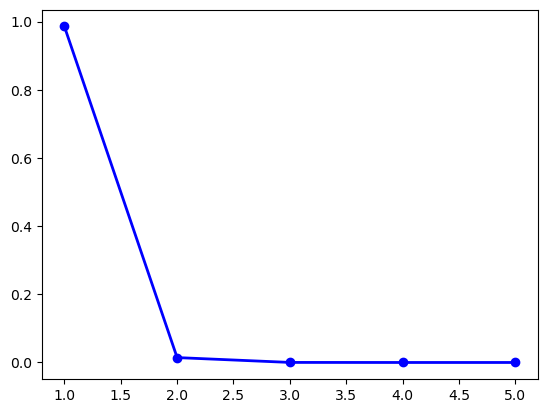

In [82]:
pca = PCA(n_components=5)
pca_fit = pca.fit(df_alpes_pca)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

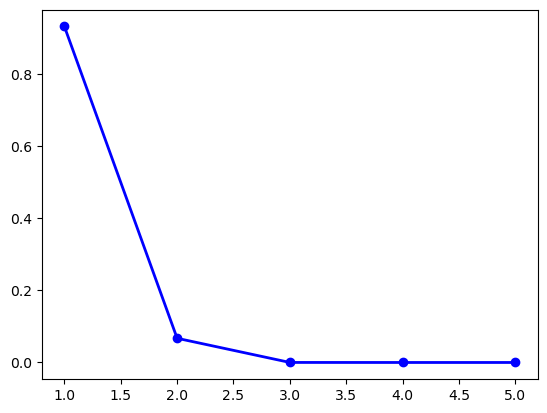

In [83]:
pca = PCA(n_components=5)
pca_fit = pca.fit(df_amerique_pca)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

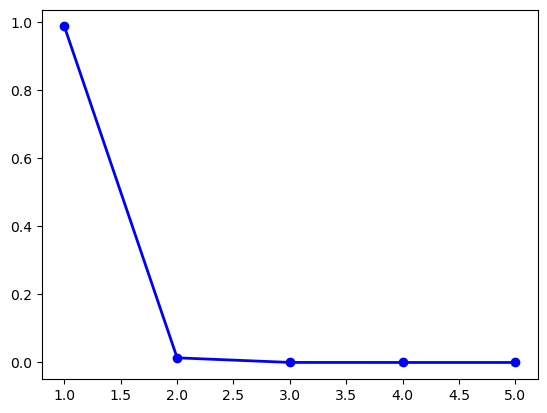

In [84]:
pca = PCA(n_components=5)
pca_fit = pca.fit(df_groenisland_pca)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

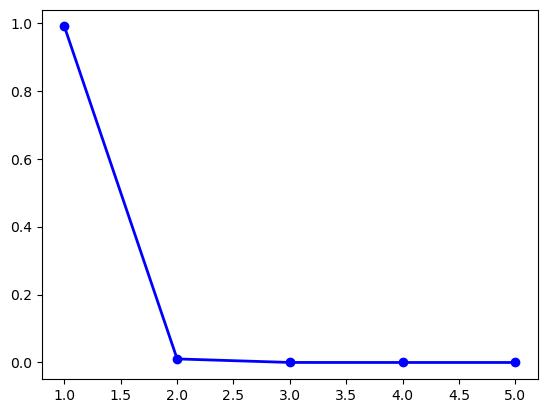

In [85]:
pca = PCA(n_components=5)
pca_fit = pca.fit(df_asie_centrale_pca)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

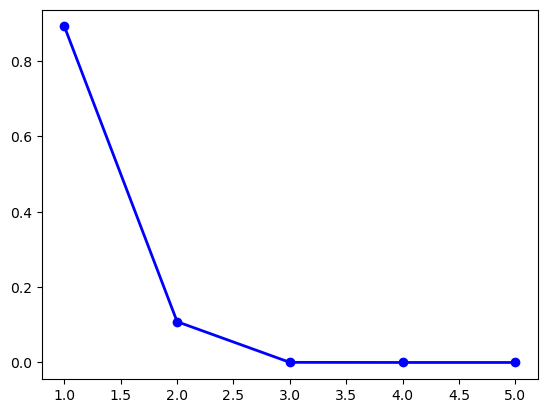

In [86]:
pca = PCA(n_components=5)
pca_fit = pca.fit(df_glacier_scandinavie_pca)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

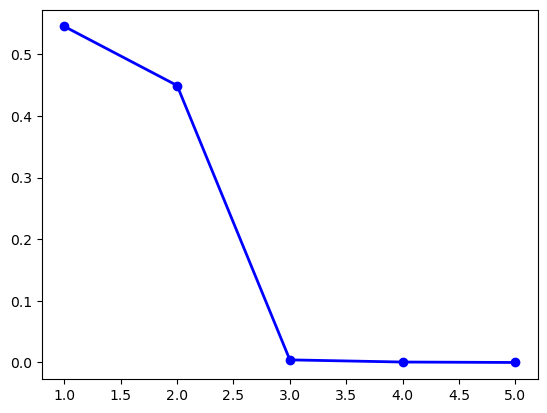

In [87]:
pca = PCA(n_components=5)
pca_fit = pca.fit(df_glacier_artique_pca)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

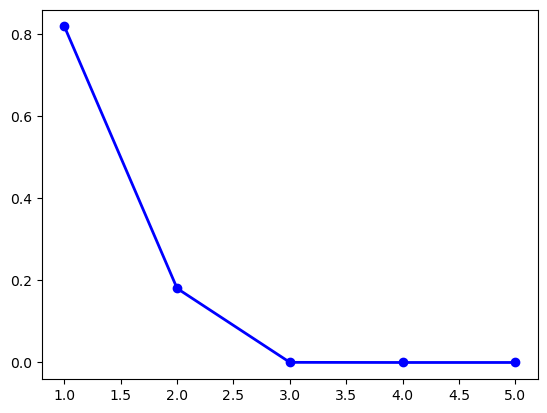

In [88]:
pca = PCA(n_components=5)
pca_fit = pca.fit(df_glacier_caucase_pca)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')


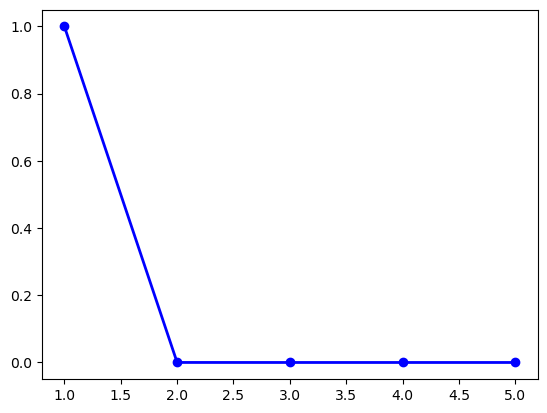

In [89]:
pca = PCA(n_components=5)
pca_fit = pca.fit(df_glacier_chili_pca)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

In [90]:
pca = PCA(n_components=2)
pca.fit(df_alpes_pca)
PCA(copy=True, n_components=2, whiten=False)
x_pca = pca.transform(df_alpes_pca)
df_tempca.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_alpes_pca['POINT_BALANCE'],cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

Text(0, 0.5, 'Deuxième composante principale')

Text(0, 0.5, 'Deuxième composante principale')

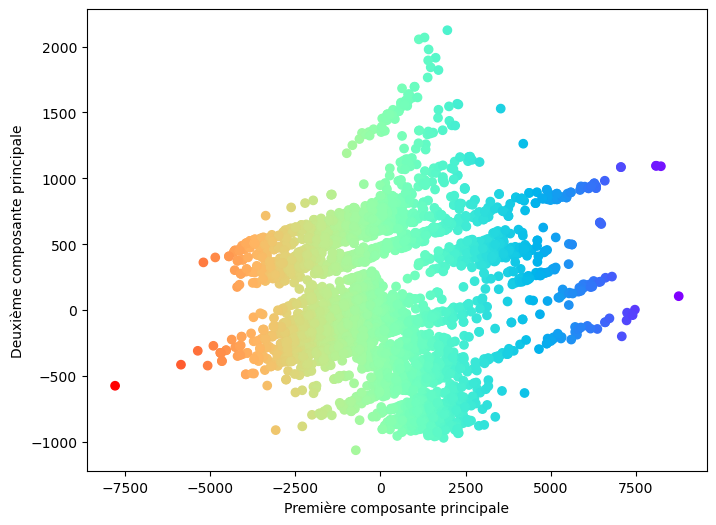

In [91]:
pca = PCA(n_components=2)
pca.fit(df_amerique_pca)
PCA(copy=True, n_components=2, whiten=False)
x_pca = pca.transform(df_amerique_pca)
df_tempca.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_amerique_pca['POINT_BALANCE'],cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

Text(0, 0.5, 'Deuxième composante principale')

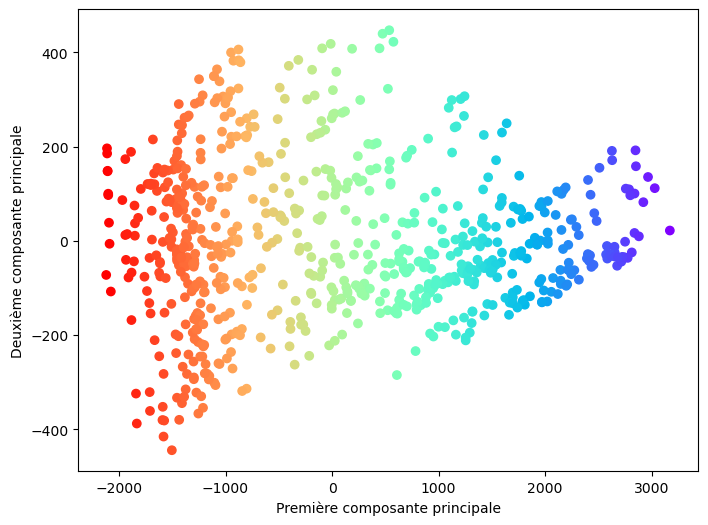

In [92]:
pca = PCA(n_components=5)
pca.fit(df_groenisland_pca)
PCA(copy=True, n_components=5, whiten=False)
x_pca = pca.transform(df_groenisland_pca)
df_tempca.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_groenisland_pca['POINT_BALANCE'],cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

Text(0, 0.5, 'Deuxième composante principale')

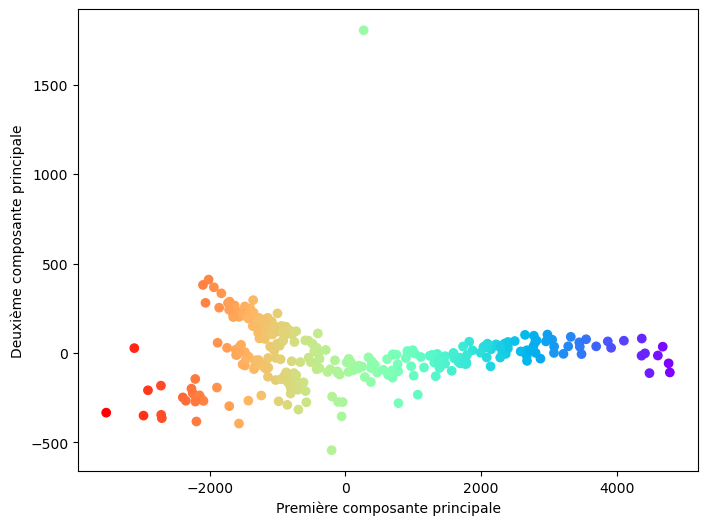

In [93]:
pca = PCA(n_components=5)
pca.fit(df_asie_centrale_pca)
PCA(copy=True, n_components=5, whiten=False)
x_pca = pca.transform(df_asie_centrale_pca)
df_tempca.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_asie_centrale_pca['POINT_BALANCE'],cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

Text(0, 0.5, 'Deuxième composante principale')

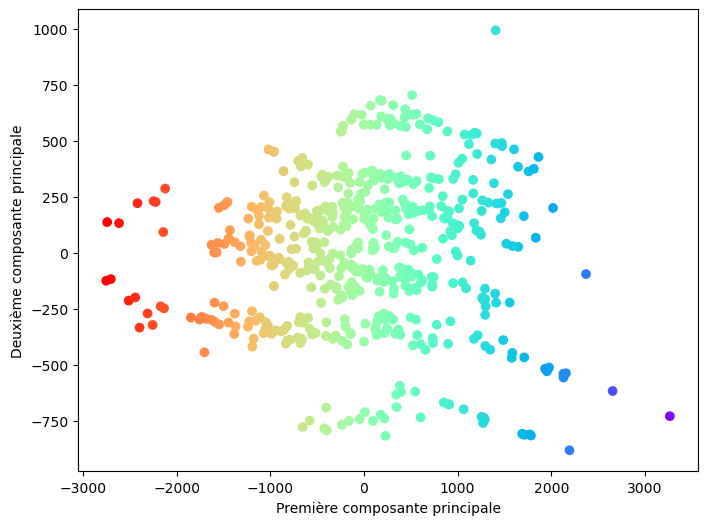

In [94]:
pca = PCA(n_components=5)
pca.fit(df_glacier_scandinavie_pca)
PCA(copy=True, n_components=5, whiten=False)
x_pca = pca.transform(df_glacier_scandinavie_pca)
df_tempca.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_glacier_scandinavie_pca['POINT_BALANCE'],cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

Text(0, 0.5, 'Deuxième composante principale')

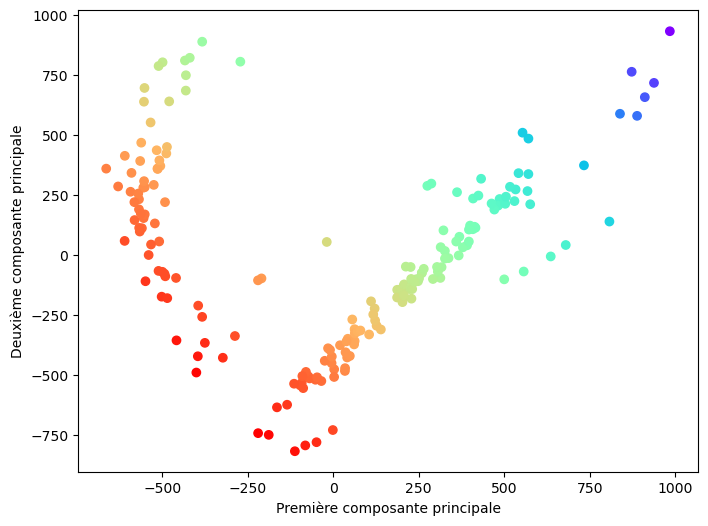

In [95]:
pca = PCA(n_components=5)
pca.fit(df_glacier_artique_pca)
PCA(copy=True, n_components=5, whiten=False)
x_pca = pca.transform(df_glacier_artique_pca)
df_tempca.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_glacier_artique_pca['POINT_BALANCE'],cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

In [96]:
pca = PCA(n_components=5)
pca.fit(df_glacier_caucase_pca)
PCA(copy=True, n_components=5, whiten=False)
x_pca = pca.transform(df_glacier_caucase_pca)
df_tempca.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_glacier_caucase_pca['POINT_BALANCE'],cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

Text(0, 0.5, 'Deuxième composante principale')

In [97]:
pca = PCA(n_components=5)
pca.fit(df_glacier_chili_pca)
PCA(copy=True, n_components=5, whiten=False)
x_pca = pca.transform(df_glacier_chili_pca)
df_tempca.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_glacier_chili_pca['POINT_BALANCE'],cmap='rainbow')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

Text(0, 0.5, 'Deuxième composante principale')

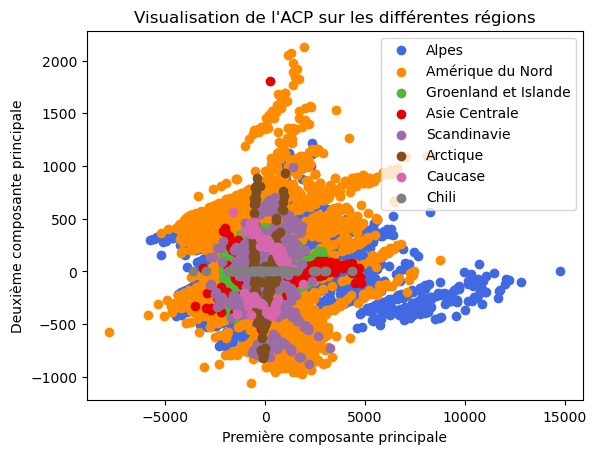

In [98]:
df1 =df_alpes_pca[['POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df2 =df_amerique_pca[['POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df3 =df_groenisland_pca[['POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df4 =df_asie_centrale_pca[['POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df5 =df_glacier_scandinavie_pca[['POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df6 =df_glacier_artique_pca[['POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df7 =df_glacier_caucase_pca[['POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
df8 =df_glacier_chili_pca[['POINT_ELEVATION','POINT_BALANCE','LATITUDE','LONGITUDE']]
pca_results = {}  
for i in range(1, 9): 
  
  dataframe_name = f"df{i}" 
  pca = PCA(n_components=2) 
  pca.fit(eval(dataframe_name)) 
  pca_results[dataframe_name] = pca.transform(eval(dataframe_name))
    
for dataframe_name, transformed_data in pca_results.items():
  match dataframe_name:
    case "df1":
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label="Alpes", color='royalblue')
    case "df2":
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label="Amérique du Nord", color='darkorange')
    case "df3":
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label="Groenland et Islande", color='xkcd:leafy green')
    case "df4":
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label="Asie Centrale", color='xkcd:red')
    case "df5":
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label="Scandinavie", color='xkcd:dark lilac')
    case "df6":
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label="Arctique", color='xkcd:milk chocolate')
    case "df7":
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label="Caucase", color='xkcd:pale magenta')
    case "df8":
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label="Chili", color='grey')

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Visualisation de l\'ACP sur les différentes régions')
plt.legend()
plt.show()

In [99]:
df1 =df_alpes_pca[['LATITUDE','LONGITUDE','POINT_ELEVATION','POINT_BALANCE']]
df2 =df_amerique_pca[['LATITUDE','LONGITUDE','POINT_ELEVATION','POINT_BALANCE']]
df3 =df_groenisland_pca[['LATITUDE','LONGITUDE','POINT_ELEVATION','POINT_BALANCE']]
df4 =df_asie_centrale_pca[['LATITUDE','LONGITUDE','POINT_ELEVATION','POINT_BALANCE']]
df5 =df_glacier_scandinavie_pca[['LATITUDE','LONGITUDE','POINT_ELEVATION','POINT_BALANCE']]
df6 =df_glacier_artique_pca[['LATITUDE','LONGITUDE','POINT_ELEVATION','POINT_BALANCE']]
df7 =df_glacier_caucase_pca[['LATITUDE','LONGITUDE','POINT_ELEVATION','POINT_BALANCE']]
df8 =df_glacier_chili_pca[['LATITUDE','LONGITUDE','POINT_ELEVATION','POINT_BALANCE']]

In [100]:
pca = PCA(n_components=4)
pca_fit = pca.fit(df1)
PC_values = np.arange(pca.n_components_) + 1

plt.subplot(122)
g1 = plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='royalblue', label="Alpes")
plt.xlabel("Graph 1")

pca = PCA(n_components=4)
pca_fit = pca.fit(df2)
PC_values = np.arange(pca.n_components_) + 1

plt.subplot(122)
g2 = plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='darkorange', label="Amérique du Nord")
plt.xlabel("Graph 2")

pca = PCA(n_components=4)
pca_fit = pca.fit(df3)
PC_values = np.arange(pca.n_components_) + 1

plt.subplot(122)
g2 = plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='xkcd:leafy green', label="Amérique du Nord")
plt.xlabel("Graph 3")

pca = PCA(n_components=4)
pca_fit = pca.fit(df4)
PC_values = np.arange(pca.n_components_) + 1

plt.subplot(122)
g2 = plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='xkcd:red', label="Amérique du Nord")
plt.xlabel("Graph 4")
pca = PCA(n_components=4)

pca_fit = pca.fit(df5)
PC_values = np.arange(pca.n_components_) + 1

plt.subplot(122)
g2 = plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='xkcd:dark lilac', label="Amérique du Nord")
plt.xlabel("Graph 5")

pca = PCA(n_components=4)
pca_fit = pca.fit(df6)
PC_values = np.arange(pca.n_components_) + 1

plt.subplot(122)
g2 = plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='xkcd:milk chocolate', label="Amérique du Nord")
plt.xlabel("Graph 6")

pca = PCA(n_components=4)
pca_fit = pca.fit(df7)
PC_values = np.arange(pca.n_components_) + 1

plt.subplot(122)
g2 = plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='xkcd:pale magenta', label="Amérique du Nord")
plt.xlabel("Graph 7")

pca = PCA(n_components=4)
pca_fit = pca.fit(df8)
PC_values = np.arange(pca.n_components_) + 1

plt.subplot(122)
g2 = plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='grey', label="Amérique du Nord")
plt.xlabel("Nombre de composantes")
plt.ylabel("Ratio de variance expliquée")
plt.suptitle("PCA des différents dataset")


Text(0.5, 0.98, 'PCA des différents dataset')

In [101]:
pca = PCA(n_components=4)
pca_fit = pca.fit(df1)
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(122)
g1 = plt.plot(PC_values, cumulative_variance_ratio, 'o-', linewidth=2, color='royalblue')
plt.xlabel("Graph 1")

pca = PCA(n_components=4)
pca_fit = pca.fit(df2)
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(122)
g1 = plt.plot(PC_values, cumulative_variance_ratio, 'o-', linewidth=2, color='darkorange')
plt.xlabel("Graph 2")

pca = PCA(n_components=4)
pca_fit = pca.fit(df3)
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(122)
g1 = plt.plot(PC_values, cumulative_variance_ratio, 'o-', linewidth=2, color='xkcd:leafy green')
plt.xlabel("Graph 3")

pca = PCA(n_components=4)
pca_fit = pca.fit(df4)
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(122)
g1 = plt.plot(PC_values, cumulative_variance_ratio, 'o-', linewidth=2, color='xkcd:red')
plt.xlabel("Graph 4")

pca = PCA(n_components=4)
pca_fit = pca.fit(df5)
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(122)
g1 = plt.plot(PC_values, cumulative_variance_ratio, 'o-', linewidth=2, color='xkcd:dark lilac')
plt.xlabel("Graph 5")

pca = PCA(n_components=4)
pca_fit = pca.fit(df6)
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(122)
g1 = plt.plot(PC_values, cumulative_variance_ratio, 'o-', linewidth=2, color='xkcd:milk chocolate')
plt.xlabel("Graph 6")

pca = PCA(n_components=4)
pca_fit = pca.fit(df7)
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(122)
g1 = plt.plot(PC_values, cumulative_variance_ratio, 'o-', linewidth=2, color='xkcd:pale magenta')
plt.xlabel("Graph 7")

pca = PCA(n_components=4)
pca_fit = pca.fit(df8)
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(122)
g1 = plt.plot(PC_values, cumulative_variance_ratio, 'o-', linewidth=2, color='grey')
plt.xlabel("Nombre de composantes principales I")
plt.ylabel("Ratio de la variance cumulée")
plt.suptitle("PCA cumulé des différents dataset")


Text(0.5, 0.98, 'PCA cumulé des différents dataset')

In [102]:
df_GHG_Energy_tot = df_GHG_Energy[['YEAR','GLOBAL TOTAL']]

In [103]:
df_glacier_tot = pd.concat([df_glacier_alpes,df_glacier_amerique,df_groenisland,df_glacier_asiec,df_glacier_scandinavie,df_glacier_artique,df_glacier_chili,df_glacier_caucase])
df_glacier_tot = df_glacier_tot.groupby(df_glacier_tot["YEAR"])["POINT_BALANCE"].mean()
df_glacier_tot = pd.DataFrame(df_glacier_tot)
df_glacier_tot = df_glacier_tot.reset_index(drop = False)
df_glacier_tot
df_GHG_Energy_tot

df_glacier_tot['YEAR'] = df_glacier_tot['YEAR'].astype(int)
df_GHG_Energy_tot['YEAR'] = df_GHG_Energy_tot['YEAR'].astype(int)

df_glacier_tot = df_glacier_tot.set_index('YEAR')
df_GHG_Energy_tot = df_GHG_Energy_tot.set_index('YEAR')

df_temptot = pd.concat([df_glacier_tot, df_GHG_Energy_tot], axis=1)
df_temptot = df_temptot.reset_index()

df_temptot = df_temptot.dropna()

df_temptot

/tmp/ipykernel_553/3377143843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GHG_Energy_tot['YEAR'] = df_GHG_Energy_tot['YEAR'].astype(int)


YEAR  POINT_BALANCE  GLOBAL TOTAL
80   1970   -1257.216667  24497.544419
81   1971   -1461.437276  24582.920914
82   1972    -752.680135   25521.45404
83   1973   -1166.758123  26733.859337
84   1974    -750.880150   26742.38412
85   1975    -262.112676  26798.454097
86   1976   -1297.961806  27950.655931
87   1977    -260.708904  28635.109842
88   1978    -248.743396  29238.852347
89   1979    -882.265455  29941.626256
90   1980    -305.029915  29642.260033
91   1981    -815.326271  29136.693451
92   1982   -1095.976636  28937.984321
93   1983    -704.695652  29175.190068
94   1984    -296.872428  29979.633293
95   1985    -468.463087  30299.723105
96   1986    -769.820690  30794.849875
97   1987    -467.919255  31544.221265
98   1988    -472.735294  32508.288125
99   1989    -404.144828  33095.737994
100  1990    -378.411043  33268.120705
101  1991    -554.230769  33373.190727
102  1992    -590.778626  33301.234008
103  1993    -246.760684  33402.787031
104  1994    -411.276190  33747.718461
105  1995    -143.503759   34631.79795
106  1996    -327.034247  35262.130612
107  1997    -572.298077   35724.02634
108  1998   -1144.531100  35812.314962
109  1999    -554.043062  36051.327701
110  2000    -401.456044  36991.707039
111  2001    -466.741294  37316.895341
112  2002    -710.673469  37807.183376
113  2003   -1190.105820   39354.85102
114  2004    -736.935065  40981.848261
115  2005    -879.057416  42318.428497
116  2006    -725.524793  43539.566551
117  2007    -789.216667  44859.867456
118  2008    -509.629032  45168.465033
119  2009    -485.671756  44750.394932
120  2010    -504.631783   46991.56672
121  2011    -785.537313  48409.216815
122  2012    -566.758389  49068.901428
123  2013    -393.414815  49875.675088
124  2014    -283.586626  50242.997508
125  2015    -571.114370  50134.383764
126  2016      27.526448   50343.04445
127  2017    -588.523636  51195.419111
128  2018    -485.490706   52398.14326
129  2019    -351.560241  52557.335275
130  2020    -228.187420  50632.309454
131  2021    -359.674658  53056.607721
132  2022   -1260.109544  53786.038909

<Axes: title={'center': 'bilan de la masse glacière sur un an au cours du temps dans le monde'}, xlabel='années', ylabel='bilan de la masse (mm equivalent eau)'>

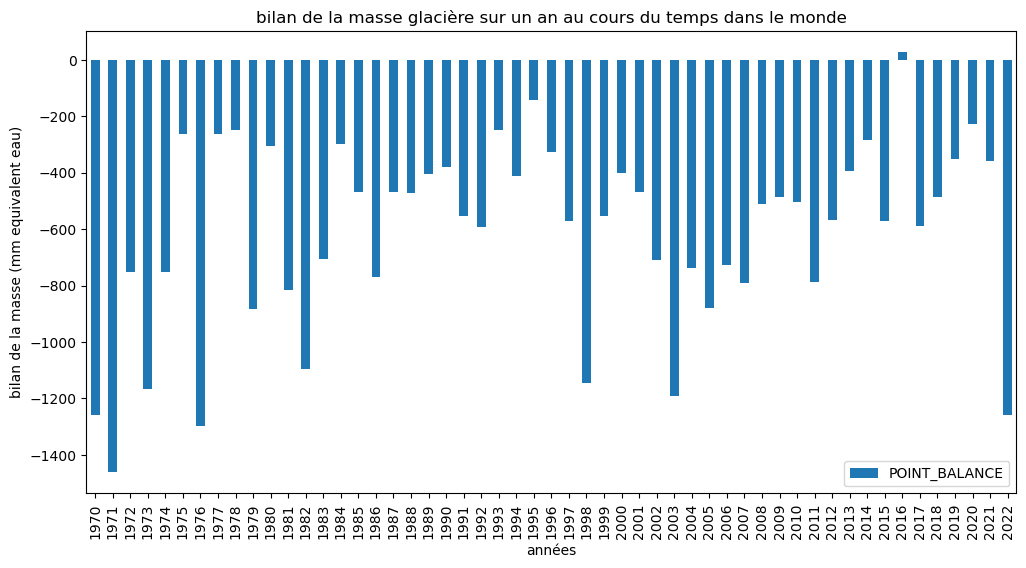

In [104]:
df_temptot.plot(x= 'YEAR', y='POINT_BALANCE',kind = 'bar',xlabel = 'années', ylabel= 'bilan de la masse (mm equivalent eau)', title = 'bilan de la masse glacière sur un an au cours du temps dans le monde', figsize = (12,6))


In [105]:
df_glacier_totsum = pd.concat([df_glacier_alpes,df_glacier_amerique,df_groenisland,df_glacier_asiec,df_glacier_scandinavie,df_glacier_artique,df_glacier_chili,df_glacier_caucase])
df_glacier_totsum = df_glacier_totsum.groupby(df_glacier_totsum["YEAR"])["POINT_BALANCE"].sum()
df_glacier_totsum = pd.DataFrame(df_glacier_tot)
df_glacier_totsum = df_glacier_totsum.reset_index(drop = False)
df_glacier_totsum['POINT_BALANCE'] = df_glacier_totsum['POINT_BALANCE'].cumsum(axis = 0)
df_glacier_totsum

YEAR  POINT_BALANCE
0    1885    -381.250000
1    1886   -3505.625000
2    1887   -6521.250000
3    1888  -10068.750000
4    1889  -13927.980769
..    ...            ...
129  2019 -107292.716083
130  2020 -107520.903503
131  2021 -107880.578161
132  2022 -109140.687705
133  2023 -109562.228974

[134 rows x 2 columns]

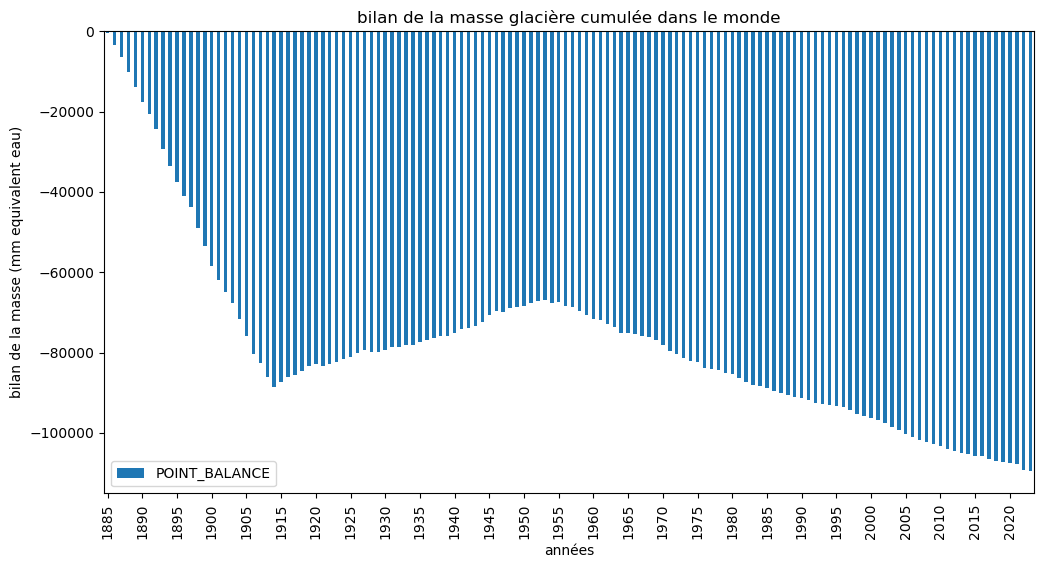

In [106]:
df_glacier_totsum.plot(
    x='YEAR',
    y='POINT_BALANCE',
    kind='bar',
    xlabel='années',
    ylabel='bilan de la masse (mm equivalent eau)',
    title='bilan de la masse glacière cumulée dans le monde',
    figsize=(12, 6),
)

plt.xticks(range(0, len(df_glacier_totsum), 5), df_glacier_totsum['YEAR'].iloc[::5])


plt.show()

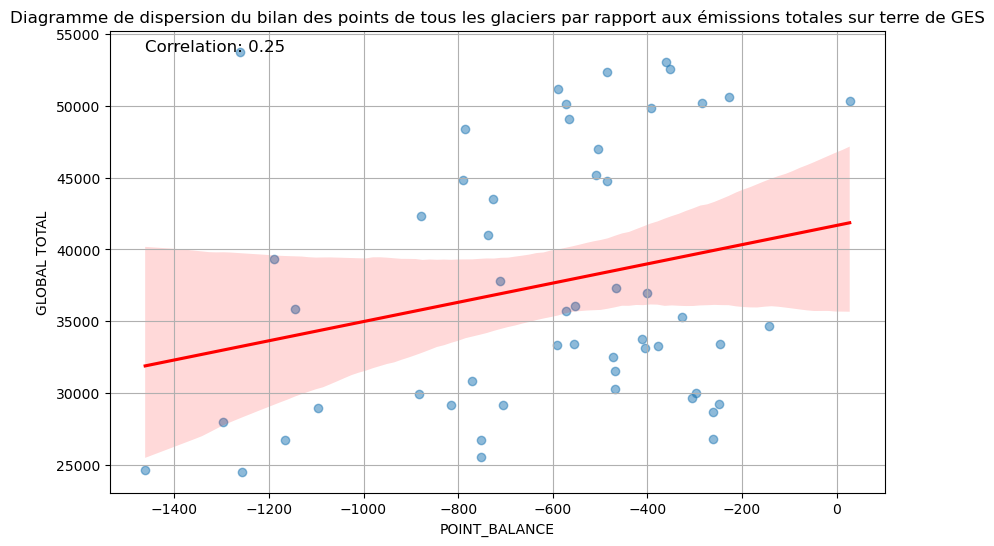

In [107]:
df_temptot['GLOBAL TOTAL'] = pd.to_numeric(df_temptot['GLOBAL TOTAL'], errors='coerce')

df_temptot= df_temptot.dropna(subset=['GLOBAL TOTAL'])

plt.figure(figsize=(10, 6))
plt.scatter(df_temptot['POINT_BALANCE'], df_temptot['GLOBAL TOTAL'], alpha=0.5)

correlation = df_temptot['POINT_BALANCE'].corr(df_temptot['GLOBAL TOTAL'])
plt.text(min(df_temptot['POINT_BALANCE']), max(df_temptot['GLOBAL TOTAL']), f'Correlation: {correlation:.2f}', fontsize=12)

plt.title('Diagramme de dispersion du bilan des points de tous les glaciers par rapport aux émissions totales sur terre de GES')


sns.regplot(x=df_temptot['POINT_BALANCE'], y=df_temptot['GLOBAL TOTAL'], scatter=False, color='red')

plt.grid(True)
plt.show()

In [108]:
X = df_temptot["GLOBAL TOTAL"]  
X = np.array(X).reshape(-1,1)

Y = np.array(df_temptot["POINT_BALANCE"]).reshape(-1,1)

plt.scatter(X,Y)

plt.xlabel('Total GHG')
plt.ylabel('Fonte des glaciers')
plt.title('Nuage de points de la fonte des glaciers en fonction des GHG des glaciers dans le monde')

plt.legend

plt.xticks(rotation=45)

plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


model = LinearRegression()
model.fit(X_train,Y_train)
score = model.score(X_train,Y_train)

model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,Y_train)
score2 = model2.score(X_train,Y_train)

model3 = SVR(C=100)
model3.fit(X_train ,Y_train)
score3 = model3.score(X_train,Y_train)


model4 = DecisionTreeRegressor() 
model4.fit(X_train,Y_train)
score4 = model4.score(X_train,Y_train)


print("le score de la regression linéaire : " + str(score))
print("KNeighborsRegressor : " + str(score2))
print("support vecteur machine : " + str(score3))
print("Arbre de décision : " + str(score4))

print("Score du test de l'arbre de décision:" + str(model4.score(X_test,Y_test)))

scores_cross_validation = cross_val_score(model4, X_train, Y_train, cv=5)
print("le score de la cross validation : " + str(scores_cross_validation.mean()))

model5 = model = Ridge(alpha=1.0)
model5.fit(X_train,Y_train)
score5 = model5.score(X_train,Y_train)

print("Ridge regression : " + str(score5))

model6 = model = Lasso(alpha=1.0)
model6.fit(X_train,Y_train)
score6= model6.score(X_train,Y_train)

print("Lasso regression : " + str(score6))

Y_pred =  model3.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Erreur quadratique moyenne :", mse)


le score de la regression linéaire : 0.0010235377180179972
KNeighborsRegressor : 0.1430088196235375
support vecteur machine : 0.07323208189756336
Arbre de décision : 1.0
Score du test de l'arbre de décision:0.1687050637328309
le score de la cross validation : -1.7770136405522983
Ridge regression : 0.0010235377180178862
Lasso regression : 0.0010235377178444693
Erreur quadratique moyenne : 149892.78789354255


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
df1 =df_alpes_pca[['POINT_ELEVATION','POINT_BALANCE','YEAR']]
df2 =df_amerique_pca[['POINT_ELEVATION','POINT_BALANCE','YEAR']]
df3 =df_groenisland_pca[['POINT_ELEVATION','POINT_BALANCE','YEAR']]
df4 =df_asie_centrale_pca[['POINT_ELEVATION','POINT_BALANCE','YEAR']]
df5 =df_glacier_scandinavie_pca[['POINT_ELEVATION','POINT_BALANCE','YEAR']]
df6 =df_glacier_artique_pca[['POINT_ELEVATION','POINT_BALANCE','YEAR']]
df7 =df_glacier_caucase_pca[['POINT_ELEVATION','POINT_BALANCE','YEAR']]
df8 =df_glacier_chili_pca[['POINT_ELEVATION','POINT_BALANCE','YEAR']]


In [110]:
df_eleba_tot =  pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df_eleba_tot = df_eleba_tot.dropna()
df_eleba_tot['POINT_ELEVATION'] = pd.to_numeric(df_eleba_tot['POINT_ELEVATION'], errors='coerce')

df_eleba_tot = df_eleba_tot.groupby(df_eleba_tot["YEAR"])["POINT_ELEVATION"].mean()
df_eleba_tot = pd.DataFrame(df_eleba_tot)
df_eleba_tot = df_eleba_tot.reset_index(drop = False)
df_eleba_tot
df_GHG_Energy_tot = df_GHG_Energy_tot.reset_index()

df_eleba_tot['YEAR'] = df_eleba_tot['YEAR'].astype(int)
df_GHG_Energy_tot['YEAR'] = df_GHG_Energy_tot['YEAR'].astype(int)

df_eleba_tot = df_eleba_tot.set_index('YEAR')
df_GHG_Energy_tot = df_GHG_Energy_tot.set_index('YEAR')

df_temptotz = pd.concat([df_eleba_tot, df_GHG_Energy_tot], axis=1)
df_temptotz = df_temptotz.reset_index()

df_temptotz = df_temptotz.dropna()

In [111]:
df_temptotz = pd.concat([df_temptot, df_temptotz], axis=1)
df_temptotz = df_temptotz[['YEAR','POINT_BALANCE','GLOBAL TOTAL','POINT_ELEVATION']]
df_temptotz = df_temptotz.drop(columns = df_temptotz[['YEAR', 'GLOBAL TOTAL','POINT_BALANCE']])
df_temptotz = pd.concat([df_temptot, df_temptotz], axis=1)
df_temptotz = df_temptotz[['YEAR','POINT_BALANCE','GLOBAL TOTAL','POINT_ELEVATION']]
df_temptotz

YEAR  POINT_BALANCE  GLOBAL TOTAL  POINT_ELEVATION
80   1970   -1257.216667  24497.544419      2274.210169
81   1971   -1461.437276  24582.920914      2310.756364
82   1972    -752.680135  25521.454040      2151.064626
83   1973   -1166.758123  26733.859337      2279.927007
84   1974    -750.880150  26742.384120      2276.757576
85   1975    -262.112676  26798.454097      2235.561151
86   1976   -1297.961806  27950.655931      2253.798587
87   1977    -260.708904  28635.109842      2151.279720
88   1978    -248.743396  29238.852347      2326.281853
89   1979    -882.265455  29941.626256      2145.391791
90   1980    -305.029915  29642.260033      2510.105727
91   1981    -815.326271  29136.693451      2457.421739
92   1982   -1095.976636  28937.984321      2487.425121
93   1983    -704.695652  29175.190068      2323.779279
94   1984    -296.872428  29979.633293      2253.263830
95   1985    -468.463087  30299.723105      2072.230769
96   1986    -769.820690  30794.849875      2035.115942
97   1987    -467.919255  31544.221265      1988.709677
98   1988    -472.735294  32508.288125      2111.600000
99   1989    -404.144828  33095.737994      2073.086957
100  1990    -378.411043  33268.120705      2083.993590
101  1991    -554.230769  33373.190727      2172.235294
102  1992    -590.778626  33301.234008      2216.764228
103  1993    -246.760684  33402.787031      1992.743119
104  1994    -411.276190  33747.718461      2072.234694
105  1995    -143.503759  34631.797950      2028.708661
106  1996    -327.034247  35262.130612      1945.650000
107  1997    -572.298077  35724.026340      1818.534653
108  1998   -1144.531100  35812.314962      1712.507389
109  1999    -554.043062  36051.327701      1754.502463
110  2000    -401.456044  36991.707039      1744.965909
111  2001    -466.741294  37316.895341      1671.878173
112  2002    -710.673469  37807.183376      1741.694737
113  2003   -1190.105820  39354.851020      1877.918033
114  2004    -736.935065  40981.848261      1827.345133
115  2005    -879.057416  42318.428497      1924.467980
116  2006    -725.524793  43539.566551      1902.894515
117  2007    -789.216667  44859.867456      1928.012821
118  2008    -509.629032  45168.465033      1911.528926
119  2009    -485.671756  44750.394932      1976.910506
120  2010    -504.631783  46991.566720      1969.000000
121  2011    -785.537313  48409.216815      1909.488550
122  2012    -566.758389  49068.901428      2035.763699
123  2013    -393.414815  49875.675088      2131.076046
124  2014    -283.586626  50242.997508      1637.783951
125  2015    -571.114370  50134.383764      2009.008955
126  2016      27.526448  50343.044450      1662.323077
127  2017    -588.523636  51195.419111      2008.565543
128  2018    -485.490706  52398.143260      2018.530075
129  2019    -351.560241  52557.335275      2320.105477
130  2020    -228.187420  50632.309454      2349.449163
131  2021    -359.674658  53056.607721      2143.855172
132  2022   -1260.109544  53786.038909      2373.772132

In [112]:
df_temptotz['POINT_ELEVATION'] = pd.to_numeric(df_temptotz['POINT_ELEVATION'], errors='coerce')

df_temptotz= df_temptotz.dropna(subset=['POINT_ELEVATION'])

plt.figure(figsize=(10, 6))
plt.scatter(df_temptotz['POINT_BALANCE'], df_temptotz['POINT_ELEVATION'], alpha=0.5)

correlation = df_temptotz['POINT_BALANCE'].corr(df_temptotz['POINT_ELEVATION'])
plt.text(min(df_temptotz['POINT_BALANCE']), max(df_temptotz['POINT_ELEVATION']), f'Correlation: {correlation:.2f}', fontsize=12)

plt.title('Diagramme de dispersion de la fonte des glaciers par rapport a l\'elevation')


sns.regplot(x=df_temptotz['POINT_BALANCE'], y=df_temptotz['POINT_ELEVATION'], scatter=False, color='red')

plt.grid(True)
plt.show()

Les tablaux de comparaison du niveau de CO2 et de la fonte des glaciers dans les differentes regions

In [113]:
df_totchang_scan = df_glacier_scancl[['POINT_BALANCE']]

df_tempsccl = df_tempsc.set_index('YEAR')

tt = df_totchang_scan.index.values.tolist()
check = 0
for i in tt: 
    if check == 0:
        check += 1
    else:
        df_totchang_scan.at[i, 'POINT_BALANCE'] = df_totchang_scan.at[i, 'POINT_BALANCE'] + df_totchang_scan.at[i-1,'POINT_BALANCE']

df_totchang_scan = df_totchang_scan.rename({'POINT_BALANCE': 'Total Change'}, axis='columns')

additional = df_tempsccl['Total GHG']
df_totchang_scan = pd.concat([df_totchang_scan, additional], axis=1) 

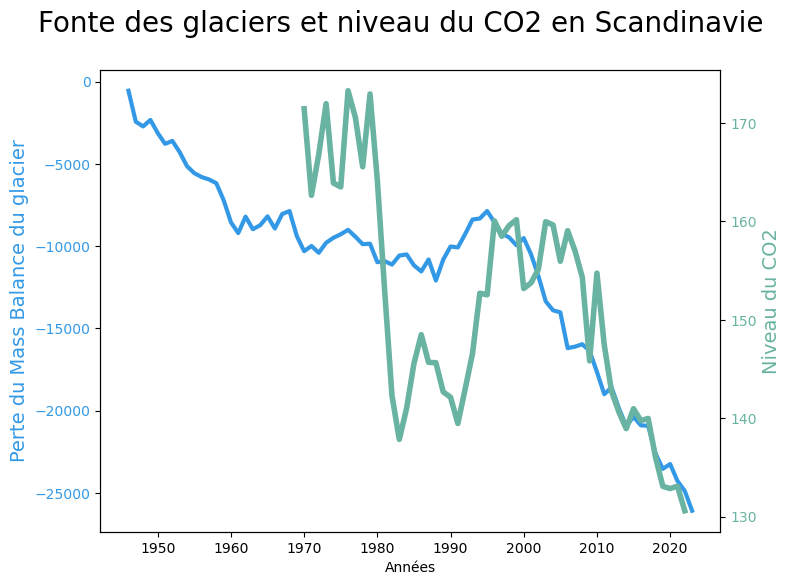

In [114]:
sc_years = df_totchang_scan.index.values.tolist()
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang_scan['Total Change'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang_scan['Total GHG'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 en Scandinavie", fontsize=20)
fig_sca = fig

In [115]:
df_totchang_ca = df_glacier_caucasecl[['POINT_BALANCE']]

df_tempcacl = df_tempca.set_index('YEAR')

tt = df_totchang_ca.index.values.tolist()
check = 0
for i in tt: 
    if check == 0:
        check += 1
    else:
        df_totchang_ca.at[i, 'POINT_BALANCE'] = df_totchang_ca.at[i, 'POINT_BALANCE'] + df_totchang_ca.at[i-1,'POINT_BALANCE']

df_totchang_ca = df_totchang_ca.rename({'POINT_BALANCE': 'Total Change'}, axis='columns')

additional = df_tempcacl['Total GHG']
df_totchang_ca = pd.concat([df_totchang_ca, additional], axis=1)

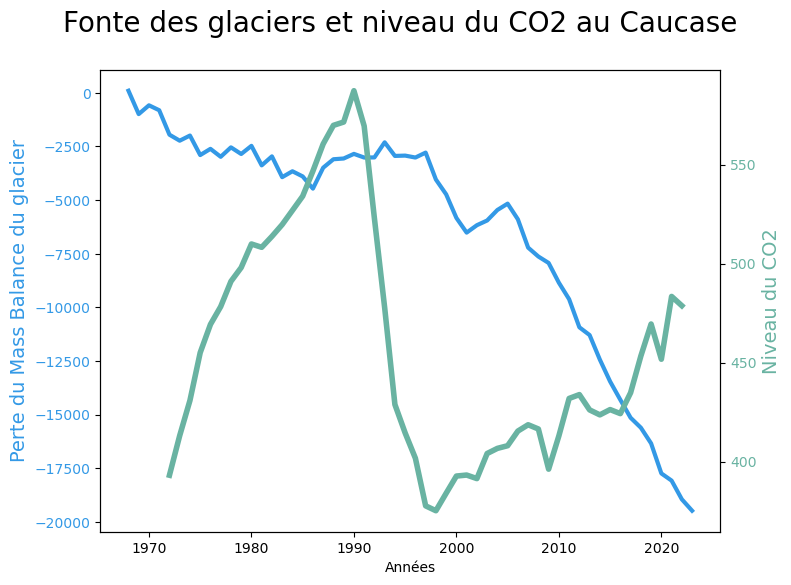

In [116]:
sc_years = df_totchang_ca.index.values.tolist()
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang_ca['Total Change'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang_ca['Total GHG'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 au Caucase", fontsize=20)
fig_cau = fig

In [117]:
df_totchang_as = df_glacier_ascl[['POINT_BALANCE']]

df_tempaccl = df_tempac.set_index('YEAR')

tt = df_totchang_as.index.values.tolist()
check = 0
for i in tt: 
    if check == 0:
        check += 1
    else:
        df_totchang_as.at[i, 'POINT_BALANCE'] = df_totchang_as.at[i, 'POINT_BALANCE'] + df_totchang_as.at[i-1,'POINT_BALANCE']

df_totchang_as = df_totchang_as.rename({'POINT_BALANCE': 'Total Change'}, axis='columns')

additional = df_tempaccl['Total GHG']
df_totchang_as = pd.concat([df_totchang_as, additional], axis=1) 

In [118]:
sc_years = df_totchang_as.index.values.tolist()
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang_as['Total Change'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang_as['Total GHG'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 en Asie Centrale", fontsize=20)
fig_asi = fig

In [119]:
df_totchang_chili = df_glacier_chili_clean[['POINT_BALANCE']]

df_tempcl = df_tempcl.set_index('YEAR')

tt = df_totchang_chili.index.values.tolist()
check = 0
for i in tt: 
    if check == 0:
        check += 1
    else:
        df_totchang_chili.at[i, 'POINT_BALANCE'] = df_totchang_chili.at[i, 'POINT_BALANCE'] + df_totchang_chili.at[i-1,'POINT_BALANCE']

df_totchang_chili = df_totchang_chili.rename({'POINT_BALANCE': 'Total Change'}, axis='columns')

additional = df_tempcl['Total GHG']
df_totchang_chili = pd.concat([df_totchang_chili, additional], axis=1) 

In [120]:
sc_years = df_totchang_chili.index.values.tolist()
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang_chili['Total Change'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang_chili['Total GHG'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 au Chili", fontsize=20)
fig_chi = fig

In [121]:
df_totchang_am = df_glacier_amclean[['POINT_BALANCE']].reset_index()

#df_tempamcl = df_tempam.set_index('YEAR')

tt = df_totchang_am.index.values.tolist()
check = 0
for i in tt: 
    if check == 0:
        check += 1
    else:
        df_totchang_am.at[i, 'POINT_BALANCE'] = df_totchang_am.at[i, 'POINT_BALANCE'] + df_totchang_am.at[i-1,'POINT_BALANCE']

df_totchang_am = df_totchang_am.rename({'POINT_BALANCE': 'Total Change'}, axis='columns')

additional = df_tempam['Total GHG']
df_totchang_am = pd.concat([df_totchang_am, additional], axis=1) 

In [122]:
#sc_years = df_totchang_am.index.values.tolist()
sc_years = df_totchang_am['YEAR']
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang_am['Total Change'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang_am['Total GHG'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 en Amerique du Nord", fontsize=20)
fig_ame = fig

In [123]:
df_totchang_al = df_glacier_alclean[['POINT_BALANCE']].reset_index()

#df_tempamcl = df_tempam.set_index('YEAR')

tt = df_totchang_al.index.values.tolist()
check = 0
for i in tt: 
    if check == 0:
        check += 1
    else:
        df_totchang_al.at[i, 'POINT_BALANCE'] = df_totchang_al.at[i, 'POINT_BALANCE'] + df_totchang_al.at[i-1,'POINT_BALANCE']

df_totchang_al = df_totchang_al.rename({'POINT_BALANCE': 'Total Change'}, axis='columns')

additional = df_tempal['Total GHG']
df_totchang_al = pd.concat([df_totchang_al, additional], axis=1) 

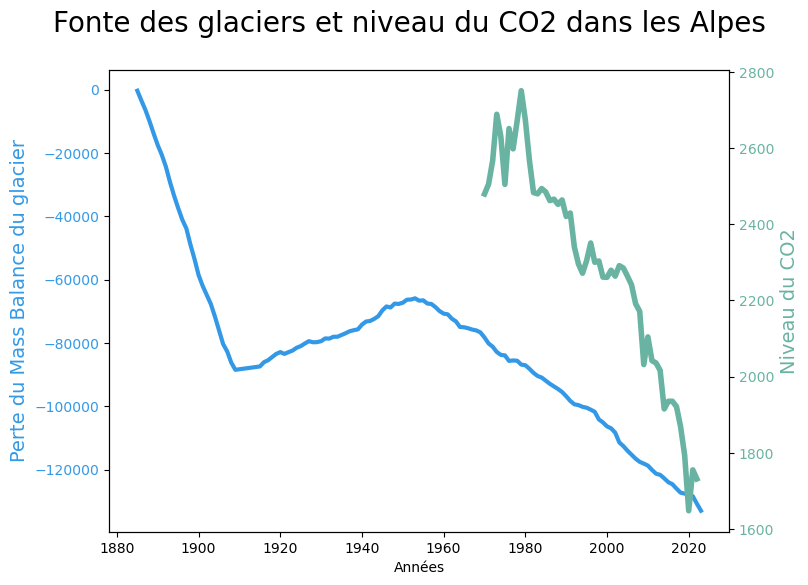

In [124]:
sc_years = df_totchang_al['YEAR']
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang_al['Total Change'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang_al['Total GHG'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 dans les Alpes", fontsize=20)
fig_alp = fig

In [125]:
df_totchang_ar = df_glacier_artique_clean[['POINT_BALANCE']]

df_temparcl = df_tempar.set_index('YEAR')

tt = df_totchang_ar.index.values.tolist()
check = 0
for i in tt: 
    if check == 0:
        check += 1
    else:
        df_totchang_ar.at[i, 'POINT_BALANCE'] = df_totchang_ar.at[i, 'POINT_BALANCE'] + df_totchang_ar.at[i-1,'POINT_BALANCE']

df_totchang_ar = df_totchang_ar.rename({'POINT_BALANCE': 'Total Change'}, axis='columns')

additional = df_temparcl['Total GHG']
df_totchang_ar = pd.concat([df_totchang_ar, additional], axis=1) 

In [126]:
sc_years = df_totchang_ar.index.values.tolist()
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang_ar['Total Change'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang_ar['Total GHG'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 en Artique", fontsize=20)
fig_art = fig

In [127]:
df_totchang_gr = df_glacier_groenisland[['POINT_BALANCE']].reset_index()

#df_tempamcl = df_tempam.set_index('YEAR')

tt = df_totchang_gr.index.values.tolist()
check = 0
for i in tt: 
    if check == 0:
        check += 1
    else:
        df_totchang_gr.at[i, 'POINT_BALANCE'] = df_totchang_gr.at[i, 'POINT_BALANCE'] + df_totchang_gr.at[i-1,'POINT_BALANCE']

df_totchang_gr = df_totchang_gr.rename({'POINT_BALANCE': 'Total Change'}, axis='columns')

additional = df_tempy['Total GHG']
df_totchang_gr = pd.concat([df_totchang_gr, additional], axis=1) 

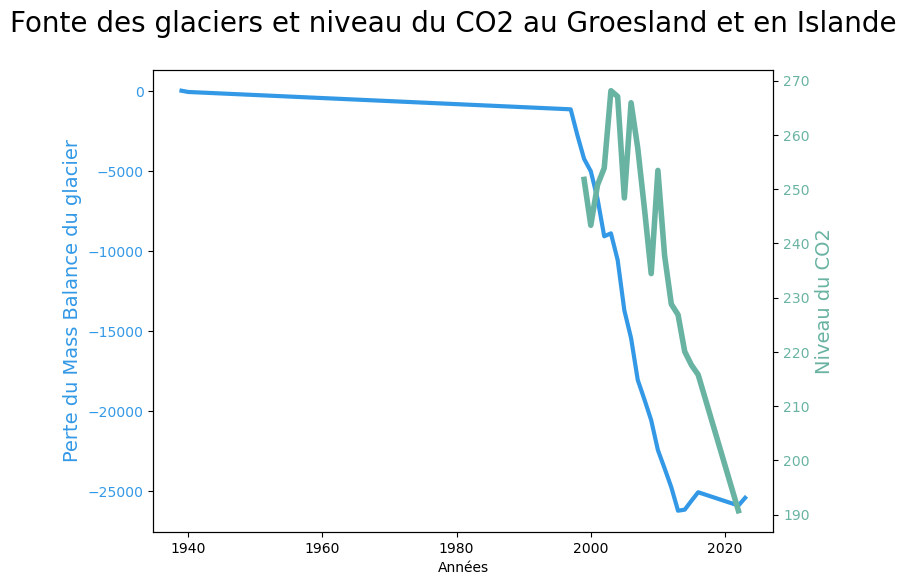

In [128]:
sc_years = df_totchang_gr['YEAR']
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang_gr['Total Change'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang_gr['Total GHG'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 au Groesland et en Islande", fontsize=20)
fig_gro = fig

In [129]:
df_totchang = df_totchang_al.set_index("YEAR")
df_totchang = df_totchang.rename(columns={"Total Change": "TC Alpes", "Total GHG": "TGHG Alpes"})

df_totchang = df_totchang.join(df_totchang_ar.rename(columns={"Total Change": "TC Artic", "Total GHG": "TGHG Artic"}))
df_totchang = df_totchang.join(df_totchang_as.rename(columns={"Total Change": "TC Asie", "Total GHG": "TGHG Asie"}))
df_totchang = df_totchang.join(df_totchang_ca.rename(columns={"Total Change": "TC Caucase", "Total GHG": "TGHG Caucase"}))
df_totchang = df_totchang.join(df_totchang_chili.rename(columns={"Total Change": "TC Chili", "Total GHG": "TGHG Chili"}))
df_totchang = df_totchang.join(df_totchang_scan.rename(columns={"Total Change": "TC Scan", "Total GHG": "TGHG Scan"}))

df_totchang = df_totchang.join(df_totchang_am.set_index("YEAR").rename(columns={"Total Change": "TC Amerique", "Total GHG": "TGHG Amerique"}))
df_totchang = df_totchang.join(df_totchang_gr.set_index("YEAR").rename(columns={"Total Change": "TC Groenisland", "Total GHG": "TGHG Groenisland"}))

df_totchang

TC Alpes   TGHG Alpes      TC Artic  TGHG Artic       TC Asie  \
YEAR                                                                       
1885    -381.250000          NaN           NaN         NaN           NaN   
1886   -3505.625000          NaN           NaN         NaN           NaN   
1887   -6521.250000          NaN           NaN         NaN           NaN   
1888  -10068.750000          NaN           NaN         NaN           NaN   
1889  -13927.980769          NaN           NaN         NaN           NaN   
...             ...          ...           ...         ...           ...   
2019 -127592.174578  1793.978045 -18161.716667  845.772156 -30349.572276   
2020 -127840.592261  1647.972679 -19261.316667  781.551487 -32058.042864   
2021 -128392.238095  1755.196543 -19522.116667  804.760836 -36232.126197   
2022 -130768.687074  1731.422983 -20515.716667  826.775595 -38459.985504   
2023 -132989.115646          NaN -21294.316667         NaN -41512.338563   

         TGHG Asie  TC Caucase  TGHG Caucase  TC Chili  TGHG Chili  \
YEAR                                                                 
1885           NaN         NaN           NaN       NaN         NaN   
1886           NaN         NaN           NaN       NaN         NaN   
1887           NaN         NaN           NaN       NaN         NaN   
1888           NaN         NaN           NaN       NaN         NaN   
1889           NaN         NaN           NaN       NaN         NaN   
...            ...         ...           ...       ...         ...   
2019  15237.623226    -16343.0    469.479701  -25795.0  136.531265   
2020  15506.114967    -17741.5    451.686409  -28225.0  128.964921   
2021  16279.676842    -18077.5    483.414438  -28925.0  140.655971   
2022  16350.927188    -18949.0    478.723981  -30086.0  137.011248   
2023           NaN    -19481.0           NaN  -31211.0         NaN   

           TC Scan   TGHG Scan  TC Amerique  TGHG Amerique  TC Groenisland  \
YEAR                                                                         
1885           NaN         NaN          NaN            NaN             NaN   
1886           NaN         NaN          NaN            NaN             NaN   
1887           NaN         NaN          NaN            NaN             NaN   
1888           NaN         NaN          NaN            NaN             NaN   
1889           NaN         NaN          NaN            NaN             NaN   
...            ...         ...          ...            ...             ...   
2019 -23542.634127  133.079713  -559.670056    6928.611230             NaN   
2020 -23248.334127  132.858028  -309.329147    6327.036057             NaN   
2021 -24279.534127  133.091193     8.374243    6656.384827             NaN   
2022 -24887.934127  130.602297   909.766648    6774.253094   -25897.537036   
2023 -26086.634127         NaN  1249.595481            NaN   -25416.698941   

      TGHG Groenisland  
YEAR                    
1885               NaN  
1886               NaN  
1887               NaN  
1888               NaN  
1889               NaN  
...                ...  
2019               NaN  
2020               NaN  
2021               NaN  
2022        190.715094  
2023               NaN  

[134 rows x 16 columns]

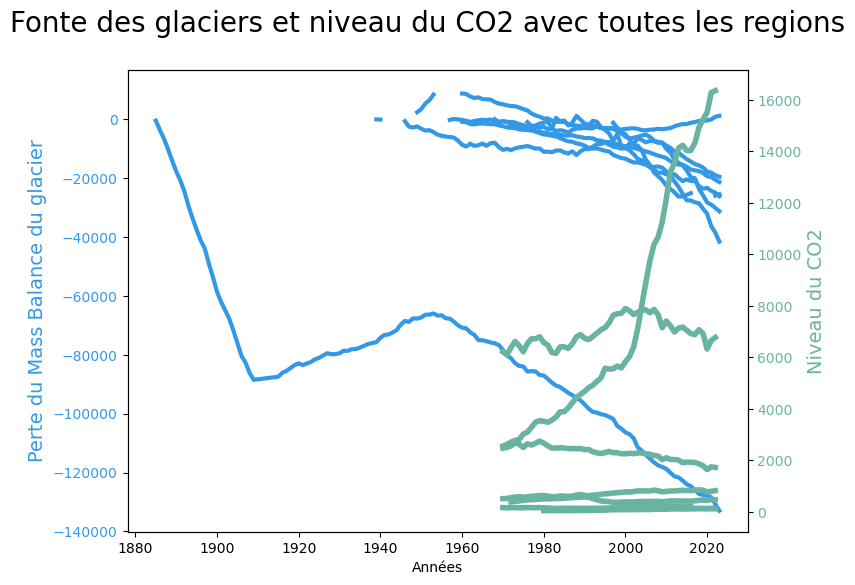

In [130]:
sc_years = df_totchang.index.values.tolist()
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang['TC Alpes'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Alpes'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Asie'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Asie'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Artic'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Artic'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Caucase'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Caucase'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Chili'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Chili'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Scan'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Scan'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Amerique'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Amerique'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Groenisland'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Groenisland'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 avec toutes les regions", fontsize=20)
fig_art = fig

In [131]:
df_totchang.drop(index=range(1885, 1910), inplace=True)
df_totchang.drop(index=range(1915, 1970), inplace=True)
new0 = df_totchang.loc[1970, 'TC Alpes']
df_totchang['TC Alpes'] = df_totchang['TC Alpes'] - new0

In [132]:
sc_years = df_totchang.index.values.tolist()
COLOR_GHG = "#69b3a2"
COLOR_Glacier = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(sc_years, df_totchang['TC Alpes'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Alpes'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Asie'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Asie'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Artic'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Artic'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Caucase'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Caucase'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Chili'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Chili'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Scan'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Scan'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Amerique'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Amerique'], color=COLOR_GHG, lw=4)

ax1.plot(sc_years, df_totchang['TC Groenisland'], color=COLOR_Glacier, lw=3)
ax2.plot(sc_years, df_totchang['TGHG Groenisland'], color=COLOR_GHG, lw=4)

ax1.set_xlabel("Années")
ax1.set_ylabel("Perte du Mass Balance du glacier", color=COLOR_Glacier, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Glacier)

ax2.set_ylabel("Niveau du CO2", color=COLOR_GHG, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_GHG)

fig.suptitle("Fonte des glaciers et niveau du CO2 avec toutes les regions a partir de 1970", fontsize=20)
fig_art = fig

Ce graphique est identique avec celui d'avant avec comme seule exception le changement dans les donnees des Alpes pour rendre les autres donnees plus visibles. On a supprimé les données avant 1970 et remis à 0 la fonte des glaciers des Alpes en 1970. 